Alessia Taboga, February 2019

## Capstone project for Udacity Machine Learning Engineer Nanodegree

# Predicting Loan Default for Lending Club

One well known application of machine learning algorithms is predicting loan default.
For this project, I will build and compare several supervised machine learning models to predict bad loans for the Lending Club company.

The data were downloaded from kaggle website (https://www.kaggle.com/wendykan/lending-club-loan-data)

A report of my project is provided as a separate file.

Outline of this ipython notebook:

- Importing libraries
- Reading the data (with basic data exploration)
- Exploratory Data Analysis
- Data Pre-processing
- Separate final data in feature matrix (X) and target (y)
- Split data into training and testing datasets
- Feature scaling
- Building and evaluating the models

## Importing libraries

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to deal with features including dates
from datetime import datetime, timedelta

# for feature scaling
from sklearn.preprocessing import StandardScaler

# to split data into training and testing sets
from sklearn.model_selection import train_test_split

# to build machine learning supervised models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# to balance data
from imblearn.over_sampling import SMOTE

# for model parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, fbeta_score

# to evaluate models
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

# to calculate model training time
from time import time

## Reading the Data

In [2]:
pd.pandas.set_option('display.max_columns', None)

data = pd.read_csv('loan.csv', low_memory=False)

# I make here a copy of the data named data_orig which I will keep in case I want to go back to the original
# data as provided
data_orig = data.copy(deep=True)

# display and explore the first records
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# check the last records
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,26.0,NaN,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,29.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,140285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,22.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,58418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,33307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


In [4]:
#checking the number of records and columns in the raw data
print ("The total number of records in our raw data is: {}".format(data.shape[0]))
print ("The total number of columns in our raw data is: {}".format(data.shape[1]))

The total number of records in our raw data is: 887379
The total number of columns in our raw data is: 74


In [5]:
# initial basic exploration to have a better look at column names, with their data types and number of entries,
# for the raw data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

From a first inspection we can see that some columns have numerical values (int64 or float64)
and other categorical variables(object). Machine algorithms need features and target to be numerical.
Therefore some preprocessing such as hot encoding will need to be applied.

Moreover we can see that not all features have all the 887379 values, suggesting that there are some missing values.
These missing values will also need to be investigated and dealt with.

In [6]:
# The categorical variables are
cat_var = [v for v in data.columns if data[v].dtype=='O']
print('The number of categorical variables in the raw data is: {}'.format(len(cat_var)))
print('They are: ', cat_var)

The number of categorical variables in the raw data is: 23
They are:  ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint']


In [7]:
# The numerical variables are
num_var = [v for v in data.columns if data[v].dtype!='O']
print('The number of numerical variables in the raw data is: {}'.format(len(num_var)))
print('They are: ', num_var)

The number of numerical variables in the raw data is: 51
They are:  ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [8]:
# A description of the features is provided by Kaggle in an additional excel file
# Here I read the file and set properties for display in order to read all text inside description column in my notebook
data_dictionary = pd.read_excel('LCDataDictionary.xlsx').dropna()
data_dictionary.style.set_properties(subset=['Description'], **{'width': '600px'})
data_dictionary.style.set_properties(**{'background-color': 'black', 'color': 'lawngreen', 'border-color': 'white'})

Some of the features described in the supplied excel file are in reality not included in the data
('fico_range_high', 'fico_range_low', 'is_inc_v', 'last_fico_range_high','last_fico_range_low')

In [9]:
# before going deeper in feature and target exploration and engineering,
# understanding their meaning, their values, their significance and correlations 
# we can do a preliminay check on the statistics of columns which are already in numerical type 
pd.set_option('display.max_columns',None)
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

In [10]:
# the features seem to have very different value ranges, so feature scaling will be required

#### Investigating Missing values

As part of this initial data exploration, I want to see if there are missing values and in which percentage. 

In [11]:
data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51457
emp_length                          0
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761350
purpose                             0
title                             151
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [12]:
# As anticipated there are several features with missing values

# to obtain the percentage of the missing values per each feature, sorted from the heighest to lowest values
(data.isnull().mean().sort_values(ascending=False)*100).head(30)

dti_joint                      99.942640
verification_status_joint      99.942415
annual_inc_joint               99.942415
il_util                        97.902024
mths_since_rcnt_il             97.654892
all_util                       97.591559
max_bal_bc                     97.591559
open_rv_24m                    97.591559
open_rv_12m                    97.591559
total_cu_tl                    97.591559
total_bal_il                   97.591559
open_il_24m                    97.591559
open_il_12m                    97.591559
open_il_6m                     97.591559
open_acc_6m                    97.591559
inq_fi                         97.591559
inq_last_12m                   97.591559
desc                           85.797613
mths_since_last_record         84.555303
mths_since_last_major_derog    75.015974
mths_since_last_delinq         51.197065
next_pymnt_d                   28.507661
tot_cur_bal                     7.919502
total_rev_hi_lim                7.919502
tot_coll_amt    

The first 21 features in the sorted output above have more than 50% of values missing.
I am going to drop such features from the data.
I will investigate the missing values of the remainig features at a later stage to choose the most appropriate way to
fill those missing values.

In [13]:
data.drop(labels = ['dti_joint', 'verification_status_joint', 'annual_inc_joint', 'il_util', 'mths_since_rcnt_il',
                   'all_util', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'total_cu_tl', 'total_bal_il','open_il_24m',
                   'open_il_12m','open_il_6m','open_acc_6m','inq_fi', 'inq_last_12m','desc', 'mths_since_last_record',
                   'mths_since_last_major_derog','mths_since_last_delinq'], inplace=True, axis=1)

In [14]:
# check which are the remaining features at this stage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 53 columns):
id                            887379 non-null int64
member_id                     887379 non-null int64
loan_amnt                     887379 non-null float64
funded_amnt                   887379 non-null float64
funded_amnt_inv               887379 non-null float64
term                          887379 non-null object
int_rate                      887379 non-null float64
installment                   887379 non-null float64
grade                         887379 non-null object
sub_grade                     887379 non-null object
emp_title                     835922 non-null object
emp_length                    887379 non-null object
home_ownership                887379 non-null object
annual_inc                    887375 non-null float64
verification_status           887379 non-null object
issue_d                       887379 non-null object
loan_status                   887379 

In [15]:
# The original columns have been reduced from 74 to 53

# check again for missing values on the remaining columns
(data.isnull().mean().sort_values(ascending=False)*100).head(25)

next_pymnt_d                  28.507661
total_rev_hi_lim               7.919502
tot_coll_amt                   7.919502
tot_cur_bal                    7.919502
emp_title                      5.798762
last_pymnt_d                   1.990018
revol_util                     0.056571
title                          0.017016
collections_12_mths_ex_med     0.016340
last_credit_pull_d             0.005973
total_acc                      0.003268
delinq_2yrs                    0.003268
earliest_cr_line               0.003268
open_acc                       0.003268
pub_rec                        0.003268
inq_last_6mths                 0.003268
acc_now_delinq                 0.003268
annual_inc                     0.000451
total_pymnt_inv                0.000000
pymnt_plan                     0.000000
issue_d                        0.000000
verification_status            0.000000
home_ownership                 0.000000
emp_length                     0.000000
sub_grade                      0.000000


At this stage there are some missing values in the first 18 features in the list above reported.
In the section below, I will explore features also in terms of their distribution.
I will then find out the best way to fill in the missing values for the features I want to keep.

# Exploratory Data Analysis (EDA)

### Target (Bad Loans and Good Loans)

The aim of this project is to predict which customers will not repay a loan (default).
This information is stored in the column loan_status. This column has in reality several categories, not just paid or default

In [16]:
data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

There is an obvious category called default, but I want to clarify the meaning of the other categories, as I want the taget to be only binary (0 or 1).

On the Lending Club website (https://help.lendingclub.com) a definition of the above categories is provided as follows:

Current = Loan is up to date on all outstanding payments. 

Fully Paid = Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.

Charged Off = Loan for which there is no longer a reasonable expectation of further payments. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance.

Late (31-120 days) = Loan has not been current for 31 to 120 days.

Issued  = New loan that has passed all LendingClub reviews, received full funding, and has been issued.

In Grace Period = Loan is past due but within the 15-day grace period.

Late (16-30 days) = Loan has not been current for 16 to 30 days.

Default = Loan has not been current for an extended period of time.


An explanation about the difference between 'default' and 'charged off' is also provided as follows:
'Loans that are in "Default" are loans for which borrowers have failed to make payments for an extended period of time.
A loan becomes “Charged Off” when there is no longer a reasonable expectation of further payments.  Charge Off typically occurs when a loan is 120 days or more past due and there is no reasonable expectation of sufficient payment to prevent the charge off...'


I will assume that the loans in 'Current' status will be paid off, as the majority of loans are.
Similarly to other people who worked on this data in kaggle website (against which I will be comparing my results), I will group the above categories in good_loans and bad_loans. I will consider bad_loans all the loans that are either defaulted or not paid on time. This is an assumption as some customers could still pay late or during grace period.

##### Engineering a new target feature called loan_target (good loan =0, bad loan =1)

In [17]:
bad_loans =['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default',
            'Does not meet the credit policy. Status:Charged Off']
# the remaining categories will be considered good_loans

In [18]:
# I assign 1 to bad_loans and 0 to good_loans
# and create a new column called loan_target with such values
def is_bad_loan(status):
    x = status
    if x in bad_loans:
        return 1
    else:
        return 0

In [19]:
data['loan_target'] = data['loan_status'].apply(is_bad_loan)

In [20]:
# checking if application is correct
data[['loan_status','loan_target']].head(10)

,loan_status,loan_target
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Current,0
5,Fully Paid,0
6,Current,0
7,Fully Paid,0
8,Charged Off,1
9,Charged Off,1


In [21]:
n_records = data.shape[0]
n_good_loans = data[data['loan_target']==0].count()['loan_target']
n_bad_loans = data[data['loan_target']==1].count()['loan_target']
perc_good_loans = round((n_good_loans/n_records)*100,3)
perc_bad_loans = round((n_bad_loans/n_records)*100,3)

print('The number of customers with GOOD loans is: ', n_good_loans)
print('The number of customers with BAD loans is: ', n_bad_loans)
print('The percentage of customers with GOOD loans is: ', perc_good_loans)
print('The percentage of customers with BAD loans is: ', perc_bad_loans)

The number of customers with GOOD loans is:  819950
The number of customers with BAD loans is:  67429
The percentage of customers with GOOD loans is:  92.401
The percentage of customers with BAD loans is:  7.599


The percentage of customers with bad loans in the data is very low (approx 7.6%). The target classes are highly imbalanced and that will effect the model.
We could say that a customer will pay back the loan and be correct with 92.4% probability (null model).
The model will have to be able to capture the very small percentage of defautling customers.
The plots below confirm the imbalanced nature of the target.

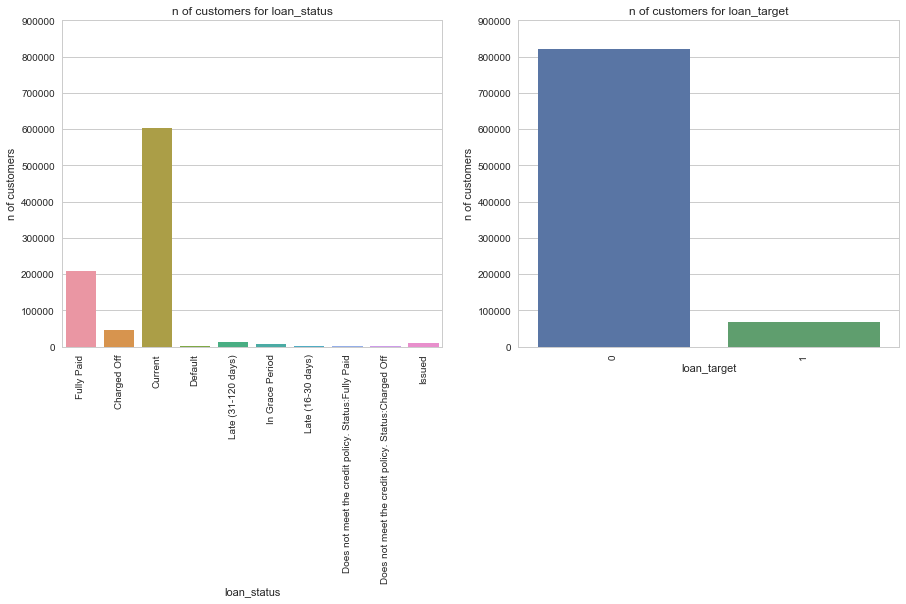

In [22]:
# Plot the target distribution
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))

col_to_plot = ['loan_status','loan_target']

for i, col in enumerate(col_to_plot):
    plt.subplot(1 ,2 , i+1)
    sns.countplot(x=col, data=data)
    plt.title('n of customers for %s' %col)
    plt.xlabel(col)
    plt.ylabel('n of customers')
    plt.xticks(rotation=90)
    plt.ylim((0,900000))

Most of the customers paid or will pay their loan. They were originally in the 'Fully Paid' or 'Current' category and have now been grouped (together wih 'issued') in the binary value 0 (good loans) for the loan_target. The remaining original categories have been grouped in the binary value 1 (bad loans) for the loan_target.

### Features

In [23]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_target'],
      dtype='object')

#### columns id,  member_id

'id' and 'member_id' are unique customer identifiers. If so they can be dropped as not adding value to the model.

In [24]:
# the provided descritpions of id and member_id are
print('id:', data_dictionary.iloc[19][1])
print('member_id:', data_dictionary.iloc[19][1])

id: A unique LC assigned ID for the loan listing.
member_id: A unique LC assigned ID for the loan listing.


In [25]:
# The total number of customers is 887379.
# I here check if I have a different value of 'id' and 'member_id' for each customer
print('The total number of customers is: ', len(data))
print('The number of unique id values are: ', len(data['id'].unique()))
print('The number of unique member_id values are: ', len(data['member_id'].unique()))

The total number of customers is:  887379
The number of unique id values are:  887379
The number of unique member_id values are:  887379


The columns 'id' and 'member_id' do not contain duplicates and do not provide relevant information, so they can be dropped

In [26]:
data.drop(labels = ['id','member_id'], inplace=True, axis=1)

#### Loan_amnt , funded_amnt , funded_amnt_inv

All these three features are numerical with no missing values

In [27]:
# the provided descritpions for these features are:
print('loan_amnt: ', data_dictionary.iloc[31][1])
print('funded_amnt: ', data_dictionary.iloc[15][1])
print('funded_amnt_inv: ', data_dictionary.iloc[16][1])

loan_amnt:  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
funded_amnt:  The total amount committed to that loan at that point in time.
funded_amnt_inv:  The total amount committed by investors for that loan at that point in time.


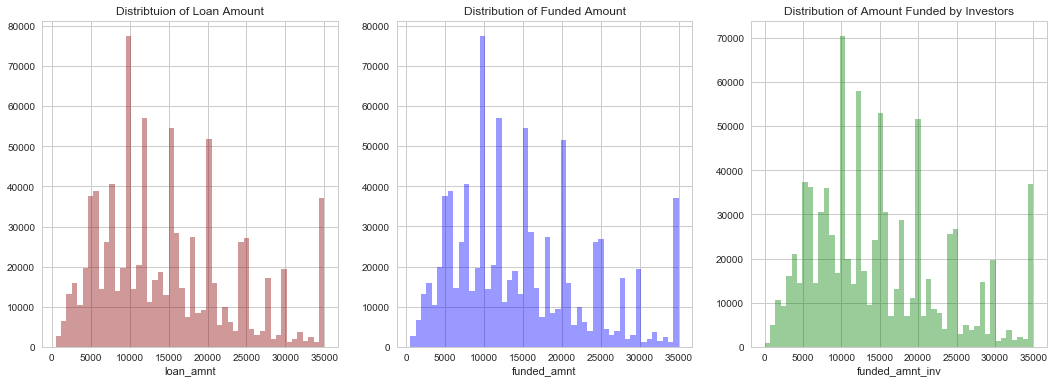

In [28]:
# Plot the target distribution
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 3, figsize=(18,6))

sns.distplot(data['loan_amnt'], ax=ax[0], color='darkred', kde=False)
ax[0].set_title('Distribtuion of Loan Amount')

sns.distplot(data['funded_amnt'], ax=ax[1], color='blue', kde=False)
ax[1].set_title('Distribution of Funded Amount')

sns.distplot(data['funded_amnt_inv'], ax=ax[2], color='green', kde=False)
ax[2].set_title('Distribution of Amount Funded by Investors')


The three plots above are very similar. There are certain specific amounts which appear more frequently than others(ex 10000, 12000, 15000 USDollars). The most common value is 10000. The maximum amount is 35000 USD and the data have probably being capped at that value.

In [29]:
# top 10 most common loan amounts
data['loan_amnt'].value_counts().head(10)

10000.0    61837
12000.0    50183
15000.0    47210
20000.0    46932
35000.0    36368
8000.0     27870
5000.0     27167
6000.0     26207
25000.0    24125
16000.0    23708
Name: loan_amnt, dtype: int64

In [30]:
# these three features seem very similar in terms of statistics
data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,887379.000000,887379.000000,887379.000000
mean,14755.264605,14741.877625,14702.464383
std,8435.455601,8429.897657,8442.106732
min,500.000000,500.000000,0.000000
25%,8000.000000,8000.000000,8000.000000
50%,13000.000000,13000.000000,13000.000000
75%,20000.000000,20000.000000,20000.000000
max,35000.000000,35000.000000,35000.000000


In [31]:
# and are indeed highly correlated
data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.999263,0.997115
funded_amnt,0.999263,1.000000,0.998025
funded_amnt_inv,0.997115,0.998025,1.000000


The correlation between these three features is very high (approximately around 0.99).
A closer look at correlation between all features will be done later, before training and testing split. Features with high correlation levels will be dropped to avoid multi-collinearity.

In [32]:
# n samples with different values between loan amnt and funded amnt
data_temp = data[['loan_amnt', 'funded_amnt']].diff(axis=1)
data_temp[data_temp['funded_amnt']!=0].count()

loan_amnt         0
funded_amnt    2062
dtype: int64

In [33]:
# n samples with different values between loan amnt and funded amnt inv
data_temp = data[['loan_amnt','funded_amnt_inv']].diff(axis=1)
data_temp[data_temp['funded_amnt_inv']!=0].count()
# which shows that there are approx 100000 samples with a different value

loan_amnt               0
funded_amnt_inv    100986
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

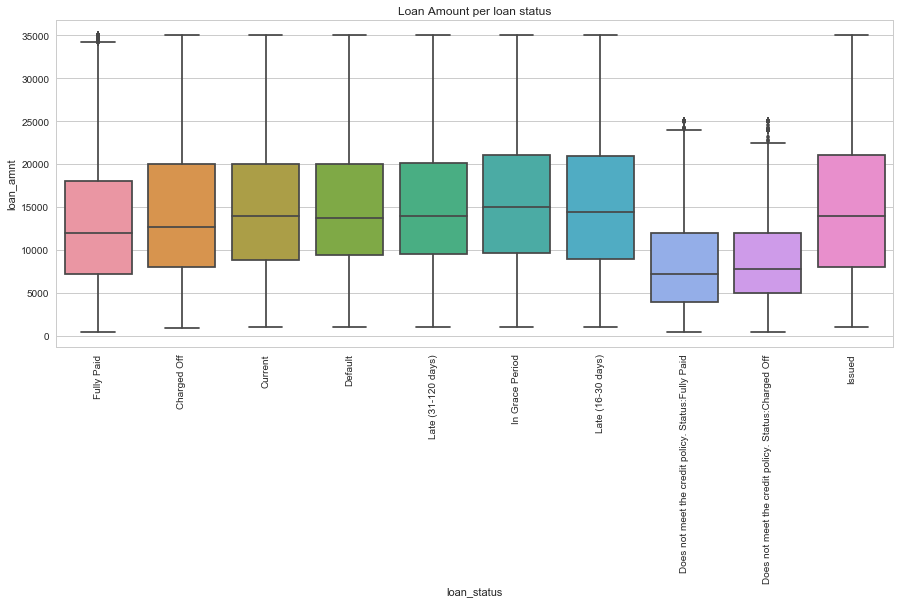

In [34]:
# Looking at relationship between loan amount versus loan_status and loan_target
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))

sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title('Loan Amount per loan status')
plt.xticks(rotation=90)

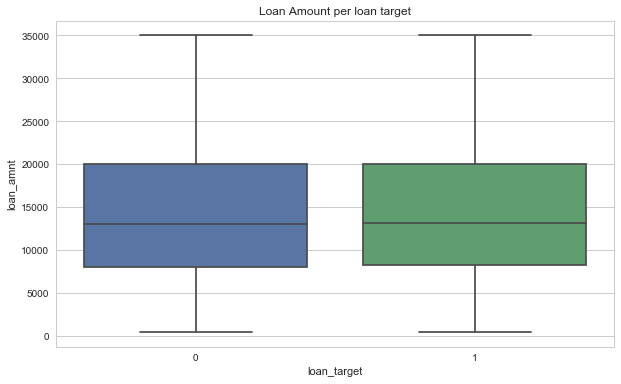

In [35]:
plt.figure(figsize=(10,6))

sns.boxplot(x='loan_target', y='loan_amnt', data=data)
plt.title('Loan Amount per loan target')

From the plots above there does not appear to be an obvious relationship between the loan amount and the target bad loans. ( that is there are no higher loan amounts for the customers which will not repay the loan).

When looking at the original loan status feature, the loan amounts are lower for the 'fully paid' category. However the loan amount for 'current' loans is similar to the amounts for the categories grouped in bad loans.

#### term

The term feature is categorical.
As shown below it is a string, which can take only two values '36 months' or '60 months'.
I take away the word 'months' and make the feature numerical.
From previous analysis, there are no missing values.

In [36]:
# the provided descritpion for this feature is:
print('term: ', data_dictionary.iloc[49][1])

term:  The number of payments on the loan. Values are in months and can be either 36 or 60.


In [37]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [38]:
type(data['term'].iloc[0])

str

##### Engineering term feature to make it numerical (in new feature called term_months) for machine learning algorithm

I create a new numerical feature which will have either 36 or 60 and then drop the original column

In [39]:
data['term_months'] = data['term'].apply(lambda x: x.split()[0]).astype(float)

In [40]:
# check
data[['term','term_months']].head()

,term,term_months
0,36 months,36.0
1,60 months,60.0
2,36 months,36.0
3,36 months,36.0
4,60 months,60.0


In [41]:
# drop original column
data.drop(labels =['term'], inplace=True, axis=1)

In [42]:
data['term_months'].value_counts()

36.0    621125
60.0    266254
Name: term_months, dtype: int64

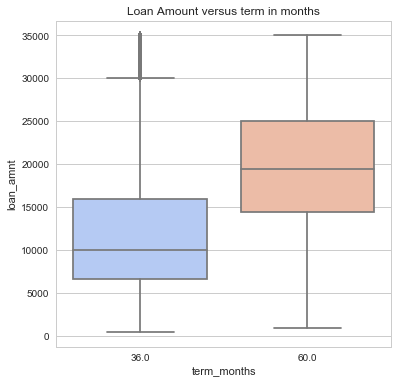

In [43]:
plt.figure(figsize=(6,6))

sns.boxplot(x='term_months', y='loan_amnt', data=data, palette='coolwarm')
plt.title('Loan Amount versus term in months')

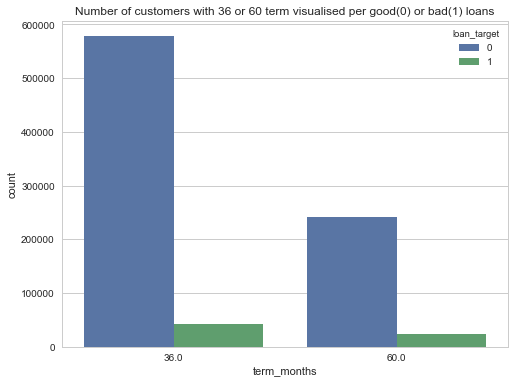

In [44]:
plt.figure(figsize=(8,6))

sns.countplot(x='term_months', hue='loan_target', data=data)
plt.title('Number of customers with 36 or 60 term visualised per good(0) or bad(1) loans')

In this section I have changed the categorical feature term to the numerical feature term_months, which has only 36 or 60 as value. From the plots above we can see that the loan amount for 60 months is generally higher than the one for 36 months.

There are more loans with 36 term. There is a higher percentage of bad loans in the 60 term.

#### int_rate, emp_title and emp_length

The interest rate feautre is numerical and has no missing values.
The feature emp_title is categorical and has some missing values.
The feature emp_length is categorical and has no missing values.
I expect that the employmnet of the customer will have part in deciding the interest rate of the loan. 

In [45]:
print('int_rate: ', data_dictionary.iloc[23][1])
print('emp_title: ', data_dictionary.iloc[12][1])
print('emp_length: ', data_dictionary.iloc[11][1])

int_rate:  Interest Rate on the loan
emp_title:  The job title supplied by the Borrower when applying for the loan.*
emp_length:  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [46]:
# top 10 most common values of interest rate
data['int_rate'].value_counts().head(10)

10.99    34624
9.17     25720
15.61    25201
9.99     21553
7.89     20311
13.99    19076
12.69    18783
12.29    18603
12.99    18540
17.57    18001
Name: int_rate, dtype: int64

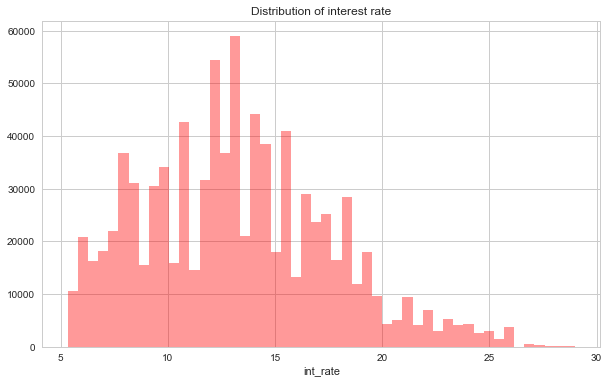

In [47]:
plt.figure(figsize=(10,6))
sns.distplot(data['int_rate'], kde=False, color='red')
plt.title('Distribution of interest rate')

The most frequent interest rates are around 12. Interest rates above 20 or in particular above 25 are rare. 

In [48]:
# Checking for outliers range, considering Gaussian distribution
up_gaussian_ir = data['int_rate'].mean()+ 3*data['int_rate'].std()
low_gaussian_ir = data['int_rate'].mean()- 3*data['int_rate'].std()
print('Upper boudary for int_rate feature: ', up_gaussian_ir)
print('Lower boudary for int_rate feature: ', low_gaussian_ir)

Upper boudary for int_rate feature:  26.392341923641553
Lower boudary for int_rate feature:  0.10113743531199937


In [49]:
# number of outliers
data[data['int_rate'] > 26.39].count()['int_rate']

1285

In [50]:
# number of customers with bad loans with such high values
# (checking in case they are significative)
outliers_in_bad = data[(data['int_rate'] > 26.39)&(data['loan_target'] == 1)].count()['loan_target']
outliers_in_good = data[(data['int_rate'] > 26.39)&(data['loan_target'] == 0)].count()['loan_target']
perc_outl_inbad = (outliers_in_bad / n_bad_loans)*100
perc_outl_ingood = (outliers_in_good / n_good_loans)*100

print('number of customers with interest rate > 26.39 in BAD loans: ', outliers_in_bad )
print('number of customers with interest rate > 26.39 in GOOD loans: ', outliers_in_good )
print('Percentage of customers in BAD loans with interest rate > 26.39: ', perc_outl_inbad)
print('Percentage of customers in GOOD loans with interest rate > 26.39: ', perc_outl_ingood)

number of customers with interest rate > 26.39 in BAD loans:  112
number of customers with interest rate > 26.39 in GOOD loans:  1173
Percentage of customers in BAD loans with interest rate > 26.39:  0.166100639191
Percentage of customers in GOOD loans with interest rate > 26.39:  0.143057503506


Samples with int_rate above 26.39 could be considered outliers. There are 1285 customers with such high interest rate.
This high interest rates do not seem concentrated preferibly on the customers with bad loans.
So there should not be indicative of our target.

Further investigation will be required to understand the origin of these higher values to see if they are values which should be considered wrong and how to deal with them.

In [51]:
# check how many unique employment titles are present in the data
len(data['emp_title'].unique())

299273

In [52]:
# these are the most common job titles in the data:
data['emp_title'].value_counts().head(10)

Teacher             13469
Manager             11240
Registered Nurse     5525
Owner                5376
RN                   5355
Supervisor           4983
Sales                4212
Project Manager      3988
Driver               3569
Office Manager       3510
Name: emp_title, dtype: int64

There are too many different job titles in the data (299273). This number is too high to be useful or significant for the
model. Hot-Encoding these will create too many new columns..
I will therefore drop this feauture.

In [53]:
# drop emp_title feature
data.drop(labels =['emp_title'], inplace=True, axis=1)

In [54]:
# now I look at emp_length
data['emp_length'].value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
n/a           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [55]:
type(data['emp_length'].iloc[0])

str

##### Engineering emp_length feature to make it numerical (new feature called emp_years) for machine learning algorithm

There are 12 different labels in the feature emp_length. These labels are strings formed by word 'year/s' plus a numerical part. There are also symbols (+, <) and n/a. I need to tranform this feature trying to keep the ordinality of the labels.
n/a could be associated with customers who are not working (ex they are students or retired).
I will substitute n/a with 0. I will substitute the <1 with 0 and 10+ with 10, following also the provided feature description.

The original feature will be dropped.

In [56]:
# strip word year/s and other unwanted symbols
data['emp_years'] = data['emp_length'].apply(lambda x: x.replace('years', ''))

In [57]:
data['emp_years'] = data['emp_years'].apply(lambda x: x.replace('year', ''))
data['emp_years'] = data['emp_years'].apply(lambda x: x.replace('+', ''))
data['emp_years'] = data['emp_years'].apply(lambda x: x.replace('< 1', '0'))
data['emp_years'] = data['emp_years'].apply(lambda x: x.replace('n/a', '0'))

In [58]:
data['emp_years'].value_counts()

10     291569
2       78870
0       70605
3       70026
1       57095
5       55704
4       52529
0       44825
7       44594
8       43955
6       42950
9       34657
Name: emp_years, dtype: int64

In [59]:
data['emp_years'] = data['emp_years'].astype(float)

In [60]:
type(data['emp_years'].iloc[0])

numpy.float64

In [61]:
# check:
data['emp_years'].value_counts()

10.0    291569
0.0     115430
2.0      78870
3.0      70026
1.0      57095
5.0      55704
4.0      52529
7.0      44594
8.0      43955
6.0      42950
9.0      34657
Name: emp_years, dtype: int64

In [62]:
data[['emp_length','emp_years']].head(10)

,emp_length,emp_years
0,10+ years,10.0
1,< 1 year,0.0
2,10+ years,10.0
3,10+ years,10.0
4,1 year,1.0
5,3 years,3.0
6,8 years,8.0
7,9 years,9.0
8,4 years,4.0
9,< 1 year,0.0


In [63]:
# drop original feature emp_length
data.drop(labels =['emp_length'], inplace=True, axis=1)

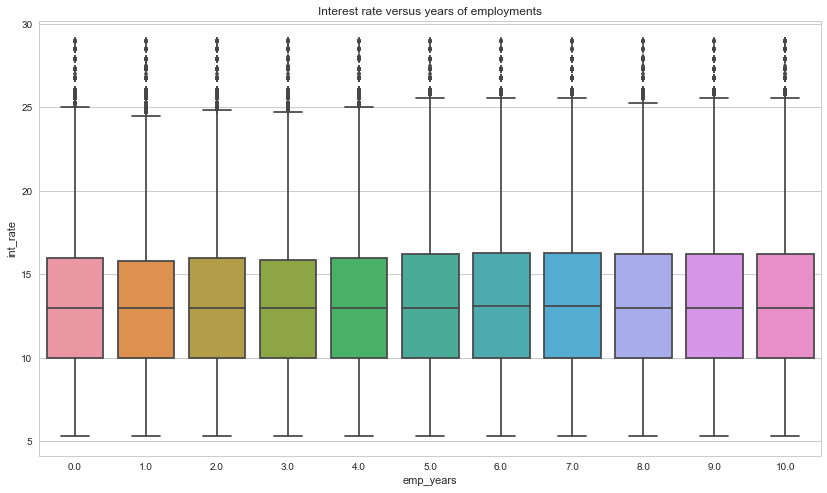

In [64]:
plt.figure(figsize=(14,8))

sns.boxplot(x='emp_years', y='int_rate', data=data)
plt.title('Interest rate versus years of employments')

From the above plot, there is no obvious obvious relationship between the years of employment and the interest rate

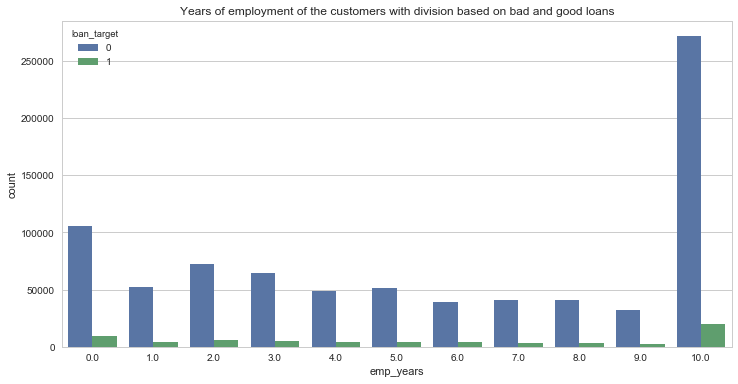

In [65]:
plt.figure(figsize=(12,6))

sns.countplot(x='emp_years', hue='loan_target', data=data)
plt.title('Years of employment of the customers with division based on bad and good loans')

Most of the customers have been working for 10 or more years, followed by the ones with less than 1 year of employment. Looking at the plot the proportion of bad loans is higher for customers with <1 year of employment compared to the ones with >10y. 

#### installment

The installment feature is numerical and has no missing values

In [66]:
print('installment: ', data_dictionary.iloc[22][1])

installment:  The monthly payment owed by the borrower if the loan originates.


In [67]:
# 10 most common values
data['installment'].value_counts().head(10)

327.34    2610
318.79    2142
491.01    1785
392.81    1775
312.86    1619
382.55    1553
654.68    1529
478.19    1448
314.20    1432
322.63    1426
Name: installment, dtype: int64

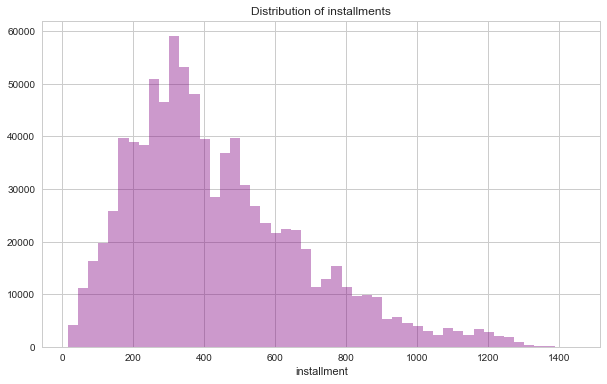

In [68]:
plt.figure(figsize=(10,6))
sns.distplot(data['installment'], kde=False, color='purple')
plt.title('Distribution of installments')

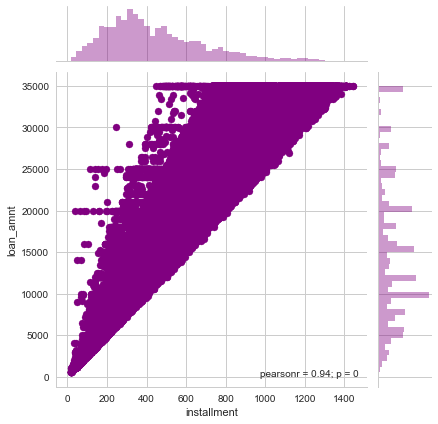

In [69]:
plt.figure(figsize=(10,6))
sns.jointplot(x='installment', y='loan_amnt', data=data, color='purple')

Installment distribution peaks around 300 (with sligthly skewed distribution). Much fewer customers have installments greater then 1000. As expected, the installment amounts seem to positively correlate well with the loan amount.
As shown in the code below, there are no extreme outliers

In [70]:
# checking for extreme outliers for non gaussian distribution
IQR_inst = data['installment'].quantile(0.75)-data['installment'].quantile(0.25)
up_bound_inst = data['installment'].quantile(0.75)+(3*IQR_inst)
low_bound_inst = data['installment'].quantile(0.25)-(3*IQR_inst)
print('upper boundary for outliers: ',up_bound_inst)
print('lower boundary for outliers: ',low_bound_inst)

upper boundary for outliers:  1508.2850000000003
lower boundary for outliers:  -674.9800000000002


In [71]:
data['installment'].max()

1445.46

#### grade, sub_grade

The features grade and sub_grade are categorical and have no missing values

In [72]:
print('grade: ', data_dictionary.iloc[17][1])
print('sub_grade: ', data_dictionary.iloc[48][1])

grade:  LC assigned loan grade
sub_grade:  LC assigned loan subgrade


In [73]:
data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [74]:
data['grade'].value_counts()

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

In [75]:
data['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [76]:
len(data['sub_grade'].unique())

35

In [77]:
data[['grade','sub_grade']].head(10)

,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
4,B,B5
5,A,A4
6,C,C5
7,E,E1
8,F,F2
9,B,B5


There are 35 categories in 'sub_grade' feature (high number). 'Sub_grade' is just a more detailed description of what is already captured in the 'grade' feature. I will therefore drop the 'sub_grade' feature to avoid its high cardinality.
In pre-processing stage, I will have to transform in numerical form the feature 'grade', either using hot-encoding or manually if I want to keep ordinality (for ex with A=0 and G=7).

In [78]:
data.drop(labels='sub_grade', inplace=True, axis=1)

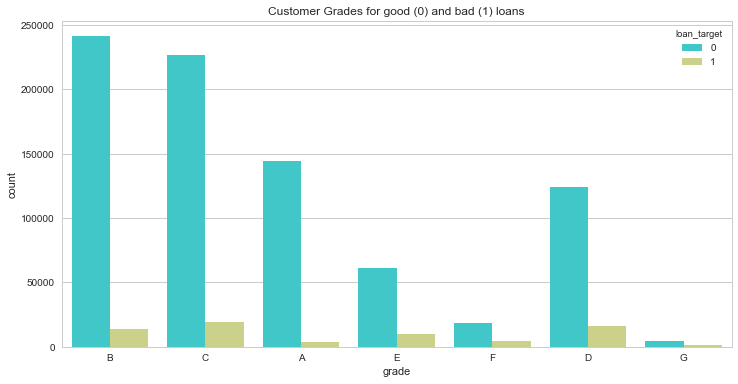

In [79]:
plt.figure(figsize=(12,6))

sns.countplot(x='grade', hue='loan_target', data=data, palette='rainbow')
plt.title('Customer Grades for good (0) and bad (1) loans')

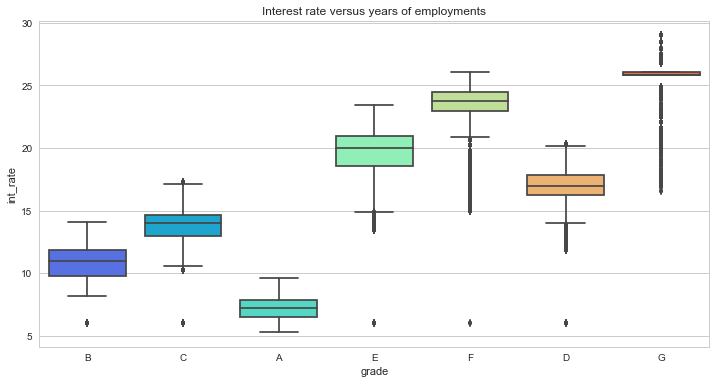

In [80]:
# reading grade definition from lending club website interest rate increases from grade A to grade G
plt.figure(figsize=(12,6))

sns.boxplot(x='grade', y='int_rate', data=data, palette='rainbow')
plt.title('Interest rate versus years of employments')

As seen on lending club website, the interest rate increases from grade A to G (as seen in the boxplot above).
Looking at the barplot, most of the customers have loans with grades B and C followed by A and D. Only a few customers have loans with grade G (high interest rate).

As shown in the countplot, bad loans are more common for customers with grades C and D compared to B and A.

#### home_ownership

This feature is categorical and has no missing values.

In [81]:
print('home_ownership: ', data_dictionary.iloc[18][1])

home_ownership:  The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.


In [82]:
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [83]:
data['home_ownership'].value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

##### Engineering feature to include 'ANY' and 'NONE' rare labels into 'OTHER'

There are only three customers in 'ANY' category. This is therefore a very rare category, which is not even included in the description. Having only 3 samples with this category, we could have the risk of falling only on the train or only on the test set.

As seen in the table below these three customers do not fall in the target 'bad loan'. Therefore will not be so informative.
I could either drop this three samples (as we have many) or include them in another category.
I choose to include them in the 'OTHER' category.

As also only 50 customers are in the 'NONE' category (maybe people who live with parents/parents without paying rent), I will also include those in the 'OTHER' category.

In [84]:
data[data['home_ownership'] == 'ANY']

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_target,term_months,emp_years
311334,5000.0,5000.0,5000.0,11.67,165.29,B,ANY,35680.0,Source Verified,Sep-2014,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,757xx,TX,28.12,0.0,Dec-2003,0.0,7.0,0.0,3319.0,43.1,12.0,f,0.0,0.0,5048.625,5048.62,5000.0,48.62,0.0,0.0,0.0,Oct-2014,5048.63,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,152.0,130923.0,7700.0,0,36.0,5.0
492723,34300.0,34300.0,34300.0,14.48,1180.31,C,ANY,78000.0,Verified,Dec-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Other,597xx,MT,17.71,0.0,Apr-1978,0.0,10.0,0.0,26312.0,42.6,20.0,w,34300.0,34300.0,0.000,0.00,0.0,0.00,0.0,0.0,0.0,NaN,0.00,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,319768.0,86000.0,0,36.0,10.0
669242,24000.0,24000.0,24000.0,16.55,590.68,D,ANY,77500.0,Source Verified,Jul-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,799xx,TX,34.05,0.0,Dec-2004,1.0,13.0,0.0,7151.0,34.5,27.0,w,22387.2,22387.2,3499.950,3499.95,1612.8,1887.15,0.0,0.0,0.0,Jan-2016,590.68,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,91938.0,20700.0,0,60.0,7.0


In [85]:
data['home_ownership'] = np.where(data['home_ownership'] == 'ANY', 'OTHER', data['home_ownership'])

In [86]:
data['home_ownership'].value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          185
NONE            50
Name: home_ownership, dtype: int64

In [87]:
data['home_ownership'] = np.where(data['home_ownership'] == 'NONE', 'OTHER', data['home_ownership'])

In [88]:
data['home_ownership'].value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          235
Name: home_ownership, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

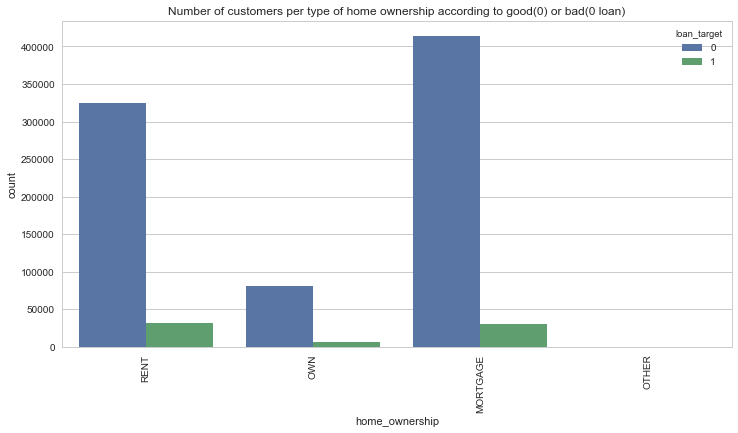

In [89]:
plt.figure(figsize=(12,6))

sns.countplot(x='home_ownership', hue='loan_target', data=data)
plt.title('Number of customers per type of home ownership according to good(0) or bad(0 loan)')
plt.xticks(rotation=90)

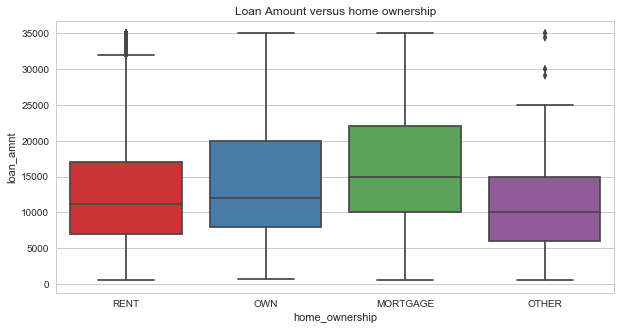

In [90]:
plt.figure(figsize=(10,5))

sns.boxplot(x='home_ownership', y='loan_amnt', data=data, palette='Set1')
plt.title('Loan Amount versus home ownership')

Most of the customers who request loans have a morgage or rent a property.

The higher amount of loans are requested by customers with a morgage, followed by the ones which own a property.

(in the engineering above I have included categories 'ANY' and 'NONE' to category 'OTHER').

#### annual_inc

This feature is numerical and has 4 missing values

In [91]:
print('annual_inc ', data_dictionary.iloc[1][1])

annual_inc  The self-reported annual income provided by the borrower during registration.


In [92]:
# the 10 most frequent incomes
data['annual_inc'].value_counts().head(10)

60000.0    34281
50000.0    30575
65000.0    25498
70000.0    24121
40000.0    23943
80000.0    22729
45000.0    22699
75000.0    22435
55000.0    20755
90000.0    17159
Name: annual_inc, dtype: int64

##### Investigation into the 4 missing values (I will drop the 4 samples in this section and new_n_records will become 887375)

In [93]:
# looking at the 4 samples with missing annual income
data[data['annual_inc'].isnull()==True]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_target,term_months,emp_years
42449,5000.0,5000.0,3025.0,7.43,155.38,A,OTHER,NaN,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,n,https://www.lendingclub.com/browse/loanDetail....,other,Moving expenses,100xx,NY,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,5593.46,3384.01,5000.0,593.46,0.0,0.0,0.0,Aug-2010,157.31,Sep-2010,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,0,36.0,0.0
42450,7000.0,7000.0,3450.0,7.75,218.55,A,OTHER,NaN,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,n,https://www.lendingclub.com/browse/loanDetail....,other,Education,100xx,NY,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,7867.53,3877.59,7000.0,867.53,0.0,0.0,0.0,Aug-2010,220.03,Sep-2010,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,0,36.0,0.0
42480,6700.0,6700.0,6700.0,7.75,209.18,A,OTHER,NaN,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,n,https://www.lendingclub.com/browse/loanDetail....,other,Moving expenses and security deposit,100xx,NY,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,7530.42,7530.42,6700.0,830.42,0.0,0.0,0.0,Jul-2010,209.89,Aug-2010,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,0,36.0,0.0
42533,6500.0,6500.0,0.0,8.38,204.84,A,OTHER,NaN,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,n,https://www.lendingclub.com/browse/loanDetail....,other,Buying a car,100xx,NY,4.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,7373.83,0.00,6500.0,873.83,0.0,0.0,0.0,Jun-2010,205.32,Jul-2010,Aug-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,0,36.0,0.0


In [94]:
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_target,term_months,emp_years
0,5000.0,5000.0,4975.0,10.65,162.87,B,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,36.0,10.0
1,2500.0,2500.0,2500.0,15.27,59.83,C,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,60.0,0.0
2,2400.0,2400.0,2400.0,15.96,84.33,C,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,36.0,10.0
3,10000.0,10000.0,10000.0,13.49,339.31,C,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,36.0,10.0
4,3000.0,3000.0,3000.0,12.69,67.79,B,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,60.0,1.0


The four samples with missing annual income have other few missing features compared to other samples.
Looking at them more in detail, they have been in employment less than a year. The purpose of the loan is 'OTHER' but the title tells the reason is linked to studying/moving/buying a car.
I don't think that giving this samples the mean or median of the annual income of the dataset will be correct as I assume they will more on the lower end.
None of these customers fall in the target category of bad loans.
As we have many samples, I decide to drop these 4 samples.

In [95]:
data.drop(42449, inplace=True)

In [96]:
data.drop(42450, inplace=True)

In [97]:
data.drop(42480, inplace=True)

In [98]:
data.drop(42533, inplace=True)

In [99]:
#check
data['annual_inc'].isnull().sum()

0

In [100]:
new_n_records = data.shape [0]
print('The new number of records is: ', new_n_records)

The new number of records is:  887375


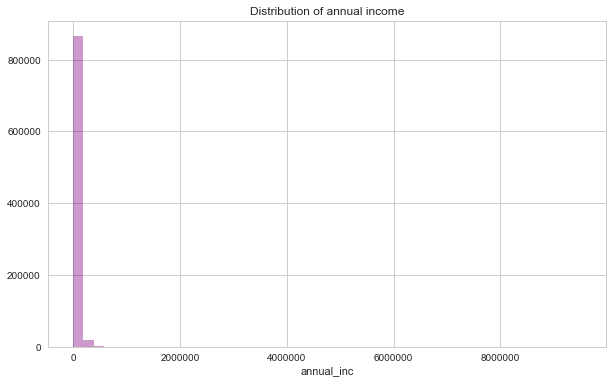

In [101]:
plt.figure(figsize=(10,6))
sns.distplot(data['annual_inc'], kde=False, color='purple')
plt.title('Distribution of annual income')
plt.ticklabel_format(style='plain', axis='x')

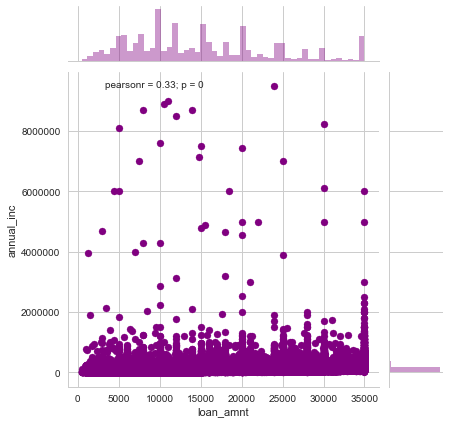

In [102]:
plt.figure(figsize=(10,6))
sns.jointplot(x='loan_amnt', y='annual_inc', data=data, color='purple')
plt.ticklabel_format(style='plain', axis='y')

##### Engineering this feature, capping income to 225000 USD (to aid also visualisation)

As shown in the plots above, the annual income distribution seems highy skewed with most of the customers earning between 0 and 200000 USD and a few customers earning much more than this range.
This distribution makes it hard to assess adn visualise and implies presence of outliers.

In [103]:
# checking for extreme outliers for non gaussian distribution
IQR_aninc = data['annual_inc'].quantile(0.75)-data['annual_inc'].quantile(0.25)
up_bound_aninc = data['annual_inc'].quantile(0.75)+(3*IQR_aninc)
low_bound_aninc = data['annual_inc'].quantile(0.25)-(3*IQR_aninc)
print('upper boundary for outliers: ',up_bound_aninc)
print('lower boundary for outliers: ',low_bound_aninc)

upper boundary for outliers:  225000.0
lower boundary for outliers:  -90000.0


In [104]:
n_outliers_aninc = len(data[data['annual_inc'] > 225000])
perc_outl_aninc = (n_outliers_aninc/new_n_records)*100
print('The numbers of customers with annual income above 225000 USD is: ', n_outliers_aninc)
print('The percentage of customers with annual income above 225000 USD is: ', perc_outl_aninc)

The numbers of customers with annual income above 225000 USD is:  12122
The percentage of customers with annual income above 225000 USD is:  1.3660515565572617


In [105]:
# capping annual income to 225000
data['annual_inc'] = np.where(data['annual_inc'] > 225000, 225000, data['annual_inc'])

In [106]:
data['annual_inc'].max()

225000.0

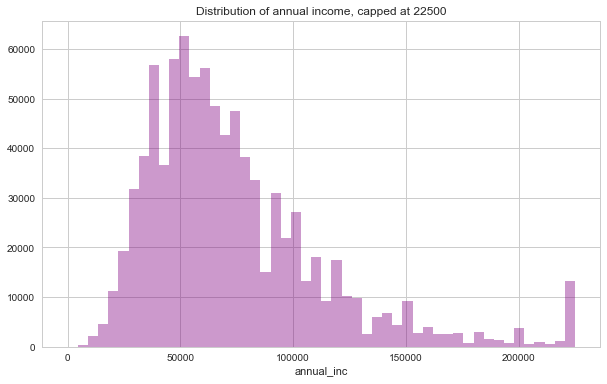

In [107]:
# checking distribution after capping
plt.figure(figsize=(10,6))
sns.distplot(data['annual_inc'], kde=False, color='purple')
plt.title('Distribution of annual income, capped at 22500')
plt.ticklabel_format(style='plain', axis='x')

Most of the customers earn around 50000 USD per year (distribution slightly skewed towards that value). The distribution is much less skewed after the capping. There are less customers in the high income range (ex above 150000 USD)

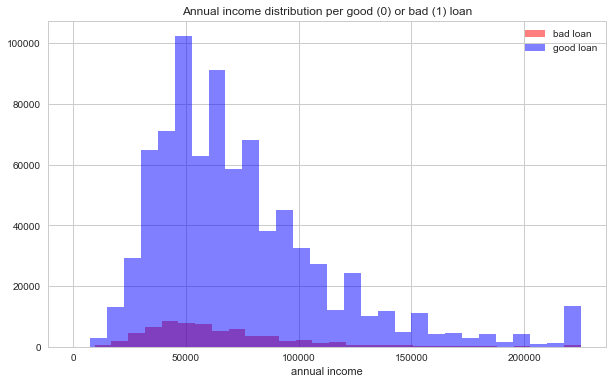

In [108]:
plt.figure(figsize=(10,6))
data[data['loan_target']==1]['annual_inc'].hist(alpha=0.5, color='red', bins=30, label='bad loan')
data[data['loan_target']==0]['annual_inc'].hist(alpha=0.5, color='blue', bins=30, label='good loan')
plt.legend()
plt.xlabel('annual income')
plt.title('Annual income distribution per good (0) or bad (1) loan')

The distribution of annual income for customers with bad or good loan is very similar. The bad loans have a higher proportion in the bin below the 50000. We can see that there are bad loans also in the higher income range.

#### verification_status

This is a categorical feature with no missing values. There is no decription in the excel file.
As seen below there are three categories: Verified, Source Verified and Not Verified.

The feaured will need to be encoded into numerical for machine learning algorithm in the pre-processing stage.

In [109]:
data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [110]:
data['verification_status'].value_counts()

Source Verified    329558
Verified           291071
Not Verified       266746
Name: verification_status, dtype: int64

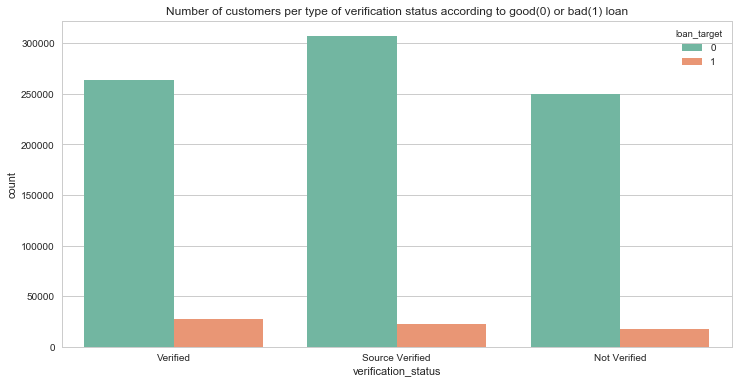

In [111]:
plt.figure(figsize=(12,6))

sns.countplot(x='verification_status', hue='loan_target', data=data, palette='Set2')
plt.title('Number of customers per type of verification status according to good(0) or bad(1) loan')

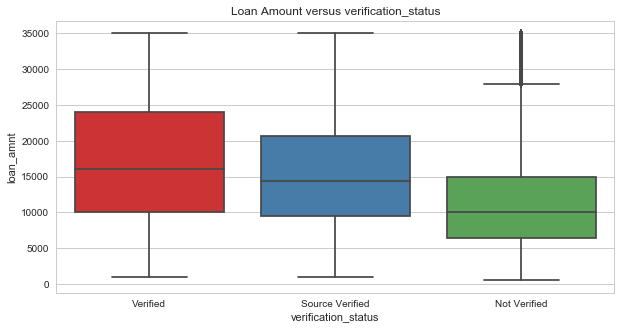

In [112]:
plt.figure(figsize=(10,5))

sns.boxplot(x='verification_status', y='loan_amnt', data=data, palette='Set1')
plt.title('Loan Amount versus verification_status')

From the plots above we can see that there are more customers with source verified status. However, in general the customers are almost equally distributed among the three categories.

In proportion, the bad loans seem more common for the verified category.

As expected, the loan amount is higher for the verified source than the not verified ones.

#### issue_d

This feature is categorical, with no missign values.
As shown below these values are strings which refere to month-date.
I will use pandas datetime and extract the year for a new feature called issue_year.
I will drop the original one.

In [113]:
print('issue_d ', data_dictionary.iloc[25][1])

issue_d  The month which the loan was funded


In [114]:
data['issue_d'].unique()

array(['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011',
       'Jul-2011', 'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011',
       'Feb-2011', 'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010',
       'Sep-2010', 'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010',
       'Apr-2010', 'Mar-2010', 'Feb-2010', 'Jan-2010', 'Dec-2009',
       'Nov-2009', 'Oct-2009', 'Sep-2009', 'Aug-2009', 'Jul-2009',
       'Jun-2009', 'May-2009', 'Apr-2009', 'Mar-2009', 'Feb-2009',
       'Jan-2009', 'Dec-2008', 'Nov-2008', 'Oct-2008', 'Sep-2008',
       'Aug-2008', 'Jul-2008', 'Jun-2008', 'May-2008', 'Apr-2008',
       'Mar-2008', 'Feb-2008', 'Jan-2008', 'Dec-2007', 'Nov-2007',
       'Oct-2007', 'Sep-2007', 'Aug-2007', 'Jul-2007', 'Jun-2007',
       'Dec-2013', 'Nov-2013', 'Oct-2013', 'Sep-2013', 'Aug-2013',
       'Jul-2013', 'Jun-2013', 'May-2013', 'Apr-2013', 'Mar-2013',
       'Feb-2013', 'Jan-2013', 'Dec-2012', 'Nov-2012', 'Oct-2012',
       'Sep-2012', 'Aug-2012', 'Jul-2012', 'Jun-2012', 'May-20

In [115]:
type(data['issue_d'].iloc[0])

str

##### Changing original feature to feature issue_year (numerical and showing only the year)

In [116]:
# parse the dates to datetime (temporary feature)
data['issue_dt'] = pd.to_datetime(data['issue_d'])

In [117]:
# extract the year only
data['issue_year'] = data['issue_dt'].dt.year

In [118]:
# check
data[['issue_d','issue_dt','issue_year']]

,issue_d,issue_dt,issue_year
0,Dec-2011,2011-12-01,2011
1,Dec-2011,2011-12-01,2011
2,Dec-2011,2011-12-01,2011
3,Dec-2011,2011-12-01,2011
4,Dec-2011,2011-12-01,2011
5,Dec-2011,2011-12-01,2011
6,Dec-2011,2011-12-01,2011
7,Dec-2011,2011-12-01,2011
8,Dec-2011,2011-12-01,2011
9,Dec-2011,2011-12-01,2011


In [119]:
# drop original and temporary feature
data.drop(labels =['issue_d'], inplace=True, axis=1)

In [120]:
data.drop(labels =['issue_dt'], inplace=True, axis=1)

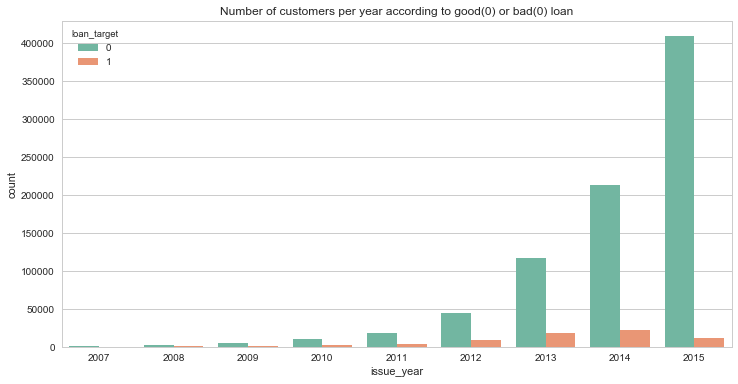

In [121]:
# look now at loans in relationship with year
plt.figure(figsize=(12,6))

sns.countplot(x='issue_year', hue='loan_target', data=data, palette='Set2')
plt.title('Number of customers per year according to good(0) or bad(0) loan')

The number of loans given by the lending club increased during the years, doubling almost in number for example from 2014 to 2015. It appears that the percentage of bad loans (respect to total loans of same year) has also significanlty decreased over the years.

#### pymnt_plan

This feature is categorcial and has no missing values.
As shown in the exploration below, there are only two categories ('n' and 'y').
which I could change to numerical for the machine algorithm in preprocessing stage.
However, from data exploration there are only 10 customers for which category is yes.
Therefore this feature is not informative and can be dropped.

In [122]:
print('pymnt_plan: ', data_dictionary.iloc[44][1])

pymnt_plan:  Indicates if a payment plan has been put in place for the loan


In [123]:
# there are only 2 categories
data['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [124]:
data['pymnt_plan'].value_counts()

n    887365
y        10
Name: pymnt_plan, dtype: int64

In [125]:
data.drop(labels =['pymnt_plan'], inplace=True, axis=1)

#### url

This is a categorical feature with no missing values.
The URL is unique for each customer and will not add valuable information to the model.
Therefore the feature will be dropped.

In [126]:
print('url: ', data_dictionary.iloc[57][1])

url:  URL for the LC page with listing data.


In [127]:
len(data['url'].unique())

887375

In [128]:
data.drop(labels =['url'], inplace=True, axis=1)

#### purpose

This is a categorical feature with no missing values.
It will need to be hot-encoded to numerical for the model algorithm.

In [129]:
print('purpose: ', data_dictionary.iloc[43][1])

purpose:  A category provided by the borrower for the loan request. 


In [130]:
print('The number of different categories in purpose is: ', len(data['purpose'].unique()))
print('They are: ', data['purpose'].unique())

The number of different categories in purpose is:  14
They are:  ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


In [131]:
data['purpose'].value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42890
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

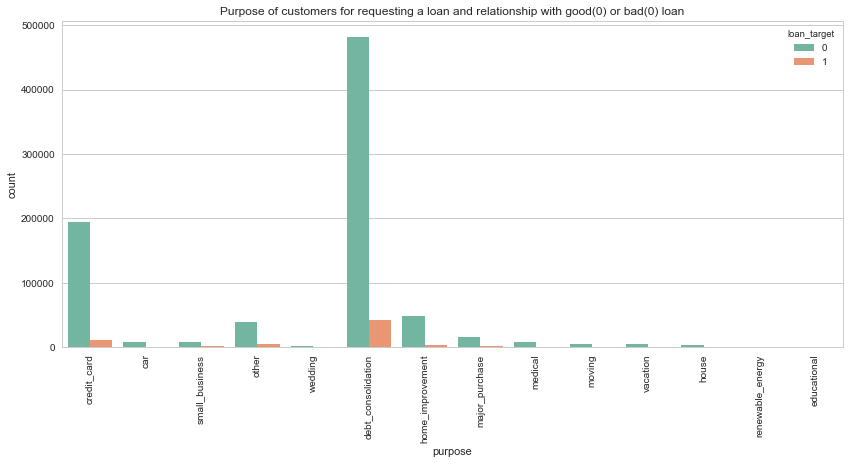

In [132]:
# look now at the distribution of customers according to purpose
plt.figure(figsize=(14,6))

sns.countplot(x='purpose', hue='loan_target', data=data, palette='Set2')
plt.title('Purpose of customers for requesting a loan and relationship with good(0) or bad(0) loan')
plt.xticks(rotation=90)

Most of the loan requests are for 'debt consolidation' or 'credit card' repayments. Most of the bad loans are also in these two categories.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

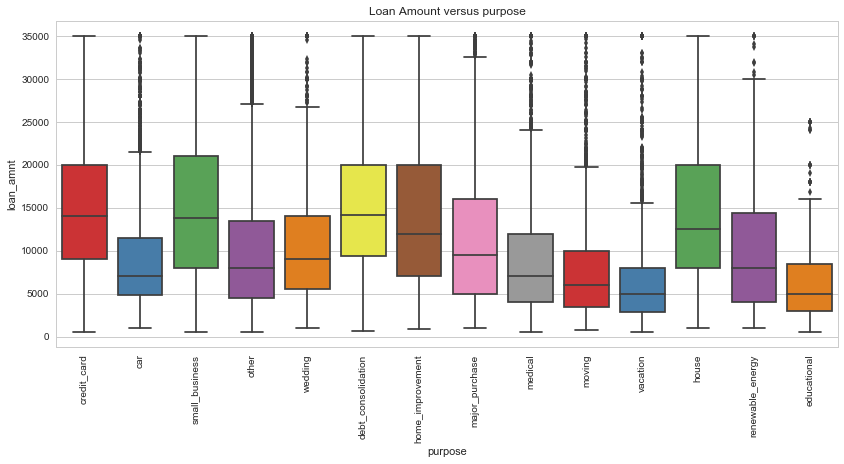

In [133]:
plt.figure(figsize=(14,6))

sns.boxplot(x='purpose', y='loan_amnt', data=data, palette='Set1')
plt.title('Loan Amount versus purpose')
plt.xticks(rotation=90)

In terms of loan amount, apart from 'debt consolidation' and 'credit card', the other reasons for customers to request high loan amounts are: 'small business', 'home improvement' and 'house'.

#### title

This is a categorical feature with some missing values.
As shown below there are more than 60000 different categories as these are titles decided by the customers.
For the scope of this project, I will drop this feature as there is already a feature for 'purpose'.
Alternatively, this 'title' feature will require more investigation into the words used in the title to reduce the categories into a much smaller number (for example there are two different categories for debt consolidation just because of different in capital C of consolidation).

In [134]:
print('title: ', data_dictionary.iloc[50][1])

title:  The loan title provided by the borrower


In [135]:
# the 10 most common titles are
data['title'].value_counts().head(10)

Debt consolidation         414001
Credit card refinancing    164331
Home improvement            40112
Other                       31892
Debt Consolidation          15760
Major purchase              12051
Business                     6728
Medical expenses             6674
Car financing                5565
Consolidation                5381
Name: title, dtype: int64

In [136]:
len(data['title'].unique())

63145

In [137]:
data.drop(labels =['title'], inplace=True, axis=1)

#### zip_code, addr_state

Both these features are categorical with no missing values.
As shown below there are 935 different zip codes in the data (high categorical feature).
The zip codes should be grouped to less categories, but we have already an addr_state feature which reports 51 states.
Therefore, I will drop 'zip_code' at start.
Then I will look at 'addr_state' feature, which will be also dropped for this project.

In [138]:
print('zip_code: ', data_dictionary.iloc[59][1])
print('addr_state: ', data_dictionary.iloc[0][1])

zip_code:  The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state:  The state provided by the borrower in the loan application


In [139]:
len(data['zip_code'].unique())

935

In [140]:
data['zip_code'].value_counts().head(5)

945xx    9770
750xx    9417
112xx    9272
606xx    8641
300xx    8126
Name: zip_code, dtype: int64

In [141]:
# I will not use the feature zip code so it can be dropped
data.drop(labels =['zip_code'], inplace=True, axis=1)

In [142]:
len(data['addr_state'].unique())

51

In [143]:
data['addr_state'].value_counts()

CA    129517
NY     74082
TX     71138
FL     60935
IL     35476
NJ     33256
PA     31393
OH     29631
GA     29085
VA     26255
NC     24720
MI     22985
MD     21031
MA     20593
AZ     20412
WA     19434
CO     18807
MN     15957
MO     14207
IN     13789
CT     13531
TN     12887
NV     12443
WI     11574
AL     11200
OR     10893
SC     10639
LA     10587
KY      8550
OK      8085
KS      7926
AR      6640
UT      6264
NM      4939
HI      4570
WV      4386
NH      4294
RI      3893
MS      3819
MT      2558
DE      2511
DC      2432
AK      2205
WY      2028
SD      1815
VT      1797
NE      1176
ME       525
ND       479
IA        14
ID        12
Name: addr_state, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

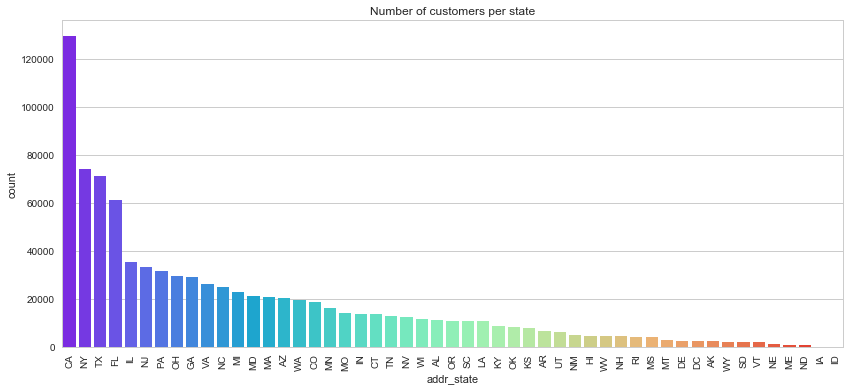

In [144]:
# look now at distribution of customers x state
plt.figure(figsize=(14,6))

sns.countplot(x='addr_state', data=data, palette='rainbow', order = data['addr_state'].value_counts().index)
plt.title('Number of customers per state')
plt.xticks(rotation=90)

The states which are more represented by the customers are: CA, NY, TX and FL.
However this distribution will be related also to population density.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

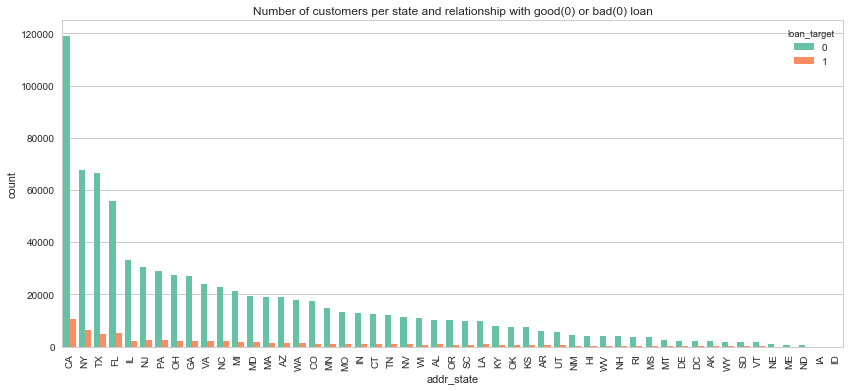

In [145]:
plt.figure(figsize=(14,6))

sns.countplot(x='addr_state', hue='loan_target', data=data, palette='Set2',order = data['addr_state'].value_counts().index,
             saturation=1)
plt.title('Number of customers per state and relationship with good(0) or bad(0) loan')
plt.xticks(rotation=90)

This feature has many categories (51). Loans will be more common in the most populated areas. I cannot see an evident geographical dependency for the target.
More time should be spent in reducing these categories in 'super-regions' to see if they can add value to the model.
For the scope of this project, I will drop also 'addr_state' feauture.

In [146]:
data.drop(labels =['addr_state'], inplace=True, axis=1)

#### dti

This is a numerical feature with no missing values. It represents debt to income ratio.
From the exploration below, there are two customers with dti of 9999, which is anomalous/errors.
I will drop these two data samples.

In [147]:
print('dti: ', data_dictionary.iloc[8][1])

dti:  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [148]:
# 10 most common values
data['dti'].value_counts().head(10)

19.2    684
14.4    674
18.0    661
13.2    638
16.8    632
15.6    626
20.4    598
12.0    596
21.6    594
24.0    534
Name: dti, dtype: int64

In [149]:
# when trying to plot the distribution of the dti it is clear that most of the values are concentrated in low values
# but there must be some outliers
data['dti'].describe()

count    887375.000000
mean         18.157113
std          17.190629
min           0.000000
25%          11.910000
50%          17.650000
75%          23.950000
max        9999.000000
Name: dti, dtype: float64

In [150]:
data[data['dti'] > 9000]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_target,term_months,emp_years,issue_year
484446,20000.0,20000.0,20000.0,16.99,712.96,D,MORTGAGE,0.0,Not Verified,Current,debt_consolidation,9999.0,0.0,Jul-2001,1.0,7.0,0.0,7161.0,88.4,11.0,w,19570.21,19570.21,694.08,694.08,429.79,264.29,0.0,0.0,0.0,Jan-2016,712.96,Feb-2016,Jan-2016,0.0,1.0,JOINT,0.0,0.0,8715.0,8100.0,0,36.0,0.0,2015
531886,3700.0,3700.0,3700.0,12.59,123.94,C,MORTGAGE,0.0,Not Verified,Current,credit_card,9999.0,2.0,Aug-1978,1.0,8.0,0.0,10649.0,56.9,20.0,f,3528.87,3528.87,242.70,242.70,171.13,71.57,0.0,0.0,0.0,Jan-2016,123.94,Feb-2016,Jan-2016,0.0,1.0,JOINT,0.0,0.0,24521.0,18700.0,0,36.0,0.0,2015


In [151]:
# I can see above that dti 9999 is associated with an annual income of 0.
# Are these the only two samples with income 0 in the dataset?
data[data['annual_inc']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_target,term_months,emp_years,issue_year
484446,20000.0,20000.0,20000.0,16.99,712.96,D,MORTGAGE,0.0,Not Verified,Current,debt_consolidation,9999.0,0.0,Jul-2001,1.0,7.0,0.0,7161.0,88.4,11.0,w,19570.21,19570.21,694.08,694.08,429.79,264.29,0.0,0.0,0.0,Jan-2016,712.96,Feb-2016,Jan-2016,0.0,1.0,JOINT,0.0,0.0,8715.0,8100.0,0,36.0,0.0,2015
531886,3700.0,3700.0,3700.0,12.59,123.94,C,MORTGAGE,0.0,Not Verified,Current,credit_card,9999.0,2.0,Aug-1978,1.0,8.0,0.0,10649.0,56.9,20.0,f,3528.87,3528.87,242.70,242.70,171.13,71.57,0.0,0.0,0.0,Jan-2016,123.94,Feb-2016,Jan-2016,0.0,1.0,JOINT,0.0,0.0,24521.0,18700.0,0,36.0,0.0,2015


There are two customers with value of dti = 9999 which could be related to the fact that these customer have reported annual income 0. The target for these two customers is GOOD loan (0).
Due to the amount of customers in the dataset and that these two samples fall in the very well represented good loan cateogry, I will drop the two samples.
Alternatively the formula used by Lending Club to calculate dti could be reviewed to obtain a correct value.


In [152]:
data.drop(484446, inplace=True)

In [153]:
data.drop(531886, inplace=True)

In [154]:
new_n_records = data.shape[0]
print('The new number of records is: ', new_n_records)

The new number of records is:  887373


In [155]:
data['dti'].describe()

count    887373.000000
mean         18.134617
std           8.425911
min           0.000000
25%          11.910000
50%          17.650000
75%          23.950000
max        1092.520000
Name: dti, dtype: float64

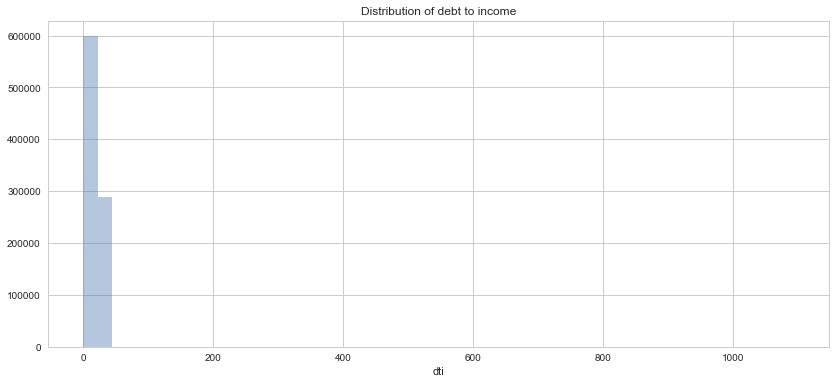

In [156]:
plt.figure(figsize=(14,6))
sns.distplot(data['dti'], kde=False)
plt.title('Distribution of debt to income')

Even after discarding the samples with the anomalous 'dti' of 9999, the distribution of this feature appears highly skewed, with most of the values around 0.

Here I look at the outliers.

In [157]:
# the data distribution appears still strongly skeawed

# checking for extreme outliers
IQR_dti = data['dti'].quantile(0.75)-data['dti'].quantile(0.25)
up_bound_dti = data['dti'].quantile(0.75)+(3*IQR_dti)
low_bound_dti = data['dti'].quantile(0.25)-(3*IQR_dti)
print('upper boundary for outliers: ',up_bound_dti)
print('lower boundary for outliers: ',low_bound_dti)

upper boundary for outliers:  60.06999999999999
lower boundary for outliers:  -24.209999999999997


In [158]:
# checking how many values are above upper boundary
len(data[data['dti'] > 60.069])

27

In [159]:
# check how many of this samples are in the bad loan category
data[(data['dti'] > 60.069) & (data['loan_target'] == 1)].count()['dti']

0

###### capping feature 'dti' to 60

There is a total of 27 customers with 'dti' value above 60.069. All of them are in the GOOD loan target category. More investigation would be needed to understand the validity of these values (are these mistakes? can I check with domain experts?).
For the purpose of the project I could drop these customers as they are very small in percentage, or I could cap the value.
I choose to cap the value at 60.

In [160]:
# capping dti to 60
data['dti'] = np.where(data['dti'] > 60, 60, data['dti'])

In [161]:
data['dti'].describe()

count    887373.000000
mean         18.131742
std           8.305669
min           0.000000
25%          11.910000
50%          17.650000
75%          23.950000
max          60.000000
Name: dti, dtype: float64

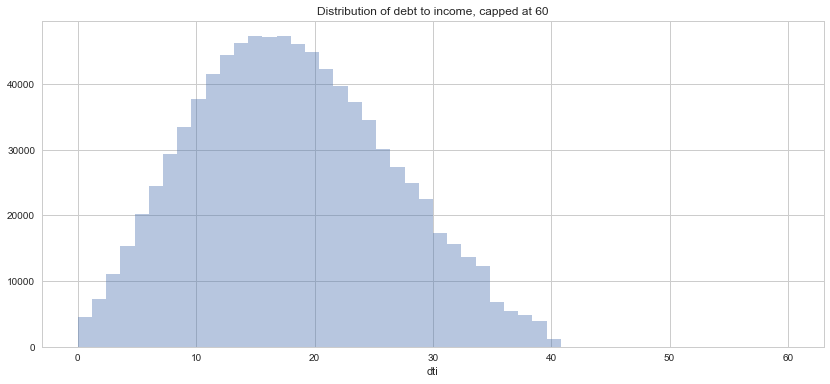

In [162]:
plt.figure(figsize=(14,6))
sns.distplot(data['dti'], kde=False)
plt.title('Distribution of debt to income, capped at 60')

The distribution of the 'dti' feature now looks more Gaussian, with a peak around 15-18 values. Only very few customers have 'dti' of more than 40 (including the customers for which we have capped the value).

In [163]:
len(data[data['dti'] > 40])

88

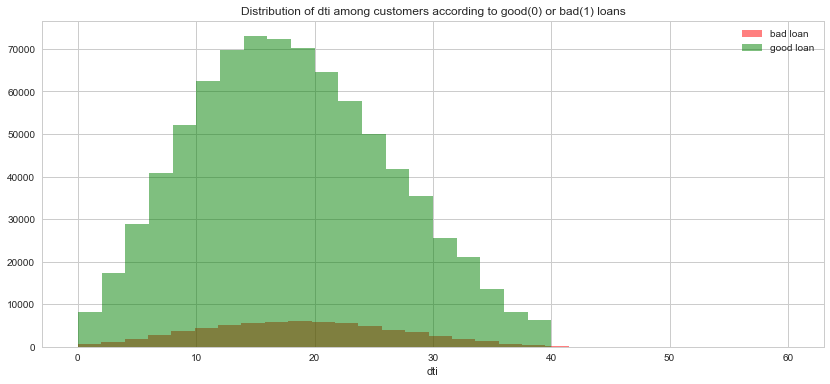

In [164]:
plt.figure(figsize=(14,6))
data[data['loan_target']==1]['dti'].hist(alpha=0.5, color='red', bins=30, label='bad loan')
data[data['loan_target']==0]['dti'].hist(alpha=0.5, color='green', bins=30, label='good loan')
plt.legend()
plt.xlabel('dti')
plt.title('Distribution of dti among customers according to good(0) or bad(1) loans')

The shape of the distribution of dti for good and bad loans is similar and gaussian. The peak of dti for bad loans is slightly moved towards higher numbers.

#### delinq_2yrs

This is a numerical feature with some missing values.
I will need to deal with missing values in preprocessing stage.

In [165]:
print('delinq_2yrs: ', data_dictionary.iloc[6][1])

delinq_2yrs:  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


In [166]:
# the top 10 most common values are
data['delinq_2yrs'].value_counts().head(10)

0.0    716960
1.0    113224
2.0     33550
3.0     11977
4.0      5327
5.0      2711
6.0      1471
7.0       784
8.0       461
9.0       284
Name: delinq_2yrs, dtype: int64

In [167]:
data['delinq_2yrs'].unique()

array([  0.,   2.,   3.,   1.,   4.,   6.,   5.,   8.,   7.,   9.,  11.,
        nan,  13.,  15.,  10.,  12.,  17.,  18.,  29.,  24.,  14.,  21.,
        22.,  19.,  16.,  30.,  26.,  20.,  27.,  39.])

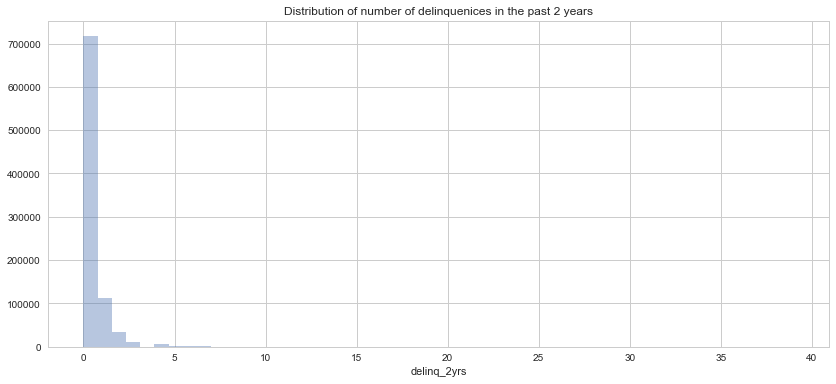

In [168]:
plt.figure(figsize=(14,6))
sns.distplot(data['delinq_2yrs'].dropna(), kde=False)
plt.title('Distribution of number of delinquenices in the past 2 years')

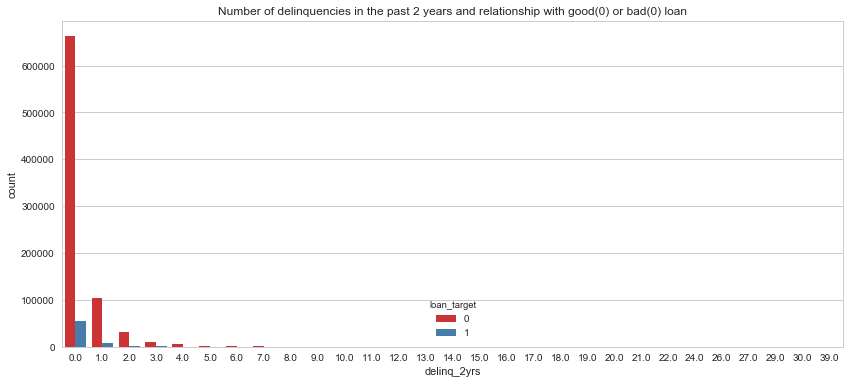

In [169]:
# look now at number of delinquencies in relationship to target
plt.figure(figsize=(14,6))

sns.countplot(x='delinq_2yrs', hue='loan_target', data=data, palette='Set1')
plt.title('Number of delinquencies in the past 2 years and relationship with good(0) or bad(0) loan')

The range of number of delinquencies among all customers is comprised between 0 and 39. Most of the customers have no delinquencies and are focused in the low numbers (dicrease in number of customers with increasing number of delinquencies).
In terms of targetted bad loans, there is the same kind of distribution. The plot does not seem to suggest that people with higher number of delinquences are more propone to default.

#### earliest_cr_line

This is a categorical feature with some missing values.
From the exploration below, these are strings representing dates.
As done for feature issue_d, I will use pandas datetime and extract the year for a new feature called earl_crline_year.
I will drop the original one.

In [170]:
print('earliest_cr_line ', data_dictionary.iloc[10][1])

earliest_cr_line  The month the borrower's earliest reported credit line was opened


In [171]:
data['earliest_cr_line'].value_counts().head(10)

Aug-2001    6659
Aug-2000    6529
Oct-2000    6322
Oct-2001    6154
Aug-2002    6086
Sep-2000    5918
Nov-1999    5878
Oct-1999    5824
Nov-2000    5822
Sep-2002    5812
Name: earliest_cr_line, dtype: int64

In [172]:
type(data['earliest_cr_line'].iloc[0])

str

##### Changing feature with datetime to create new feature called earl_crline_year capturing only the year

In [173]:
data['earl_crline_year'] = pd.to_datetime(data['earliest_cr_line'])

In [174]:
# extract the year only
data['earl_crline_year'] = data['earl_crline_year'].dt.year

In [175]:
#check
data[['earliest_cr_line','earl_crline_year']].head(5)

,earliest_cr_line,earl_crline_year
0,Jan-1985,1985.0
1,Apr-1999,1999.0
2,Nov-2001,2001.0
3,Feb-1996,1996.0
4,Jan-1996,1996.0


In [176]:
#drop original feature
data.drop(labels =['earliest_cr_line'], inplace=True, axis=1)

In [177]:
# top 10 most common values
data['earl_crline_year'].value_counts().head(10)

2001.0    63115
2000.0    62614
2002.0    57410
1999.0    56747
2003.0    52730
1998.0    48381
2004.0    47246
1997.0    40933
1996.0    40461
2005.0    38641
Name: earl_crline_year, dtype: int64

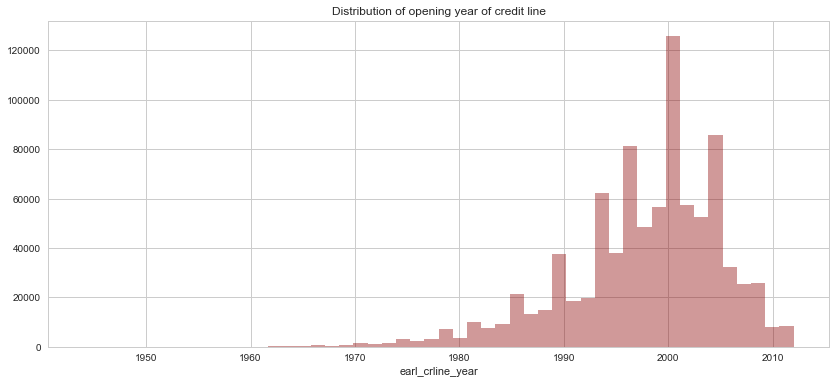

In [178]:
plt.figure(figsize=(14,6))
sns.distplot(data['earl_crline_year'].dropna(), kde=False, color='darkred')
plt.title('Distribution of opening year of credit line')

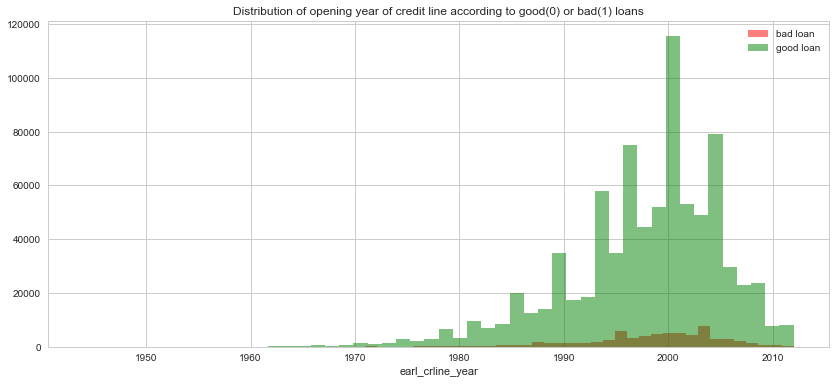

In [179]:
plt.figure(figsize=(14,6))
data[data['loan_target']==1]['earl_crline_year'].hist(alpha=0.5, color='red', bins=50, label='bad loan')
data[data['loan_target']==0]['earl_crline_year'].hist(alpha=0.5, color='green', bins=50, label='good loan')
plt.legend()
plt.xlabel('earl_crline_year')
plt.title('Distribution of opening year of credit line according to good(0) or bad(1) loans')

The peak in distribution considering all customers is in 2000-2001. If analysing distributions for bad and good loans, the years around 1995 and 2004 had a high percentage of bad loans compared to the other years.

#### inq_last_6mths

This is a numerical feature with some missing values.

In [180]:
print('inq_last_6mths: ', data_dictionary.iloc[21][1])

inq_last_6mths:  The number of inquiries in past 6 months (excluding auto and mortgage inquiries)


In [181]:
data['inq_last_6mths'].value_counts()

0.0     497905
1.0     241492
2.0      94117
3.0      37398
4.0      10758
5.0       3985
6.0       1231
7.0        195
8.0        122
9.0         50
10.0        24
11.0        15
12.0        15
15.0         9
14.0         6
13.0         6
18.0         4
16.0         3
17.0         2
19.0         2
24.0         2
31.0         1
32.0         1
25.0         1
28.0         1
20.0         1
33.0         1
27.0         1
Name: inq_last_6mths, dtype: int64

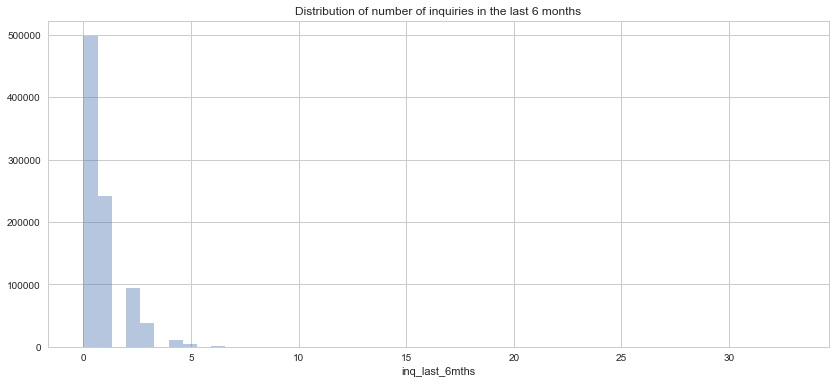

In [182]:
plt.figure(figsize=(14,6))
sns.distplot(data['inq_last_6mths'].dropna(), kde=False)
plt.title('Distribution of number of inquiries in the last 6 months')

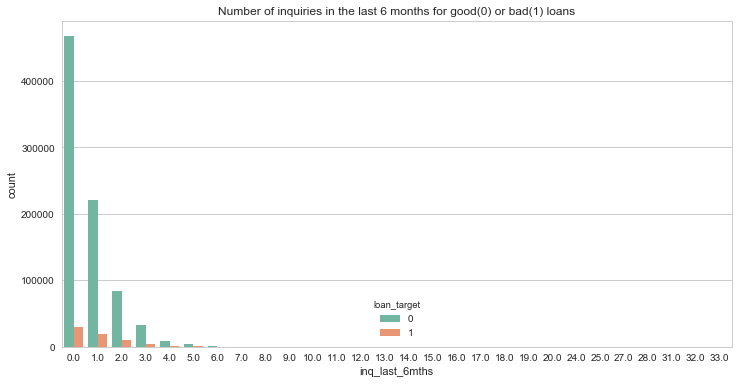

In [183]:
plt.figure(figsize=(12,6))

sns.countplot(x='inq_last_6mths', hue='loan_target', data=data, palette='Set2')
plt.title('Number of inquiries in the last 6 months for good(0) or bad(1) loans')

Most of the customers had 0 inquiries in the past 6 months. The number of customers descreases with increasing inquieries.
(for example there are less than 25 customers which have 10 inquiries and the number of customers continues to decrease).
The distribution in terms of good or bad loans follows the same trend.

#### open_acc

It is a numerical feature and has some missing values.

In [184]:
print('open_acc: ', data_dictionary.iloc[38][1])

open_acc:  The number of open credit lines in the borrower's credit file.


In [185]:
# top 10 most common values
data['open_acc'].value_counts().head(10)

9.0     80285
10.0    78321
8.0     76577
11.0    72265
7.0     67895
12.0    64690
13.0    56642
6.0     55954
14.0    47814
15.0    39778
Name: open_acc, dtype: int64

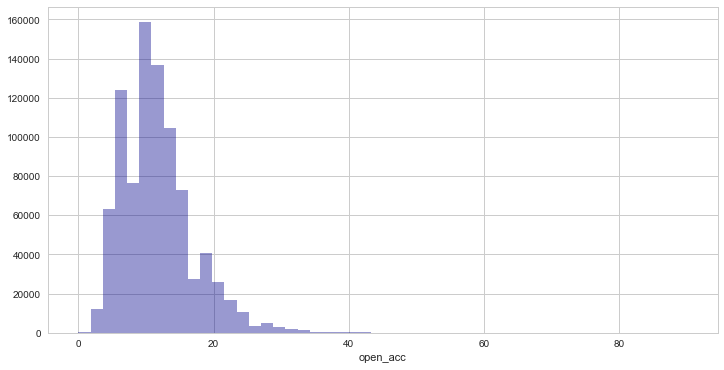

In [186]:
plt.figure(figsize=(12,6))
sns.distplot(data['open_acc'].dropna(), kde=False, color='darkblue')

The most common value of open accounts is 10. The distribution is skewed towards this value.
There are few samples with much higher values. Therefore I'll check for outliers.

##### capping feature to 32

In [187]:
# checking for extreme outliers
IQR_oacc = data['open_acc'].quantile(0.75)-data['open_acc'].quantile(0.25)
up_bound_oacc = data['open_acc'].quantile(0.75)+(3*IQR_oacc)
low_bound_oacc = data['open_acc'].quantile(0.25)-(3*IQR_oacc)
print('upper boundary for outliers: ',up_bound_oacc)
print('lower boundary for outliers: ',low_bound_oacc)

upper boundary for outliers:  32.0
lower boundary for outliers:  -10.0


In [188]:
# checking number of outliers
n_outl_oacc = len(data[data['open_acc']>32])
perc_outl_oacc = (n_outl_oacc/new_n_records)*100
print('The number of customers with open account above 32 is: ', n_outl_oacc)
print('The percentage of customers with open account above 32 is: ', perc_outl_oacc)

The number of customers with open account above 32 is:  3494
The percentage of customers with open account above 32 is:  0.3937464854125604


In [189]:
len(data[data['open_acc']>32])

3494

In [190]:
# check how many of this samples are in the bad loan category
n_outloacc_bad = data[(data['open_acc'] > 32) & (data['loan_target'] == 1)].count()['open_acc']
n_outloacc_good = data[(data['open_acc'] > 32) & (data['loan_target'] == 0)].count()['open_acc']
print('Number of samples > 32 in the bad loan category: ', n_outloacc_bad)
print('Number of samples > 32 in the good loan category: ', n_outloacc_good)

Number of samples > 32 in the bad loan category:  209
Number of samples > 32 in the good loan category:  3285


In [191]:
perc_outloacc_inbad = (n_outloacc_bad / len(data[data['loan_target']==1]))*100
perc_ouloacc_ingood = (n_outloacc_good / len(data[data['loan_target']==0]))*100
print('Percentage of samples > 32 in the bad loan category: ', perc_outloacc_inbad)
print('Percentage of samples > 32 in the good loan category: ', perc_ouloacc_ingood)

Percentage of samples > 32 in the bad loan category:  0.309955657062
Percentage of samples > 32 in the good loan category:  0.400637116681


There are a total of 3494 customers with numbe of open accounts above 32 (outlier limit). This accounts for a very kow percentage (<1%) of the total customers. Moreover, these high values do not seem necessary an indication towards bad loans. The values >32 represent approx 0.30% of bad loans ann 0.40% of good loans.

More investigation will be needed to understand the nature of these outliers. I assume here that they are not errors.
In order to have a less sweked distribution, I'll cap the feature to 32.

In [192]:
# capping open_acc to 32
data['open_acc'] = np.where(data['open_acc'] > 32, 32, data['open_acc'])

In [193]:
data['open_acc'].describe()

count    887348.000000
mean         11.527861
std           5.217049
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          32.000000
Name: open_acc, dtype: float64

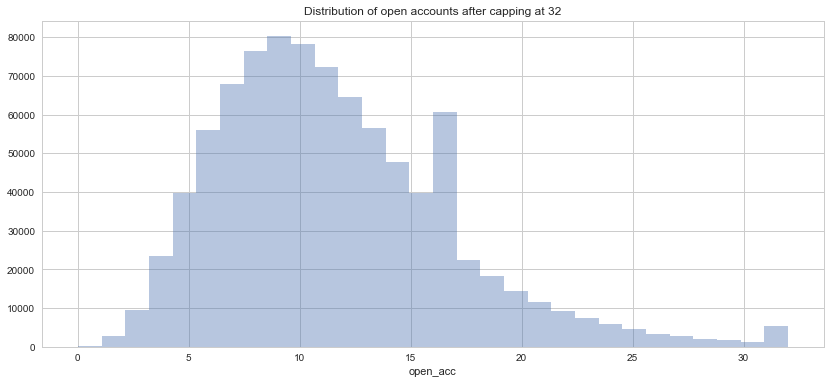

In [194]:
plt.figure(figsize=(14,6))
sns.distplot(data['open_acc'].dropna(), kde=False, bins=30)
plt.title('Distribution of open accounts after capping at 32')

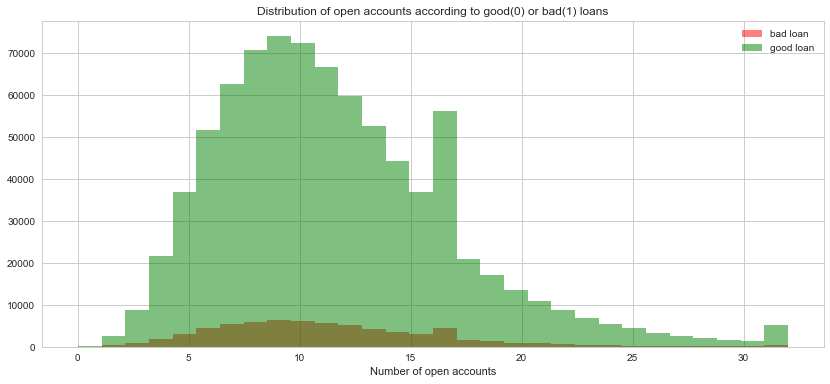

In [195]:
plt.figure(figsize=(14,6))
data[data['loan_target']==1]['open_acc'].hist(alpha=0.5, color='red', bins=30, label='bad loan')
data[data['loan_target']==0]['open_acc'].hist(alpha=0.5, color='green', bins=30, label='good loan')
plt.legend()
plt.xlabel('Number of open accounts')
plt.title('Distribution of open accounts according to good(0) or bad(1) loans')

After capping the variable distribution is more Gaussian.
There is a peak in distribution of number of open accounts around 9-10 for both good and bad loans.
For both again there seems to be a second isolated peak around 16.

#### pub_rec

This feature is numerical and has some missing values

In [196]:
print('pub_rec: ', data_dictionary.iloc[42][1])

pub_rec:  Number of derogatory public records


In [197]:
# top 10 most common values
data['pub_rec'].value_counts().head(10)

0.0    751570
1.0    113266
2.0     14854
3.0      4487
4.0      1564
5.0       757
6.0       385
7.0       170
8.0       113
9.0        50
Name: pub_rec, dtype: int64

In [198]:
data['pub_rec'].describe()

count    887348.000000
mean          0.195308
std           0.582091
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

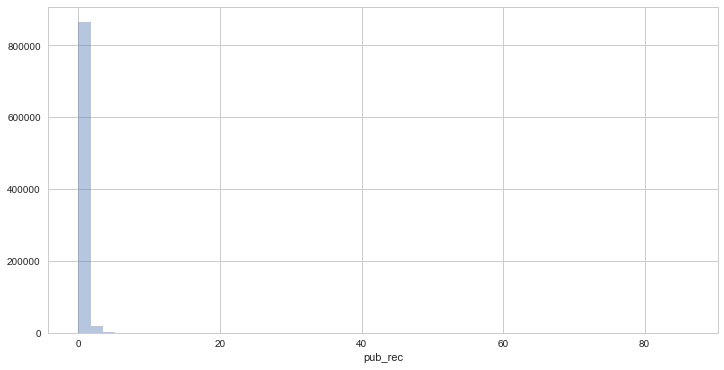

In [199]:
plt.figure(figsize=(12,6))
sns.distplot(data['pub_rec'].dropna(), kde=False)

The feauture is skewed with most of the values close to 0. I will investigate samples with value more than 10.

##### Capping value at 10

In [200]:
# checking number of samples above 10
n_outl_prec = len(data[data['pub_rec']>10])
perc_outl_prec = (n_outl_prec/new_n_records)*100
print('The number of customers with number of public records above 10 is: ', n_outl_prec)
print('The percentage of customers with number of public records  above 10 is: ', perc_outl_prec)

The number of customers with number of public records above 10 is:  90
The percentage of customers with number of public records  above 10 is:  0.010142296418755133


In [201]:
# check how many of this samples are in the bad loan category
n_outlprec_bad = data[(data['pub_rec'] > 10) & (data['loan_target'] == 1)].count()['pub_rec']
n_outlprec_good = data[(data['pub_rec'] > 10) & (data['loan_target'] == 0)].count()['pub_rec']
print('Number of samples > 10 in the bad loan category: ', n_outlprec_bad)
print('Number of samples > 10 in the good loan category: ', n_outlprec_good)

Number of samples > 10 in the bad loan category:  5
Number of samples > 10 in the good loan category:  85


In [202]:
perc_outlprec_inbad = (n_outlprec_bad / len(data[data['loan_target']==1]))*100
perc_outlprec_ingood = (n_outlprec_good / len(data[data['loan_target']==0]))*100
print('Percentage of samples > 10 in the bad loan category: ', perc_outlprec_inbad)
print('Percentage of samples > 10 in the good loan category: ', perc_outlprec_ingood)

Percentage of samples > 10 in the bad loan category:  0.00741520710673
Percentage of samples > 10 in the good loan category:  0.0103665616188


The number of customers with value of public records above 10 is very low: only 90 (0.01%). They are not preferably in bad loans. So from this preliminary investigation values >10 do not seem inidcative of either bad or good loans.

In [203]:
# capping pub_rec at 10
data['pub_rec'] = np.where(data['pub_rec'] > 10, 10, data['pub_rec'])

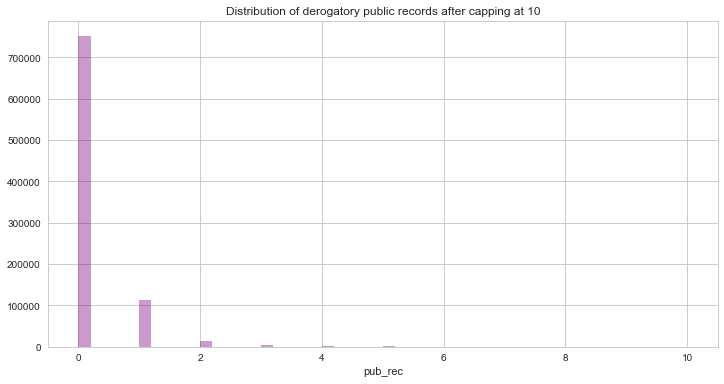

In [204]:
plt.figure(figsize=(12,6))
sns.distplot(data['pub_rec'].dropna(), kde=False, color='purple')
plt.title('Distribution of derogatory public records after capping at 10')

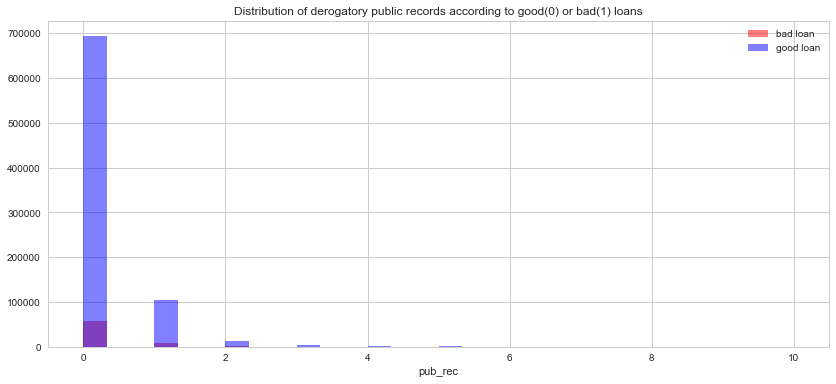

In [205]:
plt.figure(figsize=(14,6))
data[data['loan_target']==1]['pub_rec'].hist(alpha=0.5, color='red', bins=30, label='bad loan')
data[data['loan_target']==0]['pub_rec'].hist(alpha=0.5, color='blue', bins=30, label='good loan')
plt.legend()
plt.xlabel('pub_rec')
plt.title('Distribution of derogatory public records according to good(0) or bad(1) loans')

#### revol_bal, revol_util

Both features are numerical. Revol_bal has no missing values, while revol_util has a few.

In [206]:
print('revol_bal: ', data_dictionary.iloc[46][1])
print('revol_util: ', data_dictionary.iloc[47][1])

revol_bal:  Total credit revolving balance
revol_util:  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [207]:
# top 10 most common values
data['revol_bal'].value_counts().head(10)

0.0       3398
5235.0      74
5466.0      72
4479.0      68
6223.0      67
8696.0      67
6969.0      67
8073.0      66
5849.0      66
5853.0      66
Name: revol_bal, dtype: int64

In [208]:
# top 10 most common values
data['revol_util'].value_counts().head(10)

0.0     3540
58.0    1780
53.0    1766
59.0    1765
61.0    1757
57.0    1722
62.0    1720
52.0    1709
55.0    1699
63.0    1697
Name: revol_util, dtype: int64

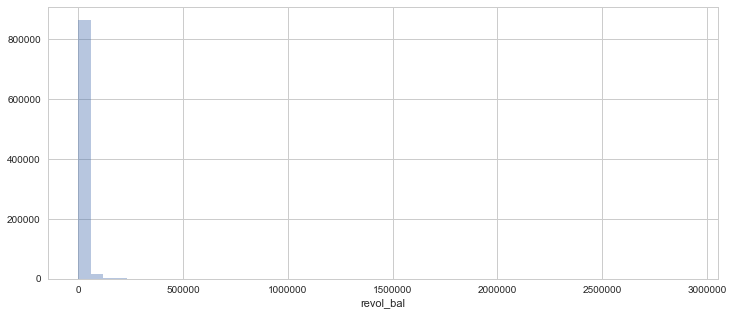

In [209]:
plt.figure(figsize=(12,5))
sns.distplot(data['revol_bal'], kde=False)

The distribution of revolving balance is highly skewed, with most of the customers having a balance focus towards the low part of the plot. However, the plot extend to very high numbers. I need to investigate outliers and their significance.

##### capping 'revol_bal' at 63987

In [210]:
# checking for extreme outliers
IQR_rbal = data['revol_bal'].quantile(0.75)-data['revol_bal'].quantile(0.25)
up_bound_rbal = data['revol_bal'].quantile(0.75)+(3*IQR_rbal)
low_bound_rbal = data['revol_bal'].quantile(0.25)-(3*IQR_rbal)
print('upper boundary for outliers: ',up_bound_rbal)
print('lower boundary for outliers: ',low_bound_rbal)

upper boundary for outliers:  63987.0
lower boundary for outliers:  -36715.0


In [211]:
# checking number of samples above 63987
n_outl_rbal = len(data[data['revol_bal'] > 63987])
perc_outl_rbal = (n_outl_rbal/new_n_records)*100
print('The number of customers with revovling balance above 63987 is: ', n_outl_rbal)
print('The percentage of customers with revolving balance above 63987 is: ', perc_outl_rbal)

The number of customers with revovling balance above 63987 is:  18428
The percentage of customers with revolving balance above 63987 is:  2.076691537831329


In [212]:
# check how many of this samples are in the bad loan category
n_outlrbal_bad = data[(data['revol_bal'] > 63987) & (data['loan_target'] == 1)].count()['revol_bal']
n_outlrbal_good = data[(data['revol_bal'] > 63987) & (data['loan_target'] == 0)].count()['revol_bal']
print('Number of samples > 63987 in the bad loan category: ', n_outlrbal_bad)
print('Number of samples > 63987 in the good loan category: ', n_outlrbal_good)

Number of samples > 63987 in the bad loan category:  907
Number of samples > 63987 in the good loan category:  17521


In [213]:
perc_outlrbal_inbad = (n_outlrbal_bad / len(data[data['loan_target']==1]))*100
perc_outlrbal_ingood = (n_outlrbal_good / len(data[data['loan_target']==0]))*100
print('Percentage of samples > 63987 in the bad loan category: ', perc_outlrbal_inbad)
print('Percentage of samples > 63987 in the good loan category: ', perc_outlrbal_ingood)

Percentage of samples > 63987 in the bad loan category:  1.34511856916
Percentage of samples > 63987 in the good loan category:  2.13685324851


The precentage of customers with a revolving balance above extreme outlier threshold (63987) is only 2%. These outliers do not seem to indicate prefernciale distribution in bad loans.
Some more investigation should be carried out on the outliers to investigate their source.
For this project I will cap the value to 63987.

In [214]:
# capping revol_bal at 63987
data['revol_bal'] = np.where(data['revol_bal'] > 63987, 63987, data['revol_bal'])

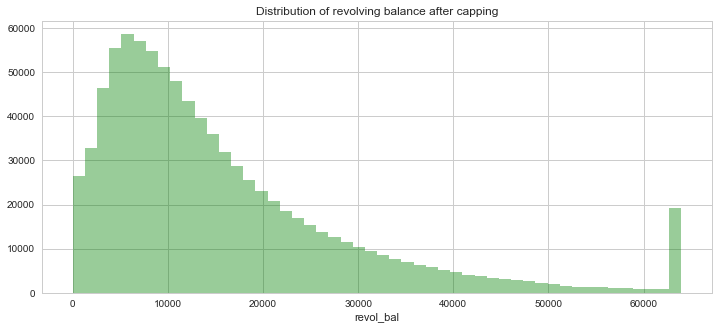

In [215]:
plt.figure(figsize=(12,5))
sns.distplot(data['revol_bal'], kde=False, color='green')
plt.title('Distribution of revolving balance after capping')

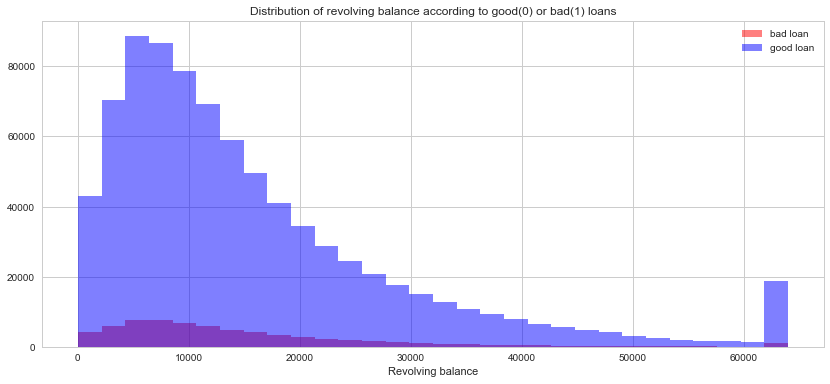

In [216]:
plt.figure(figsize=(14,6))
data[data['loan_target']==1]['revol_bal'].hist(alpha=0.5, color='red', bins=30, label='bad loan')
data[data['loan_target']==0]['revol_bal'].hist(alpha=0.5, color='blue', bins=30, label='good loan')
plt.legend()
plt.xlabel('Revolving balance')
plt.title('Distribution of revolving balance according to good(0) or bad(1) loans')

The feature has a peak around 5000, with a less skewed distribution then in the original form. The shape of the distribution seems the same for good and bad loans

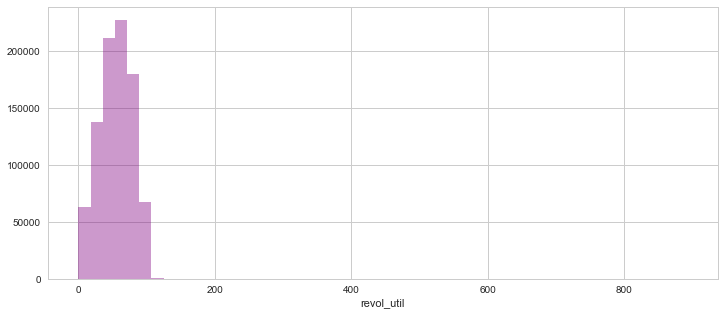

In [217]:
plt.figure(figsize=(12,5))
sns.distplot(data['revol_util'].dropna(), kde=False, color='purple')

Also this feature is highly sweked. I will investigate for outliers

##### capping revol_util at 181

In [218]:
# checking for extreme outliers
IQR_rutil = data['revol_util'].quantile(0.75)-data['revol_util'].quantile(0.25)
up_bound_rutil = data['revol_util'].quantile(0.75)+(3*IQR_rutil)
low_bound_rutil = data['revol_util'].quantile(0.25)-(3*IQR_rutil)
print('upper boundary for outliers: ',up_bound_rutil)
print('lower boundary for outliers: ',low_bound_rutil)

upper boundary for outliers:  181.29999999999995
lower boundary for outliers:  -69.99999999999997


In [219]:
# checking number of samples above 181
n_outl_rutil = len(data[data['revol_util'] > 181])
perc_outl_rutil = (n_outl_rutil/new_n_records)*100
print('The number of customers with revovling balance above 181 is: ', n_outl_rutil)
print('The percentage of customers with revolving balance above 181 is: ', perc_outl_rutil)

The number of customers with revovling balance above 181 is:  5
The percentage of customers with revolving balance above 181 is:  0.000563460912153063


In [220]:
# check how many of this samples are in the bad loan category
n_outlrutil_bad = data[(data['revol_util'] > 181) & (data['loan_target'] == 1)].count()['revol_util']
n_outlrutil_good = data[(data['revol_util'] > 181) & (data['loan_target'] == 0)].count()['revol_util']
print('Number of samples > 181 in the bad loan category: ', n_outlrutil_bad)
print('Number of samples > 181 in the good loan category: ', n_outlrutil_good)

Number of samples > 181 in the bad loan category:  1
Number of samples > 181 in the good loan category:  4


In [221]:
perc_outlrutil_inbad = (n_outlrutil_bad / len(data[data['loan_target']==1]))*100
perc_outlrutil_ingood = (n_outlrutil_good / len(data[data['loan_target']==0]))*100
print('Percentage of samples > 181 in the bad loan category: ', perc_outlrutil_inbad)
print('Percentage of samples > 181 in the good loan category: ', perc_outlrutil_ingood)

Percentage of samples > 181 in the bad loan category:  0.00148304142135
Percentage of samples > 181 in the good loan category:  0.000487838193828


There are only 5 customers with values above 181. This few outliers could be investigated to understand if such values are mistakes or to understand their source or proper correction.
For this project I'll just cap the value at 181.

In [222]:
# capping revol_util at 181
data['revol_util'] = np.where(data['revol_util'] > 181, 181, data['revol_util'])

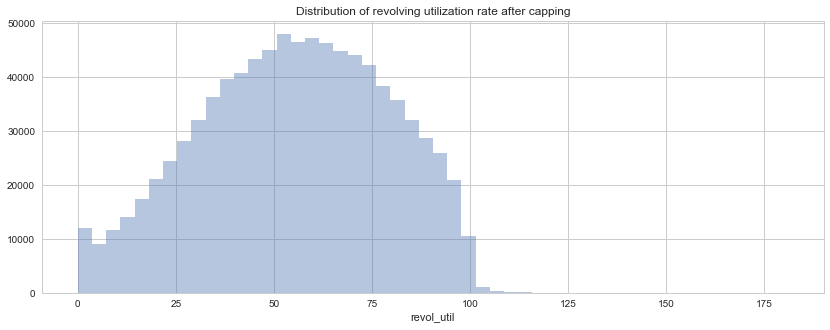

In [223]:
plt.figure(figsize=(14,5))
sns.distplot(data['revol_util'].dropna(), kde=False)
plt.title('Distribution of revolving utilization rate after capping')

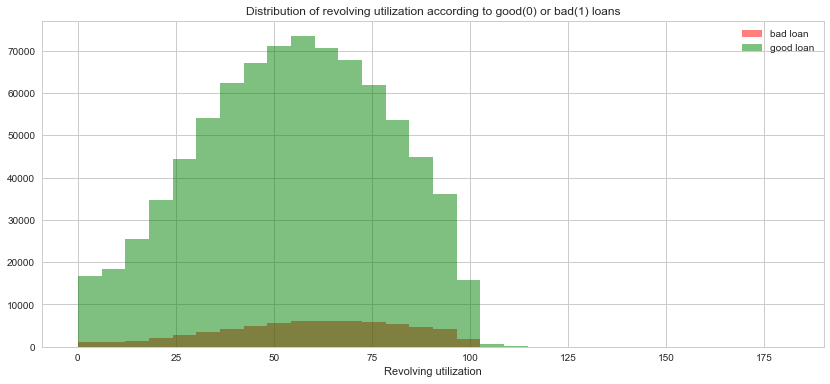

In [224]:
plt.figure(figsize=(14,6))
data[data['loan_target']==1]['revol_util'].hist(alpha=0.5, color='red', bins=30, label='bad loan')
data[data['loan_target']==0]['revol_util'].hist(alpha=0.5, color='green', bins=30, label='good loan')
plt.legend()
plt.xlabel('Revolving utilization')
plt.title('Distribution of revolving utilization according to good(0) or bad(1) loans')

The plot seems more Gaussian after the capping. There are still only few samples with values above 100, so maybe even an harsher cut could have been applied.
Most of the revolving utilization values are around 55-60. The peak for bad loans is around the same values but maybe broader, spreading up to the 70-75 range.


#### total_acc

This is a numerical feature with some missing values

In [225]:
print('total_acc: ', data_dictionary.iloc[51][1])

total_acc:  The total number of credit lines currently in the borrower's credit file


In [226]:
# top 10 most common values
data['total_acc'].value_counts().head(10)

22.0    32259
20.0    32117
21.0    32009
19.0    31574
23.0    31315
18.0    31108
24.0    31039
17.0    30768
25.0    29721
16.0    29126
Name: total_acc, dtype: int64

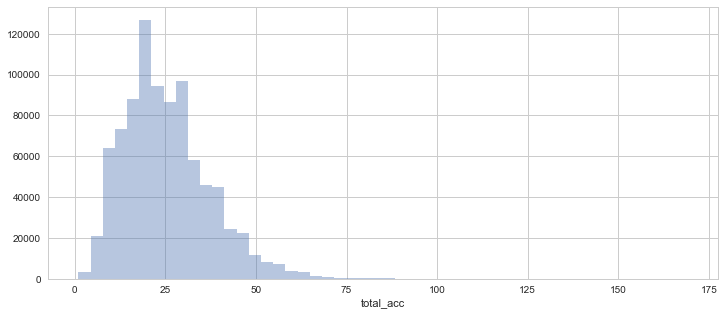

In [227]:
plt.figure(figsize=(12,5))
sns.distplot(data['total_acc'].dropna(), kde=False)

The plot shows a peak around 15. There are only a few samples from 75 onwards. I'll investigate for outliers

##### capping feature at 77

In [228]:
# checking for extreme outliers
IQR_tacc = data['total_acc'].quantile(0.75)-data['total_acc'].quantile(0.25)
up_bound_tacc = data['total_acc'].quantile(0.75)+(3*IQR_tacc)
low_bound_tacc = data['total_acc'].quantile(0.25)-(3*IQR_tacc)
print('upper boundary for outliers: ',up_bound_tacc)
print('lower boundary for outliers: ',low_bound_tacc)

upper boundary for outliers:  77.0
lower boundary for outliers:  -28.0


In [229]:
# checking number of samples above 77
n_outl_tacc = len(data[data['total_acc'] > 77])
perc_outl_tacc = (n_outl_tacc/new_n_records)*100
print('The number of customers with total account above 77 is: ', n_outl_tacc)
print('The percentage of customers with total account above 77 is: ', perc_outl_tacc)

The number of customers with total account above 77 is:  893
The percentage of customers with total account above 77 is:  0.10063411891053704


In [230]:
# check how many of this samples are in the bad loan category
n_outltacc_bad = data[(data['total_acc'] > 77) & (data['loan_target'] == 1)].count()['total_acc']
n_outltacc_good = data[(data['total_acc'] > 77) & (data['loan_target'] == 0)].count()['total_acc']
print('Number of samples > 77 in the bad loan category: ', n_outltacc_bad)
print('Number of samples > 77 in the good loan category: ', n_outltacc_good)

Number of samples > 77 in the bad loan category:  54
Number of samples > 77 in the good loan category:  839


In [231]:
perc_outltacc_inbad = (n_outltacc_bad / len(data[data['loan_target']==1]))*100
perc_outltacc_ingood = (n_outltacc_good / len(data[data['loan_target']==0]))*100
print('Percentage of samples > 77 in the bad loan category: ', perc_outltacc_inbad)
print('Percentage of samples > 77 in the good loan category: ', perc_outltacc_ingood)

Percentage of samples > 77 in the bad loan category:  0.0800842367527
Percentage of samples > 77 in the good loan category:  0.102324061155


There are only few samples above the extreme outlier value of 77 (less than 1% of all customers).  There is no signifant difference in distribution between bad/good loans in terms of %.
More investigation would be require to understand the meaning and source of these outliers.
For this project I'll cap the value at 77.

In [232]:
# capping total_acc at 77
data['total_acc'] = np.where(data['total_acc'] > 77, 77, data['total_acc'])

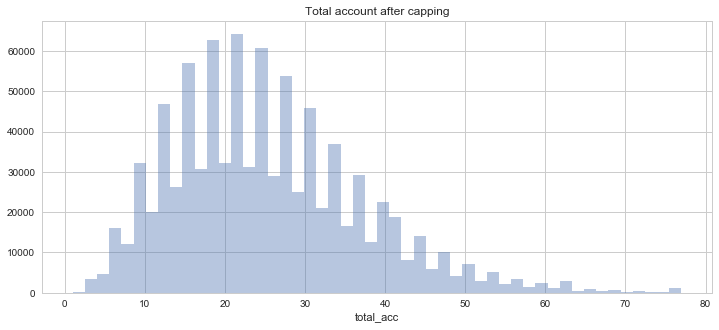

In [233]:
plt.figure(figsize=(12,5))
sns.distplot(data['total_acc'].dropna(), kde=False)
plt.title('Total account after capping')

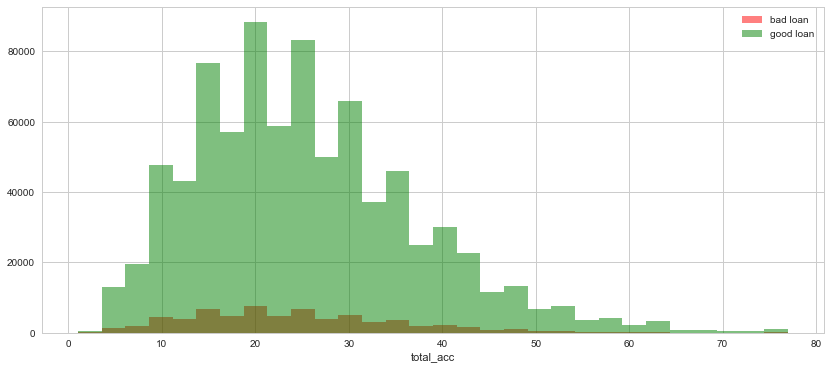

In [234]:
plt.figure(figsize=(14,6))
data[data['loan_target']==1]['total_acc'].hist(alpha=0.5, color='red', bins=30, label='bad loan')
data[data['loan_target']==0]['total_acc'].hist(alpha=0.5, color='green', bins=30, label='good loan')
plt.legend()
plt.xlabel('total_acc')

The distribution of total account is now approximately Gaussian. Some value bins appear more common then otthers in an alternating way. The shape of the distibution for good and bad loans is the same and both have a peak around 20.

#### initial_list_status

This feature is categorical with no missing values.
As seen below there are only two categories ('f'=fractional and 'w'=whole), split almost in half among the dataset.
The categories will have to be converted to numerical (using map or hot-encoding dropping a column as there are only two categories)

In [235]:
print('initial_list_status: ', data_dictionary.iloc[20][1])

initial_list_status:  The initial listing status of the loan. Possible values are – W, F


In [236]:
data['initial_list_status'].value_counts()

f    456843
w    430530
Name: initial_list_status, dtype: int64

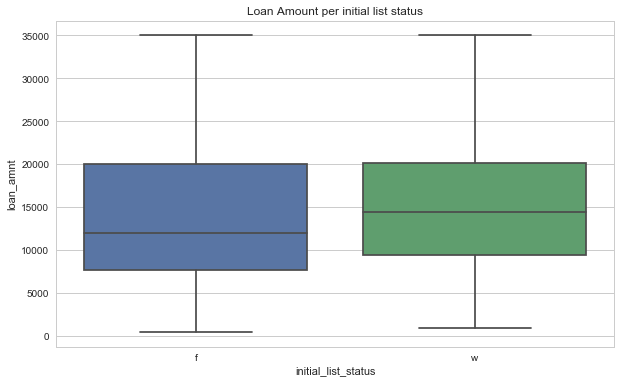

In [237]:
plt.figure(figsize=(10,6))

sns.boxplot(x='initial_list_status', y='loan_amnt', data=data)
plt.title('Loan Amount per initial list status')

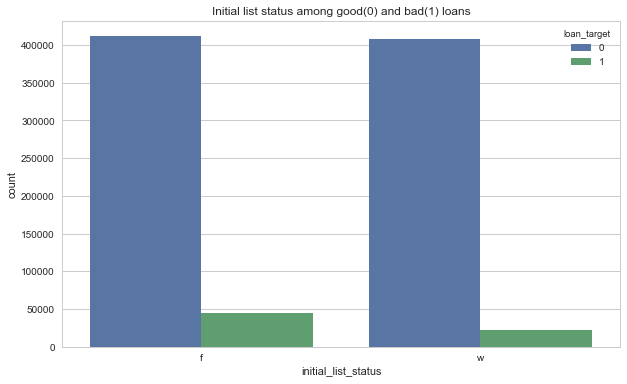

In [238]:
plt.figure(figsize=(10,6))

sns.countplot(x='initial_list_status', hue='loan_target', data=data)
plt.title('Initial list status among good(0) and bad(1) loans')

There seems to be an approximate equal distribution of the customers between f and w categories.

From the countplot above, there seems to be a higher percentage of bad loans in category f.

#### out_prncp, out_prncp_inv

These two features are numerical with no missing values

In [239]:
print('out_prncp: ', data_dictionary.iloc[40][1])
print('out_prncp_inv: ', data_dictionary.iloc[41][1])

out_prncp:  Remaining outstanding principal for portion of total amount funded by investors
out_prncp_inv:  publicly available policy_code=1
new products not publicly available policy_code=2


In [240]:
# top 10 most common values
data['out_prncp'].value_counts().head(10)

0.0        255794
10000.0      1178
15000.0       981
12000.0       949
20000.0       936
35000.0       869
5000.0        667
24000.0       569
8000.0        554
6000.0        545
Name: out_prncp, dtype: int64

In [241]:
# top 10 most common values
data['out_prncp_inv'].value_counts().head(10)

0.0        255794
10000.0      1157
15000.0       947
12000.0       914
20000.0       877
35000.0       722
5000.0        663
8000.0        547
6000.0        540
24000.0       529
Name: out_prncp_inv, dtype: int64

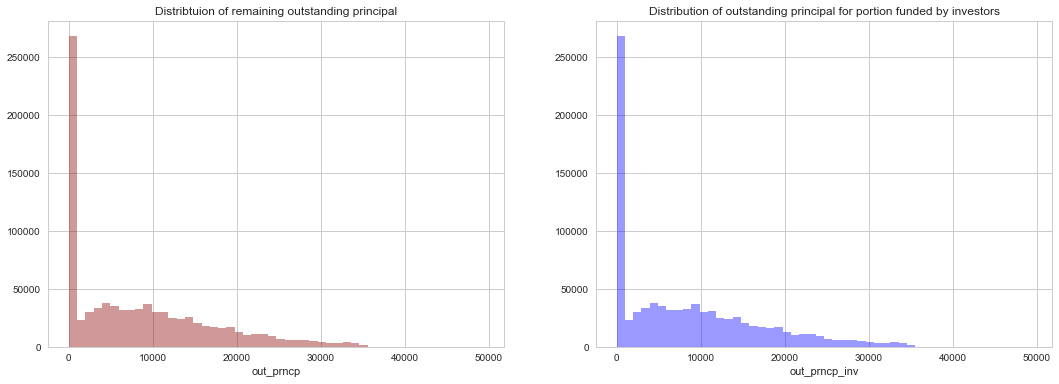

In [242]:
# Plot the distribution
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 2, figsize=(18,6))

sns.distplot(data['out_prncp'], ax=ax[0], color='darkred', kde=False)
ax[0].set_title('Distribtuion of remaining outstanding principal')

sns.distplot(data['out_prncp_inv'], ax=ax[1], color='blue', kde=False)
ax[1].set_title('Distribution of outstanding principal for portion funded by investors')

The distribution plots for 'out_prncp' and 'out_prncp_inv' look the same.
The values tend to be mainly around 0, but there is also a significant number of customers with much larger values.
In the pre-processing section I will tranform this feature to have a more normalised distribution.

In [243]:
data[['out_prncp','out_prncp_inv']].corr()

,out_prncp,out_prncp_inv
out_prncp,1.000000,0.999997
out_prncp_inv,0.999997,1.000000


The correlation values confirm that these tow features are very similar (correlation approx 0.99). Therefore, one of the two will be dropped when analysing correlation matrix later on to avoid multi-collinearity.

#### total_pymnt', 'total_pymnt_inv'

These two features are numerical and have no missing values

In [244]:
print('total_pymnt: ', data_dictionary.iloc[52][1])
print('total_pymnt_inv: ', data_dictionary.iloc[53][1])

total_pymnt:  Payments received to date for total amount funded
total_pymnt_inv:  Payments received to date for portion of total amount funded by investors


In [245]:
data['total_pymnt'].value_counts().head()

0.00       17759
648.57       135
938.06       134
623.86       131
6743.73      117
Name: total_pymnt, dtype: int64

In [246]:
data['total_pymnt_inv'].value_counts().head()

0.00       18036
648.57       131
938.06       129
623.86       119
1566.46      114
Name: total_pymnt_inv, dtype: int64

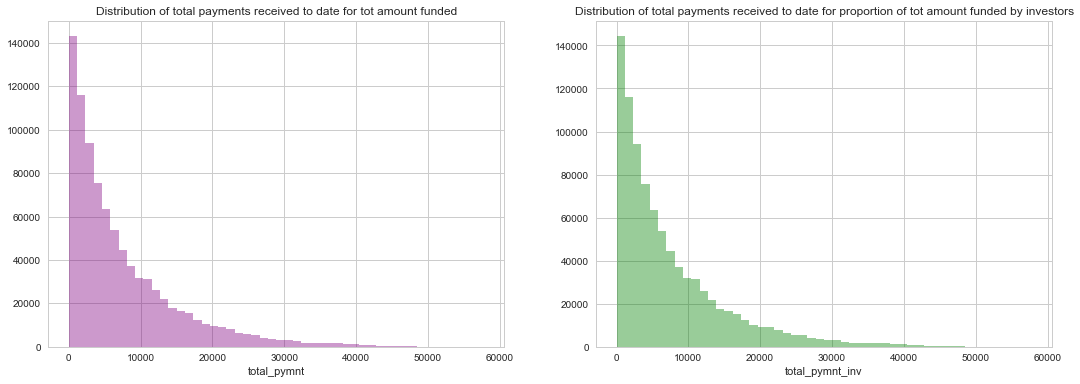

In [247]:
# Plot the distribution
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 2, figsize=(18,6))

sns.distplot(data['total_pymnt'], ax=ax[0], color='purple', kde=False)
ax[0].set_title('Distribution of total payments received to date for tot amount funded')

sns.distplot(data['total_pymnt_inv'], ax=ax[1], color='green', kde=False)
ax[1].set_title('Distribution of total payments received to date for proportion of tot amount funded by investors' )

In [248]:
data[['total_pymnt','total_pymnt_inv']].corr()

,total_pymnt,total_pymnt_inv
total_pymnt,1.000000,0.997593
total_pymnt_inv,0.997593,1.000000


From the plots above and the correlation values (approx 0.99), we can see that these two features are very similar. Therefore, one of the two will be dropped when analysing correlation matrix later on to avoid multi-collinearity.
Most values lie around 0. The number of customers decrease with increasing total amount.
I'll check for outliers as only a few samples must be present in the range above 40000.

##### capping features at 36723

In [249]:
# checking for extreme outliers
IQR_totpym = data['total_pymnt'].quantile(0.75)-data['total_pymnt'].quantile(0.25)
up_bound_totpym = data['total_pymnt'].quantile(0.75)+(3*IQR_totpym)
low_bound_totpym = data['total_pymnt'].quantile(0.25)-(3*IQR_totpym)
print('upper boundary for outliers: ',up_bound_totpym)
print('lower boundary for outliers: ',low_bound_totpym)

upper boundary for outliers:  36723.71000000001
lower boundary for outliers:  -24192.250000000004


In [250]:
# checking number of samples above 36723
n_outl_totpym = len(data[data['total_pymnt'] > 36723])
perc_outl_totpym = (n_outl_totpym/new_n_records)*100
print('The number of customers with total payment above 36723 is: ', n_outl_totpym)
print('The percentage of customers with total payment above 36723 is: ', perc_outl_totpym)

The number of customers with total payment above 36723 is:  8667
The percentage of customers with total payment above 36723 is:  0.9767031451261194


In [251]:
# check how many of this samples are in the bad loan category
n_outltotpym_bad = data[(data['total_pymnt'] > 36723) & (data['loan_target'] == 1)].count()['total_pymnt']
n_outltotpym_good = data[(data['total_pymnt'] > 36723) & (data['loan_target'] == 0)].count()['total_pymnt']
print('Number of samples > 36723 in the bad loan category: ', n_outltotpym_bad)
print('Number of samples > 36723 in the good loan category: ', n_outltotpym_good)

Number of samples > 36723 in the bad loan category:  107
Number of samples > 36723 in the good loan category:  8560


In [252]:
perc_outltotpym_inbad = (n_outltotpym_bad / len(data[data['loan_target']==1]))*100
perc_outltotpym_ingood = (n_outltotpym_good / len(data[data['loan_target']==0]))*100
print('Percentage of samples > 36723 in the bad loan category: ', perc_outltotpym_inbad)
print('Percentage of samples > 36723 in the good loan category: ', perc_outltotpym_ingood)

Percentage of samples > 36723 in the bad loan category:  0.158685432084
Percentage of samples > 36723 in the good loan category:  1.04397373479


Only 1% of the customers have 'total_pymnt' above the extreme outlier threshold of 36723. These values are not particularly related to bad loans. More investigation would be requiere to understand the origin and the source of this anoumalous values.
For this project I am just going to cap both these two features to 36723.

In [253]:
# capping both features at 36723
data['total_pymnt'] = np.where(data['total_pymnt'] > 36723, 36723, data['total_pymnt'])

In [254]:
data['total_pymnt_inv'] = np.where(data['total_pymnt_inv'] > 36723, 36723, data['total_pymnt_inv'])

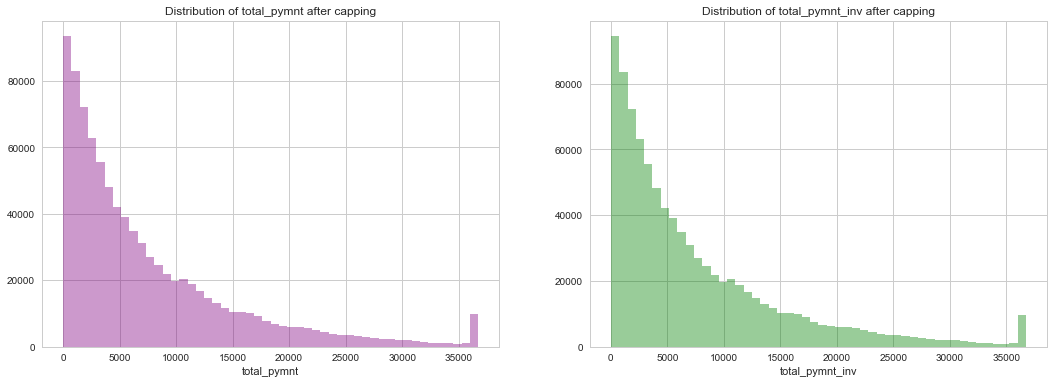

In [255]:
# Plot the distribution
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 2, figsize=(18,6))

sns.distplot(data['total_pymnt'], ax=ax[0], color='purple', kde=False)
ax[0].set_title('Distribution of total_pymnt after capping')

sns.distplot(data['total_pymnt_inv'], ax=ax[1], color='green', kde=False)
ax[1].set_title('Distribution of total_pymnt_inv after capping' )

As also before capping, the distribution is concentrated towards 0. The number of customers decrease from there at increasign amount of payment.

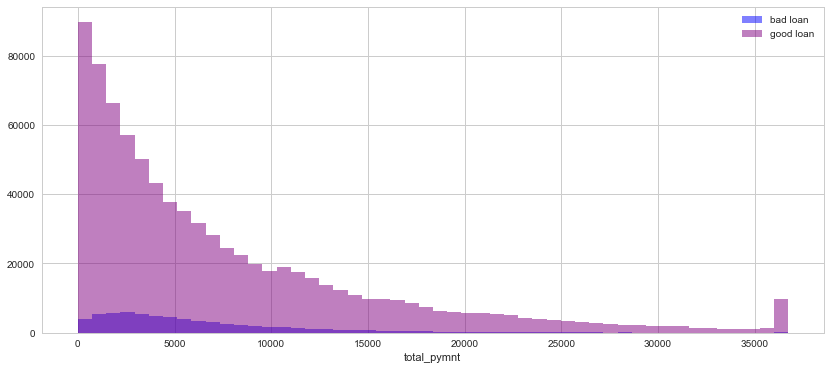

In [256]:
plt.figure(figsize=(14,6))
data[data['loan_target']==1]['total_pymnt'].hist(alpha=0.5, color='blue', bins=50, label='bad loan')
data[data['loan_target']==0]['total_pymnt'].hist(alpha=0.5, color='purple', bins=50, label='good loan')
plt.legend()
plt.xlabel('total_pymnt')

Contrary then for good loans, the peak for customers with bad loans is shifted towards values higher than 0, around 2000.

#### total_rec_prncp, total_rec_int, total_rec_late_fee

These three features are numerical and have no missing values.

In [257]:
print('total_rec_prncp: ', data_dictionary.iloc[56][1])
print('total_rec_int: ', data_dictionary.iloc[54][1])
print('total_rec_late_fee: ', data_dictionary.iloc[55][1])

total_rec_prncp:  Principal received to date
total_rec_int:  Interest received to date
total_rec_late_fee:  Late fees received to date


In [258]:
# top 10 most common values
data['total_rec_prncp'].value_counts().head(10)

0.0        18145
10000.0    14688
12000.0    11589
15000.0     9674
20000.0     8728
8000.0      7238
6000.0      7233
5000.0      6727
35000.0     6014
16000.0     4925
Name: total_rec_prncp, dtype: int64

In [259]:
# top 10 most common values
data['total_rec_int'].value_counts().head(10)

0.00      18214
82.76       138
174.90      125
71.33       124
283.29      119
41.37       113
130.12      112
451.32      108
194.92      108
258.02      108
Name: total_rec_int, dtype: int64

In [260]:
# top 10 most common values
data['total_rec_late_fee'].value_counts().head(10)

0.00     874856
15.00      2819
30.00       333
45.00        56
60.00        18
16.84        16
17.48        16
16.37        16
18.87        15
20.60        14
Name: total_rec_late_fee, dtype: int64

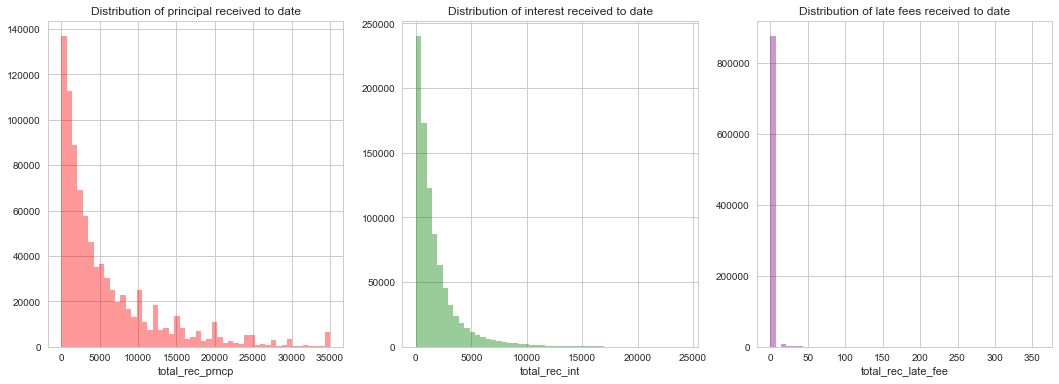

In [261]:
# Plot the distribution
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 3, figsize=(18,6))

sns.distplot(data['total_rec_prncp'], ax=ax[0], color='red', kde=False)
ax[0].set_title('Distribution of principal received to date')

sns.distplot(data['total_rec_int'], ax=ax[1], color='green', kde=False)
ax[1].set_title('Distribution of interest received to date' )

sns.distplot(data['total_rec_late_fee'], ax=ax[2], color='purple', kde=False)
ax[2].set_title('Distribution of late fees received to date' )

For all of the three features the distribution is focused towards 0.
For the first two plots distribution decreases with increasing of feature amount.
The plot on the left seems already capped at around 35000.
The central plot may have some outliers which I'll check for.
The third plot appears to have mainly only values equal to 0.

##### capping total_rec_int to 7630

In [262]:
# checking for extreme outliers for total_rec_int
IQR_recint = data['total_rec_int'].quantile(0.75)-data['total_rec_int'].quantile(0.25)
up_bound_recint = data['total_rec_int'].quantile(0.75)+(3*IQR_recint)
low_bound_recint = data['total_rec_int'].quantile(0.25)-(3*IQR_recint)
print('upper boundary for outliers: ',up_bound_recint)
print('lower boundary for outliers: ',low_bound_recint)

upper boundary for outliers:  7628.820000000001
lower boundary for outliers:  -4949.06


In [263]:
# checking number of samples above 7630
n_outl_recint = len(data[data['total_rec_int'] > 7630])
perc_outl_recint = (n_outl_recint/new_n_records)*100
print('The number of customers with interest received to date above 7630 is: ', n_outl_recint)
print('The percentage of customers with interest received to date above 7630 is: ', perc_outl_recint)

The number of customers with interest received to date above 7630 is:  23458
The percentage of customers with interest received to date above 7630 is:  2.643533215457311


In [264]:
# check how many of this samples are in the bad loan category
n_outlrecint_bad = data[(data['total_rec_int'] > 7630) & (data['loan_target'] == 1)].count()['total_rec_int']
n_outlrecint_good = data[(data['total_rec_int'] > 7630) & (data['loan_target'] == 0)].count()['total_rec_int']
print('Number of samples > 7630 in the bad loan category: ', n_outlrecint_bad)
print('Number of samples > 7630 in the good loan category: ', n_outlrecint_good)

Number of samples > 7630 in the bad loan category:  2776
Number of samples > 7630 in the good loan category:  20682


In [265]:
perc_outlrecint_inbad = (n_outlrecint_bad / len(data[data['loan_target']==1]))*100
perc_outlrecint_ingood = (n_outlrecint_good / len(data[data['loan_target']==0]))*100
print('Percentage of samples > 7630 in the bad loan category: ', perc_outlrecint_inbad)
print('Percentage of samples > 7630 in the good loan category: ', perc_outlrecint_ingood)

Percentage of samples > 7630 in the bad loan category:  4.11692298566
Percentage of samples > 7630 in the good loan category:  2.52236738119


Less than 3% of customers have a value of 'total_rec_int' above 7630. These high values are a bit more common for bad loans than good loans (4% of bad loans, 2.5% of good loans).
For this project I assume this outliers are not errors. I cap the feature at 7630

In [266]:
# capping  total_rec_int at 7630
data['total_rec_int'] = np.where(data['total_rec_int'] > 7630, 7630, data['total_rec_int'])

I will now look into 'total_rec_late_fee' as the plot seems domitated by values of 0

In [267]:
# top 10 most common values
data['total_rec_late_fee'].value_counts().head(10)

0.00     874856
15.00      2819
30.00       333
45.00        56
60.00        18
16.84        16
17.48        16
16.37        16
18.87        15
20.60        14
Name: total_rec_late_fee, dtype: int64

In [268]:
data[['total_rec_late_fee']].describe()

,total_rec_late_fee
count,887373.000000
mean,0.396694
std,4.087839
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,358.680000


In [269]:
len(data[data['total_rec_late_fee']>0])

12517

In [270]:
(len(data[data['total_rec_late_fee']>0])/new_n_records)*100

1.410568047483978

Only 1.4% of the data have a value different than 0 for this feature.

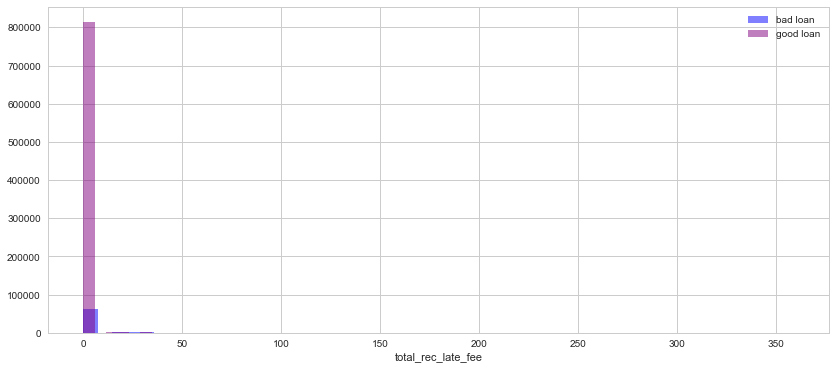

In [271]:
plt.figure(figsize=(14,6))
data[data['loan_target']==1]['total_rec_late_fee'].hist(alpha=0.5, color='blue', bins=50, label='bad loan')
data[data['loan_target']==0]['total_rec_late_fee'].hist(alpha=0.5, color='purple', bins=50, label='good loan')
plt.legend()
plt.xlabel('total_rec_late_fee')

I will drop this feature.

In [272]:
data.drop(labels =['total_rec_late_fee'], inplace=True, axis=1)

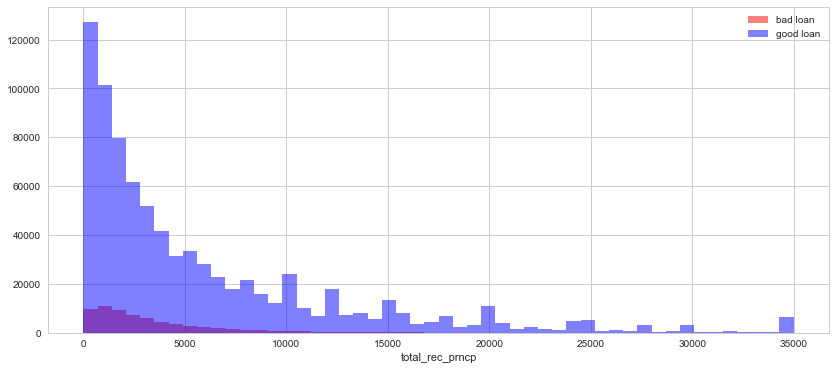

In [273]:
plt.figure(figsize=(14,6))
data[data['loan_target']==1]['total_rec_prncp'].hist(alpha=0.5, color='red', bins=50, label='bad loan')
data[data['loan_target']==0]['total_rec_prncp'].hist(alpha=0.5, color='blue', bins=50, label='good loan')
plt.legend()
plt.xlabel('total_rec_prncp')

The peak for bad loans is a bit shifted to values higher then 0 compared to good loans.

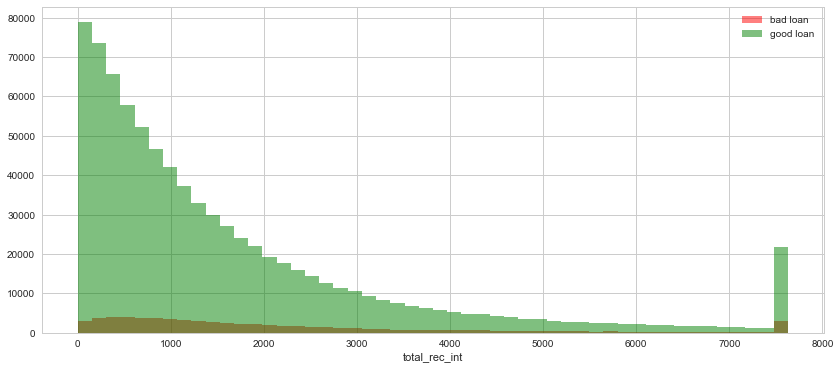

In [274]:
# looking at the relationship of the other two feature with target
plt.figure(figsize=(14,6))
data[data['loan_target']==1]['total_rec_int'].hist(alpha=0.5, color='red', bins=50, label='bad loan')
data[data['loan_target']==0]['total_rec_int'].hist(alpha=0.5, color='green', bins=50, label='good loan')
plt.legend()
plt.xlabel('total_rec_int')

The peak for bad loans is a bit shifted to values higher then 0 compared to good loans. Moreover, it seems that the precentage of bad loans is higher on high capped values.

#### recoveries, collection_recovery_fee

These features are numerical and have no missing values

In [275]:
print('recoveries: ', data_dictionary.iloc[45][1])
print('collection_recovery_fee: ', data_dictionary.iloc[4][1])

recoveries:  post charge off gross recovery
collection_recovery_fee:  post charge off collection fee


In [276]:
# top 10 most common values
data['recoveries'].value_counts().head(10)

0.00      862696
200.00        10
11.70          9
14.28          9
10.00          9
16.50          8
10.40          8
800.00         8
16.80          8
100.00         8
Name: recoveries, dtype: int64

In [277]:
# top 10 most common values
data['collection_recovery_fee'].value_counts().head(10)

0.00    863866
2.00        18
1.80        13
1.55        12
1.20        12
1.88        12
4.52        11
1.60        11
1.07        11
1.90        11
Name: collection_recovery_fee, dtype: int64

In [278]:
data[['recoveries', 'collection_recovery_fee']].describe()

,recoveries,collection_recovery_fee
count,887373.000000,887373.000000
mean,45.919554,4.880790
std,409.695241,63.125493
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,33520.270000,7002.190000


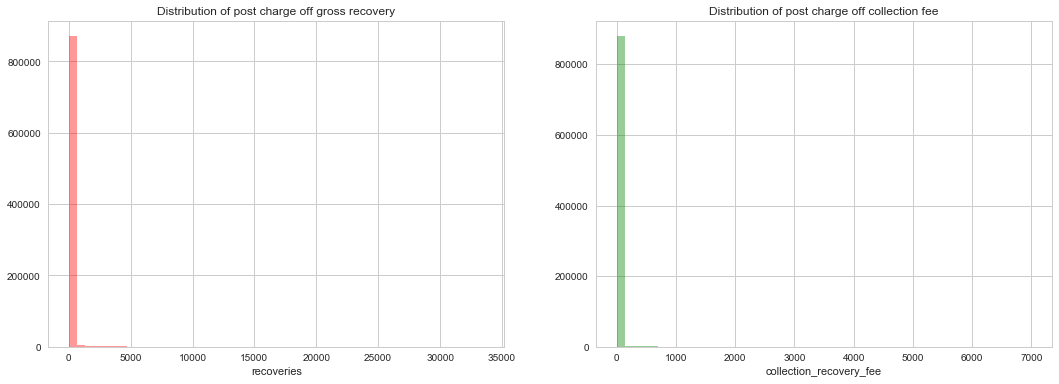

In [279]:
# Plot the distribution
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 2, figsize=(18,6))

sns.distplot(data['recoveries'], ax=ax[0], color='red', kde=False)
ax[0].set_title('Distribution of post charge off gross recovery')

sns.distplot(data['collection_recovery_fee'], ax=ax[1], color='green', kde=False)
ax[1].set_title('Distribution of post charge off collection fee' )

For both features most of the customers have a value of 0 for the feature.

In [280]:
# number of samples with value different than 0
len(data[data['recoveries']!=0])

24677

In [281]:
# percentage
(len(data[data['recoveries'] !=0])/new_n_records)*100

2.7809049858402273

In [282]:
# number of samples with value different than 0
len(data[data['collection_recovery_fee']!=0])

23507

In [283]:
# percentage
(len(data[data['collection_recovery_fee'] !=0])/new_n_records)*100

2.649055132396411

the percentage of samples with value different than 0 is <3%

In [284]:
# check how many of this samples are in the bad loan category
n_outlrecf_bad = data[(data['recoveries'] > 0) & (data['loan_target'] == 1)].count()['recoveries']
n_outlrecf_good = data[(data['recoveries'] > 0) & (data['loan_target'] == 0)].count()['recoveries']
print('Number of samples with recoveries > 0 in the bad loan category: ', n_outlrecf_bad)
print('Number of samples with recoveries > 0 in the good loan category: ', n_outlrecf_good)

Number of samples with recoveries > 0 in the bad loan category:  24677
Number of samples with recoveries > 0 in the good loan category:  0


In [285]:
# check how many of this samples are in the bad loan category
n_outlcorecf_bad = data[(data['collection_recovery_fee'] > 0) & (data['loan_target'] == 1)].count()['collection_recovery_fee']
n_outlcorecf_good = data[(data['collection_recovery_fee'] > 0) & (data['loan_target'] == 0)].count()['collection_recovery_fee']
print('Number of samples with collection_recovery_fee > 0 in the bad loan category: ', n_outlcorecf_bad)
print('Number of samples with collection_recovery_fee > 0 in the good loan category: ', n_outlcorecf_good)

Number of samples with collection_recovery_fee > 0 in the bad loan category:  23507
Number of samples with collection_recovery_fee > 0 in the good loan category:  0


All the samples with values different than 0 are in the bad loan category. Looking at their definition  they seem linked to definition of charged off.

In [286]:
# check how many of this samples are in the charged off category
n_outlrecf_off = data[(data['recoveries'] > 0) & (data['loan_status'] == 'Charged Off')].count()['recoveries']
print('Number of samples with recoveries > 0 in the cahrged off category: ', n_outlrecf_off)

Number of samples with recoveries > 0 in the cahrged off category:  24187


In [287]:
# check how many of this samples are in the charged off category
n_outlcorecf_off = data[(data['collection_recovery_fee'] > 0) & (data['loan_status'] == 'Charged Off')].count()['collection_recovery_fee']
print('Number of samples with collection_recovery_fee > 0 in the charged off category: ', n_outlcorecf_off)

Number of samples with collection_recovery_fee > 0 in the charged off category:  23035


These two features are based on a customer been in charge off status (otherwise there would not be recovery). So the value different than 0 basically define that the customer is in charge off and will be in the bad target category. As it basically implies the target, I believe they should be discarded.

In [288]:
data.drop(labels =['recoveries'], inplace=True, axis=1)

In [289]:
data.drop(labels =['collection_recovery_fee'], inplace=True, axis=1)

#### last_pymnt_d,  next_pymnt_d

These two features report dates (need to be parse with datetime). They have some missing values.
I have already a feature of the year of the loan. I don't think these two features separately will add useful information for the model. Maybe there can be some useful information in the difference in the interval between last and next payment (day of difference). I will check below.

In [290]:
print('last_pymnt_d: ', data_dictionary.iloc[30][1])
print('next_pymnt_d: ', data_dictionary.iloc[37][1])

last_pymnt_d:  Last month payment was received
next_pymnt_d:  Next scheduled payment date


In [291]:
data['last_pymnt_d'].value_counts().head(10)

Jan-2016    470148
Dec-2015    150861
Oct-2015     16000
Jul-2015     14483
Nov-2015     13981
Sep-2015     13834
Aug-2015     13040
Jun-2015     11983
Apr-2015     11107
May-2015     11069
Name: last_pymnt_d, dtype: int64

In [292]:
data['next_pymnt_d'].value_counts().head(10)

Feb-2016    553404
Jan-2016     78195
Mar-2011       107
Apr-2011       101
Feb-2011        91
Jan-2011        79
May-2011        77
Dec-2010        71
Mar-2016        68
Jun-2011        66
Name: next_pymnt_d, dtype: int64

##### Engineering a new feature 'diff_pymn_days' which is difference in days between next and last payment

In [293]:
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'])

In [294]:
data['next_pymnt_d'] = pd.to_datetime(data['next_pymnt_d'])

In [304]:
data['next_pymnt_d']

0               NaT
1               NaT
2               NaT
3               NaT
4        2016-02-01
5               NaT
6        2016-02-01
7               NaT
8               NaT
9               NaT
10              NaT
11              NaT
12              NaT
13              NaT
14              NaT
15              NaT
16              NaT
17              NaT
18              NaT
19              NaT
20              NaT
21              NaT
22              NaT
23              NaT
24              NaT
25              NaT
26              NaT
27              NaT
28              NaT
29              NaT
            ...    
887349   2016-02-01
887350   2016-02-01
887351          NaT
887352   2016-02-01
887353   2016-02-01
887354   2016-02-01
887355   2016-02-01
887356   2016-02-01
887357   2016-02-01
887358   2016-02-01
887359   2016-02-01
887360   2016-02-01
887361   2016-02-01
887362   2016-02-01
887363   2016-02-01
887364          NaT
887365   2016-02-01
887366          NaT
887367   2016-02-01


In [312]:
# calculate difference between next and last payment day, in days, as a new column
data['diff_pymn_days'] = data['next_pymnt_d'].subtract(data['last_pymnt_d'])

In [318]:
data['diff_pymn_days'].head(10)

0       NaT
1       NaT
2       NaT
3       NaT
4   31 days
5       NaT
6   31 days
7       NaT
8       NaT
9       NaT
Name: diff_pymn_days, dtype: timedelta64[ns]

In [ ]:
# i was initially calculating days of difference with a different code

# data['diff_pymn_days'] = (data['next_pymnt_d'] - data['last_pymnt_d']).dt.days

# but stopped working after I have done some updates installing SMOTE

In [319]:
#check
data[['next_pymnt_d','last_pymnt_d','diff_pymn_days']].head(10)

,next_pymnt_d,last_pymnt_d,diff_pymn_days
0,NaT,2015-01-01,NaT
1,NaT,2013-04-01,NaT
2,NaT,2014-06-01,NaT
3,NaT,2015-01-01,NaT
4,2016-02-01,2016-01-01,31 days
5,NaT,2015-01-01,NaT
6,2016-02-01,2016-01-01,31 days
7,NaT,2015-01-01,NaT
8,NaT,2012-04-01,NaT
9,NaT,2012-11-01,NaT


In [320]:
# drop original features
data.drop(labels =['next_pymnt_d'], inplace=True, axis=1)
data.drop(labels =['last_pymnt_d'], inplace=True, axis=1)

In [330]:
# converting timedelta difference in days to a float number representing days
# As my previous code is no longer working I need this extra code line
data['diff_pymn_days'] = data['diff_pymn_days'].astype('timedelta64[D]')

In [332]:
data['diff_pymn_days'].describe()

count    617270.000000
mean         36.170319
std          19.754697
min           0.000000
25%          31.000000
50%          31.000000
75%          31.000000
max         699.000000
Name: diff_pymn_days, dtype: float64

In [333]:
data['diff_pymn_days'].value_counts().head(10)

31.0     463190
62.0     105418
0.0       36848
92.0       3408
123.0      3042
153.0      2514
184.0      1013
30.0        518
61.0        395
122.0       345
Name: diff_pymn_days, dtype: int64

There seem to be many missing values, because there were many missing values in next_pymnt_d (around 20%).
Most of the payments are expected every 31 or 62 days. There are also many customers for which the value is 0 days (next paymnet day the same as the last one? maybe then was the last payment - This should be checked with the data provider).

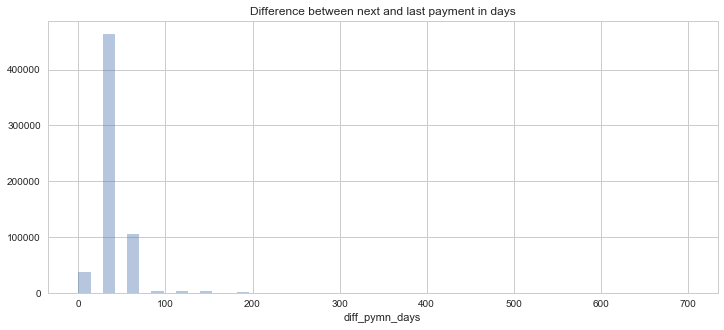

In [334]:
plt.figure(figsize=(12,5))
sns.distplot(data['diff_pymn_days'].dropna(), kde=False)
plt.title('Difference between next and last payment in days')

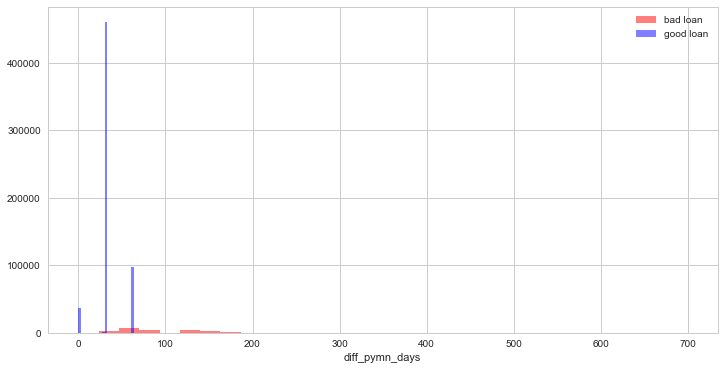

In [335]:
plt.figure(figsize=(12,6))
data[data['loan_target']==1]['diff_pymn_days'].hist(alpha=0.5, color='red', bins=30, label='bad loan')
data[data['loan_target']==0]['diff_pymn_days'].hist(alpha=0.5, color='blue', bins=30, label='good loan')
plt.legend()
plt.xlabel('diff_pymn_days')

##### capping it at 186 days

In [336]:
# considering the previous intervals of 31 and 62
# I will consider a value of 186 (31x6) as potential cap looking at the plot above

# checking number of samples above threshold
len(data[data['diff_pymn_days']>186])

168

In [337]:
# capping  the feature at 186
data['diff_pymn_days'] = np.where(data['diff_pymn_days'] > 186, 186, data['diff_pymn_days'])

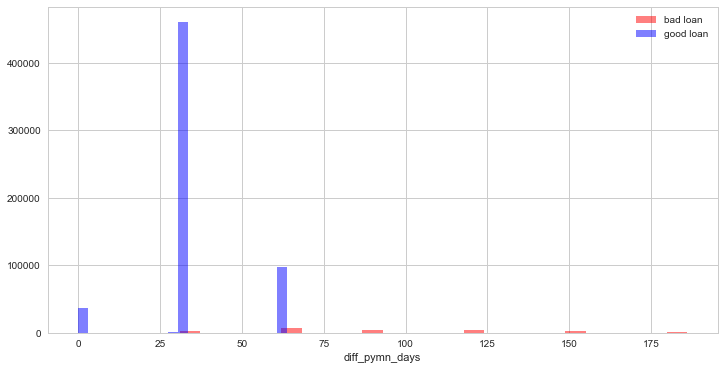

In [338]:
plt.figure(figsize=(12,6))
data[data['loan_target']==1]['diff_pymn_days'].hist(alpha=0.5, color='red', bins=30, label='bad loan')
data[data['loan_target']==0]['diff_pymn_days'].hist(alpha=0.5, color='blue', bins=30, label='good loan')
plt.legend()
plt.xlabel('diff_pymn_days')

Customers with bad loans tend to have more days of difference between the payments, while most of the customers with good loans have a next payment in 31 days. However, it needs to be remembered that this feature has many missing values (due to high % of missing values in the original next_pymnt_day)

#### last_pymnt_amnt

This feature is numerical with no missing values.

In [339]:
print('last_pymnt_amnt: ', data_dictionary.iloc[29][1])

last_pymnt_amnt:  Last total payment amount received


In [340]:
data['last_pymnt_amnt'].value_counts().head(10)

0.00      17673
327.34     2098
318.79     1791
312.86     1450
392.81     1402
491.01     1388
314.20     1319
382.55     1291
322.63     1269
478.19     1225
Name: last_pymnt_amnt, dtype: int64

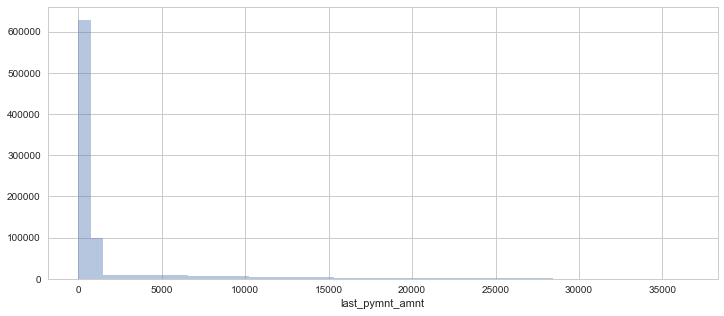

In [341]:
plt.figure(figsize=(12,5))
sns.distplot(data['last_pymnt_amnt'], kde=False)

Values tend to be towards 0. Few customers seem to have payments for example above 5000.
I will check for outliers.

In [342]:
# checking for extreme outliers for total_rec_int
IQR_lpa = data['last_pymnt_amnt'].quantile(0.75)-data['last_pymnt_amnt'].quantile(0.25)
up_bound_lpa = data['last_pymnt_amnt'].quantile(0.75)+(3*IQR_lpa)
low_bound_lpa = data['last_pymnt_amnt'].quantile(0.25)-(3*IQR_lpa)
print('upper boundary for outliers: ',up_bound_lpa)
print('lower boundary for outliers: ',low_bound_lpa)

upper boundary for outliers:  2484.49
lower boundary for outliers:  -1373.0699999999997


In [343]:
# checking number of samples above 2485
n_outl_lpa = len(data[data['last_pymnt_amnt'] > 2485])
perc_outl_lpa = (n_outl_lpa/new_n_records)*100
print('The number of customers with last payment above 2485 is: ', n_outl_lpa)
print('The percentage of customers with last payment above 2485 is: ', perc_outl_lpa)

The number of customers with last payment above 2485 is:  145946
The percentage of customers with last payment above 2485 is:  16.44697325701819


In [344]:
# check how many of this samples are in the bad loan category
n_outllpa_bad = data[(data['last_pymnt_amnt'] > 2485) & (data['loan_target'] == 1)].count()['last_pymnt_amnt']
n_outllpa_good = data[(data['last_pymnt_amnt'] > 2485) & (data['loan_target'] == 0)].count()['last_pymnt_amnt']
print('Number of samples > 2485 in the bad loan category: ', n_outllpa_bad)
print('Number of samples > 2485 in the good loan category: ', n_outllpa_good)

Number of samples > 2485 in the bad loan category:  247
Number of samples > 2485 in the good loan category:  145699


In [345]:
perc_outllpa_inbad = (n_outllpa_bad / len(data[data['loan_target']==1]))*100
perc_outllpa_ingood = (n_outllpa_good / len(data[data['loan_target']==0]))*100
print('Percentage of samples > 2485 in the bad loan category: ', perc_outllpa_inbad)
print('Percentage of samples > 2485 in the good loan category: ', perc_outllpa_ingood)

Percentage of samples > 2485 in the bad loan category:  0.366311231073
Percentage of samples > 2485 in the good loan category:  17.7693842506


There is a realtively high percentage (17%) of customers with last payment above extreme outlier threshold and most of them are in the good loan category. When I tried to cap the feature at this value, then the distribution plot had an isolated peak at that value which was higher than the one for the rest of distribution.

As the number of customers with very high values of last paymnet amount is still significant, I will instead transform this skewed feature in a more continuous one at pre-processing stage.

#### last_credit_pull_d

This is a categorical feature with some missing values

In [346]:
print('last_credit_pull_d: ', data_dictionary.iloc[26][1])

last_credit_pull_d:  The most recent month LC pulled credit for this loan


In [347]:
data['last_credit_pull_d'].value_counts().head()

Jan-2016    730572
Dec-2015     19308
Nov-2015     11490
Oct-2015     10419
Sep-2015     10087
Name: last_credit_pull_d, dtype: int64

As there are dates in this variable, I should use Pandas datetime to parse the feature. However, I am not going to use this feature for this project. It may be of additional value for the model if compared with other dates, for example last payment day. Something to consider eventually for future changes to the project.

In [348]:
data.drop(labels =['last_credit_pull_d'], inplace=True, axis=1)

#### collections_12_mths_ex_med

This is a numerical feature with some missing values.

In [349]:
print('collections_12_mths_ex_med: ', data_dictionary.iloc[5][1])

collections_12_mths_ex_med:  Number of collections in 12 months excluding medical collections


In [350]:
data['collections_12_mths_ex_med'].value_counts().head(10)

0.0     875551
1.0      10824
2.0        732
3.0         88
4.0         23
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [351]:
data[['collections_12_mths_ex_med']].describe()

,collections_12_mths_ex_med
count,887232.000000
mean,0.014380
std,0.134191
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,20.000000


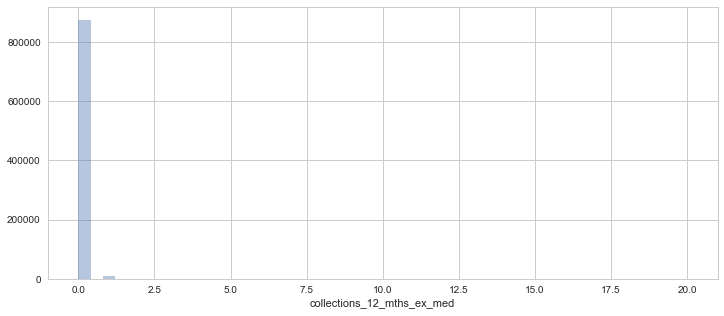

In [352]:
plt.figure(figsize=(12,5))
sns.distplot(data['collections_12_mths_ex_med'].dropna(), kde=False)

The range of values is between 0 and 20. Most of the customers have a value of 0 collections, followed by 1. Higher values become rare.

#### policy_code

This feature is numerical with no missing values. However, as shown below, all the customers have the same value of 1. Therefore it will not add information for the model and will be dropped.

In [353]:
print('policy_code: ', data_dictionary.iloc[41][1])

policy_code:  publicly available policy_code=1
new products not publicly available policy_code=2


In [354]:
data['policy_code'].value_counts()

1.0    887373
Name: policy_code, dtype: int64

In [355]:
data.drop(labels =['policy_code'], inplace=True, axis=1)

#### application_type

This feature is categorical with no missing values. As it is categorical it will need to be transformed to numerical for
the machine learning algorithm. As shown below the feature has only two categories ('INDIVIDUAL' and 'JOIN'). Therefore in the pre-processing stage I can either map it to 0 and 1 or hot-encode dropping one column.

In [356]:
print('application_type: ', data_dictionary.iloc[3][1])

application_type:  Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [357]:
data['application_type'].value_counts()

INDIVIDUAL    886864
JOINT            509
Name: application_type, dtype: int64

The number of customers in the category join is however very low.

#### acc_now_delinq

This feature is numerical with some missing values.

In [358]:
print('acc_now_delinq: ', data_dictionary.iloc[75][1])

acc_now_delinq:  The number of accounts on which the borrower is now delinquent.


In [359]:
data['acc_now_delinq'].value_counts().head(10)

0.0     883234
1.0       3866
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

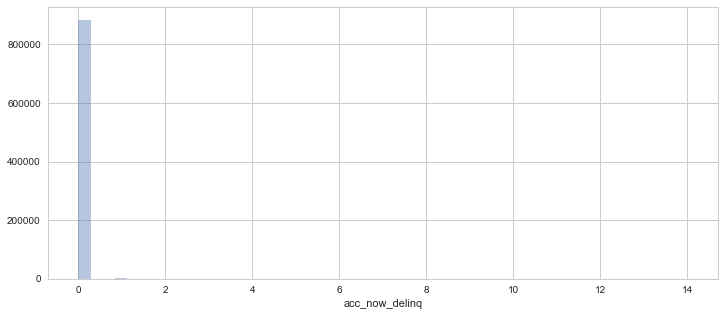

In [360]:
plt.figure(figsize=(12,5))
sns.distplot(data['acc_now_delinq'].dropna(), kde=False)

The number of accounts on which the customers in the dataset are delinquent ranges between 0 and 14. Almost all customers have 0 accounts on which they are now delinquent. There is a small percentage (less than 1%) of customeres with 1 account and only a few customers with more than 1 account.

#### tot_coll_amt

This feature is numerical with some missing values

In [361]:
print('tot_coll_amt: ', data_dictionary.iloc[76][1])

tot_coll_amt:  Total collection amounts ever owed


In [362]:
# checking most common values
data['tot_coll_amt'].value_counts().head(10)

0.0      700944
50.0       1755
100.0      1357
75.0       1044
200.0       714
150.0       702
60.0        693
70.0        616
80.0        596
55.0        536
Name: tot_coll_amt, dtype: int64

In [363]:
# checking most common values
data['tot_coll_amt'].value_counts().tail(10)

25279.0    1
11948.0    1
13155.0    1
5411.0     1
13159.0    1
21651.0    1
13165.0    1
6319.0     1
13169.0    1
8190.0     1
Name: tot_coll_amt, dtype: int64

In [364]:
data['tot_coll_amt'].max()

9152545.0

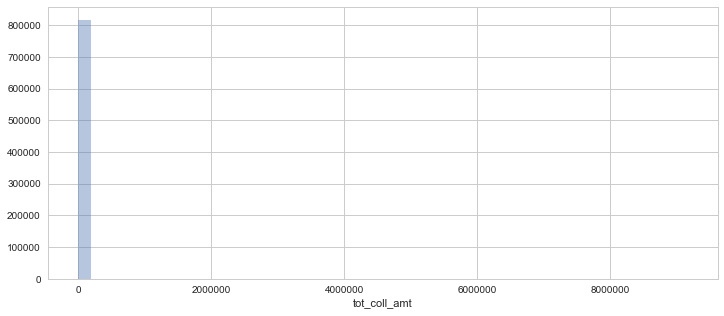

In [365]:
plt.figure(figsize=(12,5))
sns.distplot(data['tot_coll_amt'].dropna(), kde=False)
plt.ticklabel_format(style='plain', axis='x')

There seems to be a bad point, maybe just the max value seen above. If so, I will drop the sample with this value as luckly to be a mistake.

In [366]:
data[data['tot_coll_amt']>2000000]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_target,term_months,emp_years,issue_year,earl_crline_year,diff_pymn_days
416962,10800.0,10800.0,10800.0,15.31,376.03,C,MORTGAGE,122000.0,Verified,Fully Paid,other,9.1,0.0,1.0,8.0,0.0,4742.0,34.9,34.0,w,0.0,0.0,12894.15,12894.15,10799.99,2094.16,249.58,0.0,INDIVIDUAL,0.0,9152545.0,233924.0,13600.0,0,36.0,1.0,2014,2002.0,NaN


In [367]:
data.drop(416962, inplace=True)

In [368]:
new_n_records = data.shape[0]
print('The new number of records is now: ', new_n_records)

The new number of records is now:  887372


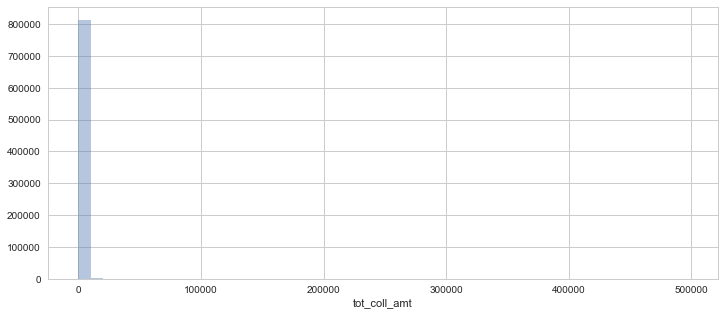

In [369]:
plt.figure(figsize=(12,5))
sns.distplot(data['tot_coll_amt'].dropna(), kde=False)
plt.ticklabel_format(style='plain', axis='x')

After eliminating the sample with an extremly high value, we still have a strongly skewed distribution. Most of the samples are around 0, but there are other values with very high total collection amounts.

Even when experimenting with capping values for example at 5000, the distribution looks skewed with most of the samples around 0 but showing that some higher values may have significance. Therefore I will transofrm this feature at pre-processing stage. 

#### tot_cur_bal

This is a numerical feature with some missing values.

In [370]:
print('tot_cur_bal: ', data_dictionary.iloc[77][1])

tot_cur_bal:  Total current balance of all accounts


In [371]:
# most common values
data['tot_cur_bal'].value_counts().head(10)

0.0        126
27316.0     21
22396.0     21
29232.0     21
34574.0     21
14511.0     20
19998.0     20
23269.0     19
12066.0     19
16777.0     19
Name: tot_cur_bal, dtype: int64

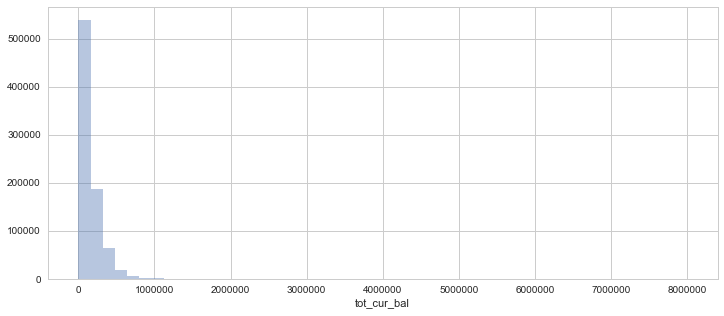

In [372]:
plt.figure(figsize=(12,5))
sns.distplot(data['tot_cur_bal'].dropna(), kde=False)
plt.ticklabel_format(style='plain', axis='x')

In [373]:
data['tot_cur_bal'].max()

8000078.0

In [374]:
len(data[data['tot_cur_bal'] > 100000])

373531

This feature appears highly skewed with more samples towards 0. However, higher values are still significant. This feature will be tranformed to a more continuos gaussian shape in pre-processing stage.

#### total_rev_hi_lim

This is a numerical feature with some missing values

In [375]:
print('total_rev_hi_lim: ', data_dictionary.iloc[71][1])

total_rev_hi_lim:  Total revolving high credit/credit limit


In [376]:
# most common values
data['total_rev_hi_lim'].value_counts().head(10)

15000.0    2650
10000.0    2633
13000.0    2619
12000.0    2613
13500.0    2596
14500.0    2593
11500.0    2557
12500.0    2543
14000.0    2529
16500.0    2526
Name: total_rev_hi_lim, dtype: int64

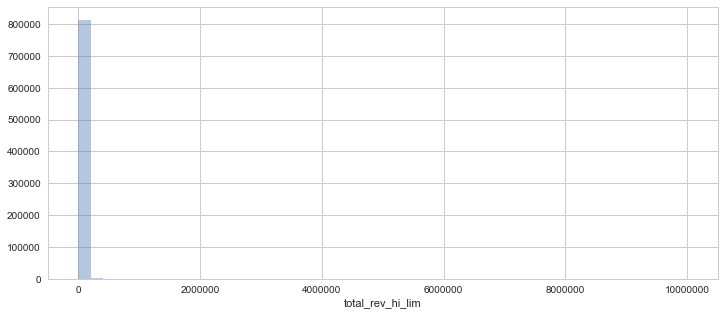

In [377]:
plt.figure(figsize=(12,5))
sns.distplot(data['total_rev_hi_lim'].dropna(), kde=False)
plt.ticklabel_format(style='plain', axis='x')

In [378]:
data['total_rev_hi_lim'].max()

9999999.0

In [379]:
len(data[data['total_rev_hi_lim'] > 10000])

700904

This feature appears highly skewed with more samples towards 0. However, higher values are still significant. This feature will be tranformed to a more continuos gaussian shape in pre-processing stage.

### Create copy of data at this stage

In [380]:
# As I have made some changes to my data in the Target and Feature Exploratoy section,
# I create a second version of the data and then work on that from here

data_v2 = data.copy(deep=True)

In [381]:
# Drop loan_status feature as I have engineered a new feature called loan_target instead

data_v2.drop(labels =['loan_status'], inplace=True, axis=1)

Data at this stage

In [382]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887372 entries, 0 to 887378
Data columns (total 38 columns):
loan_amnt                     887372 non-null float64
funded_amnt                   887372 non-null float64
funded_amnt_inv               887372 non-null float64
int_rate                      887372 non-null float64
installment                   887372 non-null float64
grade                         887372 non-null object
home_ownership                887372 non-null object
annual_inc                    887372 non-null float64
verification_status           887372 non-null object
purpose                       887372 non-null object
dti                           887372 non-null float64
delinq_2yrs                   887347 non-null float64
inq_last_6mths                887347 non-null float64
open_acc                      887347 non-null float64
pub_rec                       887347 non-null float64
revol_bal                     887372 non-null float64
revol_util                   

In [383]:
#checking the number of records and columns:
print ("The total number of records in the data at this stage is: {}".format(data_v2.shape[0]))
print ("The total number of columns in the data at this stage is: {}".format(data_v2.shape[1]))

The total number of records in the data at this stage is: 887372
The total number of columns in the data at this stage is: 38


In [384]:
# check missing values again.

# to obtain the percentage of the missing values per each feature, sorted from the heighest to lowest values
(data_v2.isnull().mean().sort_values(ascending=False)*100).head(20)

diff_pymn_days                30.438418
total_rev_hi_lim               7.919114
tot_coll_amt                   7.919114
tot_cur_bal                    7.919114
revol_util                     0.056121
collections_12_mths_ex_med     0.015890
open_acc                       0.002817
acc_now_delinq                 0.002817
total_acc                      0.002817
pub_rec                        0.002817
earl_crline_year               0.002817
inq_last_6mths                 0.002817
delinq_2yrs                    0.002817
dti                            0.000000
funded_amnt                    0.000000
installment                    0.000000
purpose                        0.000000
int_rate                       0.000000
annual_inc                     0.000000
home_ownership                 0.000000
dtype: float64

## Data Pre-processing

### Impute missing values

During data exploration I dropped the samples with missing values in annual_inc as they were only four, all in good loan category.

Here I will fill the missing values for the other features. 

As the feature 'diff_pymn_days' has approximately 30% of missing values, I will add a binary feature with value 1 when the value is missing in case it has some significance (not missing at random).

In [385]:
# flag for missing values in diff_pymn_days

data_v2['diff_pymn_d_null'] = np.where(data_v2['diff_pymn_days'].isnull(), 1, 0)

In [386]:
# checking how they relate with target

data_v2.groupby(['loan_target'])['diff_pymn_d_null'].mean()

loan_target
0    0.273751
1    0.676890
Name: diff_pymn_d_null, dtype: float64

The percentage of missing values for the customers with bad loans (67%) is higher than for the customers with good loans (27%). So it may be informative. The source of missingness (coming from feature next_pymn_d) should be checked with data providers/domain experts. So I will fill the values but keep also the flag binary column. For this project I will fill the missing values simply with the mode.

In [387]:
# filling missing values with mode
data_v2['diff_pymn_days'] = data_v2['diff_pymn_days'].fillna(data_v2['diff_pymn_days'].mode()[0])

In [388]:
# using mode also for the following features (due to the distibution noticed in the EDA section)
data_v2['total_rev_hi_lim'] = data_v2['total_rev_hi_lim'].fillna(data_v2['total_rev_hi_lim'].mode()[0])
data_v2['tot_coll_amt'] = data_v2['tot_coll_amt'].fillna(data_v2['tot_coll_amt'].mode()[0])
data_v2['collections_12_mths_ex_med'] = data_v2['collections_12_mths_ex_med'].fillna(data_v2['collections_12_mths_ex_med'].mode()[0])
data_v2['inq_last_6mths'] = data_v2['inq_last_6mths'].fillna(data_v2['inq_last_6mths'].mode()[0])
data_v2['delinq_2yrs'] = data_v2['delinq_2yrs'].fillna(data_v2['delinq_2yrs'].mode()[0])
data_v2['acc_now_delinq'] = data_v2['acc_now_delinq'].fillna(data_v2['acc_now_delinq'].mode()[0])
data_v2['pub_rec'] = data_v2['pub_rec'].fillna(data_v2['pub_rec'].mode()[0])
data_v2['tot_cur_bal'] = data_v2['tot_cur_bal'].fillna(data_v2['tot_cur_bal'].mode()[0])

In [389]:
# using median instead for the following
data_v2['revol_util'] = data_v2['revol_util'].fillna(data_v2['revol_util'].median())
data_v2['total_acc'] = data_v2['total_acc'].fillna(data_v2['total_acc'].median())
data_v2['earl_crline_year'] = data_v2['earl_crline_year'].fillna(data_v2['earl_crline_year'].median())
data_v2['open_acc'] = data_v2['open_acc'].fillna(data_v2['open_acc'].median())

In [390]:
# check
(data_v2.isnull().mean().sort_values(ascending=False)*100).head(5)

diff_pymn_d_null    0.0
purpose             0.0
revol_util          0.0
revol_bal           0.0
pub_rec             0.0
dtype: float64

In this section, all missing values have been filled with statistical mode or median. Also a flag for missing of diff_pymnt_days has been added.

### Dealing with Outliers

During EDA, looking at plots of the features I have identified some potential outliers. I have checked them using inter quantile values and then dealt with outliers generally capping the features.

### Transforming Skewed Continuous Features

In the exploratory data analysis section, I noticed that five features have most of the customers towards the very low numbers (around 0), but have also a significant number of much higher values. Here I am going to try a logarithmic transformation in order to obtain a more continuous distribution.

In [391]:
list_skewed = ['out_prncp', 'out_prncp_inv', 'last_pymnt_amnt', 'tot_coll_amt', 'total_rev_hi_lim','tot_cur_bal']

data_v2[list_skewed] = data_v2[list_skewed].apply(lambda x: np.log(x+1))

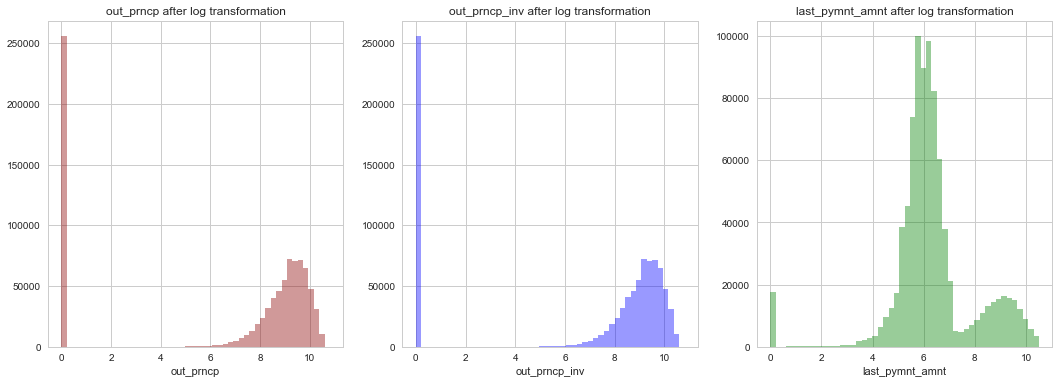

In [392]:
# check new data distrubtion:
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 3, figsize=(18,6))

sns.distplot(data_v2['out_prncp'], ax=ax[0], color='darkred', kde=False)
ax[0].set_title('out_prncp after log transformation')

sns.distplot(data_v2['out_prncp_inv'], ax=ax[1], color='blue', kde=False)
ax[1].set_title('out_prncp_inv after log transformation')

sns.distplot(data_v2['last_pymnt_amnt'], ax=ax[2], color='green', kde=False)
ax[2].set_title('last_pymnt_amnt after log transformation')


As previously observed, 'out_prncp' and 'out_prncp_inv' are very similar (I will check them again in the cross-correlation).
The distribution is now more concentrated in a smaller range with a more continuous distribution. 

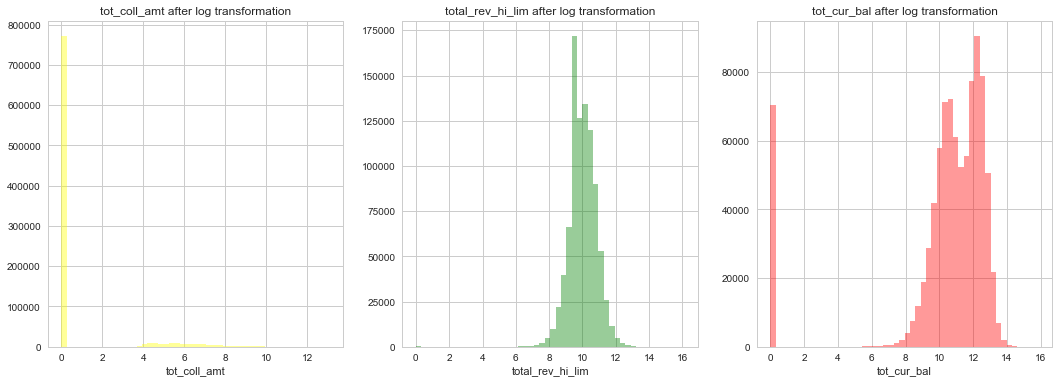

In [393]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 3, figsize=(18,6))

sns.distplot(data_v2['tot_coll_amt'], ax=ax[0], color='yellow', kde=False)
ax[0].set_title('tot_coll_amt after log transformation')

sns.distplot(data_v2['total_rev_hi_lim'], ax=ax[1], color='green', kde=False)
ax[1].set_title('total_rev_hi_lim after log transformation')

sns.distplot(data_v2['tot_cur_bal'], ax=ax[2], color='red', kde=False)
ax[2].set_title('tot_cur_bal after log transformation')

'tot_coll_amt' appears still skewed towards zero, but with better distribution. 'total_rev_hi_lim' and 'tot_cur_bal' have now a more continuous distribtution with peak around 9 and 12 respectively.

At this stage I can look again at the data statisctics for the numerica variables

In [394]:
data_v2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_target,term_months,emp_years,issue_year,earl_crline_year,diff_pymn_days,diff_pymn_d_null
count,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000,887372.000000
mean,14755.313724,14741.926638,14702.526637,13.246758,436.718318,73275.547359,18.131752,0.314432,0.694603,11.527850,0.194563,15790.964182,55.067169,25.257697,6.474223,6.473916,7517.837778,7481.186321,5757.710597,1682.699859,6.340021,0.014377,0.004991,0.790309,10.326537,10.016445,0.075987,43.201147,5.705216,2014.021790,1997.700232,34.573023,0.304384
std,8435.458566,8429.900657,8442.092805,4.381867,244.186610,39913.904097,8.305668,0.862233,0.998442,5.216978,0.551703,13394.233101,23.809434,11.785694,4.182437,4.182254,7698.945007,7677.586758,6625.459645,1777.448026,1.629794,0.134180,0.077624,2.102144,3.257858,0.804202,0.264978,10.998688,3.807003,1.261657,7.434012,16.284531,0.460146
min,500.000000,500.000000,0.000000,5.320000,15.670000,1200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,2007.000000,1944.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.710000,45000.000000,11.910000,0.000000,0.000000,8.000000,0.000000,6443.750000,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.775000,1200.570000,441.460000,5.638959,0.000000,0.000000,0.000000,10.050570,9.595671,0.000000,36.000000,2.000000,2013.000000,1994.000000,31.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,65000.000000,17.650000,0.000000,0.000000,11.000000,0.000000,11875.000000,56.000000,24.000000,8.773319,8.772934,4894.965000,4862.025000,3215.320000,1073.295000,6.139443,0.000000,0.000000,0.000000,11.087260,9.989711,0.000000,36.000000,6.000000,2014.000000,1999.000000,31.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,90000.000000,23.950000,0.000000,1.000000,14.000000,0.000000,20829.000000,73.600000,32.000000,9.522240,9.521865,10616.831346,10565.735000,8000.000000,2238.300000,6.724133,0.000000,0.000000,0.000000,12.184825,10.540091,0.000000,60.000000,10.000000,2015.000000,2003.000000,31.000000,1.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,225000.000000,60.000000,39.000000,33.000000,32.000000,10.000000,63987.000000,181.000000,77.000000,10.807176,10.807176,36723.000000,36723.000000,35000.030000,7630.000000,10.504426,20.000000,14.000000,13.115645,15.894962,16.118096,1.000000,60.000000,10.000000,2015.000000,2012.000000,186.000000,1.000000


### Dealing with categorical features

For machine learning algorithms features need to be in numerica form.

In the EDA I have already mapped the 'loan_target' column to binary form =0 for good loans and =1 for bad loans.
I also created a function to engineer the 'term' column to have numbers 36 or 60 (excluding the word months). Similarly I excluded word year/s and mathematical symbols in the column 'emp_length' which now has values between 0 and 10.
I used panda's datetime to engineer the feautures 'issue_year', 'earl_crline_year' and 'diff_pymn_days' from orignal columns which have been dropped.

At these stage there are still some categorical features, which I will map or hot-encode.

In [395]:
# The categorical variables are
cat_var = [v for v in data_v2.columns if data_v2[v].dtype=='O']
print('The number of categorical variables in the data is now: {}'.format(len(cat_var)))
print('They are: ', cat_var)

The number of categorical variables in the data is now: 6
They are:  ['grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']


As seen in the EDA section, 'application_type' has only two categories (INDIVIDUAL and JOINT). I will use map to create a new feature 'applic_joint' with value of =0 for individual category and =1 for joint category. Then I'll drop the original feature.

In [396]:
data_v2['application_type'].value_counts()

INDIVIDUAL    886863
JOINT            509
Name: application_type, dtype: int64

In [397]:
data_v2['applic_joint'] = data_v2['application_type'].map({'INDIVIDUAL':0, 'JOINT':1})

In [398]:
# check
data_v2['applic_joint'].value_counts()

0    886863
1       509
Name: applic_joint, dtype: int64

In [399]:
# drop original column
data_v2.drop(labels =['application_type'], inplace=True, axis=1)

I will use hot-encoding scheme for the other categorical features (with option drop first to avoid dummy trap).

In [400]:
data_v2 = pd.get_dummies(data_v2, columns = None, drop_first=True)

In [401]:
# checking data now
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887372 entries, 0 to 887378
Data columns (total 59 columns):
loan_amnt                              887372 non-null float64
funded_amnt                            887372 non-null float64
funded_amnt_inv                        887372 non-null float64
int_rate                               887372 non-null float64
installment                            887372 non-null float64
annual_inc                             887372 non-null float64
dti                                    887372 non-null float64
delinq_2yrs                            887372 non-null float64
inq_last_6mths                         887372 non-null float64
open_acc                               887372 non-null float64
pub_rec                                887372 non-null float64
revol_bal                              887372 non-null float64
revol_util                             887372 non-null float64
total_acc                              887372 non-null float64
out_prn

In [402]:
#checking the number of records and columns:
print ("The total number of records in the data at this stage is: {}".format(data_v2.shape[0]))
print ("The total number of columns in the data at this stage is: {}".format(data_v2.shape[1]))

The total number of records in the data at this stage is: 887372
The total number of columns in the data at this stage is: 59


The number of columns are hot-encoding has increased. We have now 59 columns in total.

### Correlations in the data (checking for multi-collinearity)

I am now going to check correlation between the features and also with the target. I will check features with high correlation to decide if need dropping to avoid multi-collinearity,

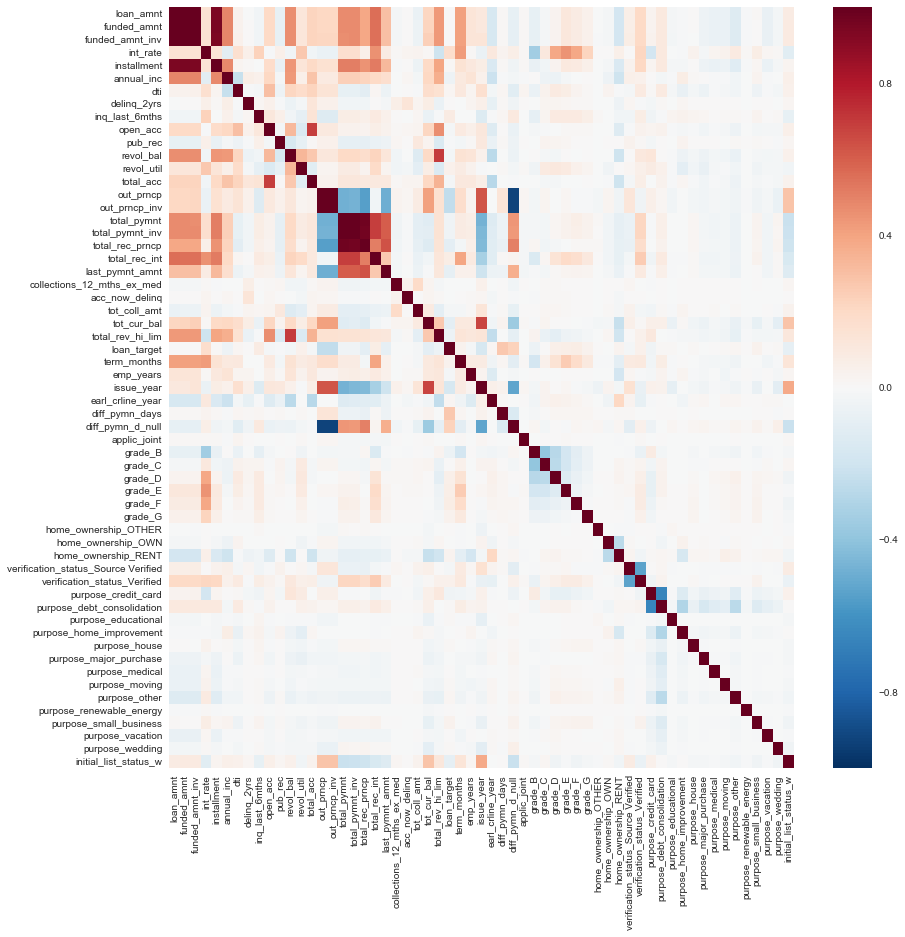

In [403]:
# correlation matrix, heatmap
plt.figure(figsize=(14,14))
sns.heatmap(data_v2.corr())

In EDA section I already noticed that plots for loan_amnt, funded_amnt, funded_amnt_inve seemed the same. In the above heatmap they clearly have a high correlation value.

In [404]:
# checking loan_amnt, funded_amnt, funded_amnt_inv
data_v2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.999263,0.997116
funded_amnt,0.999263,1.000000,0.998026
funded_amnt_inv,0.997116,0.998026,1.000000


In [405]:
data_v2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,887372.000000,887372.000000,887372.000000
mean,14755.313724,14741.926638,14702.526637
std,8435.458566,8429.900657,8442.092805
min,500.000000,500.000000,0.000000
25%,8000.000000,8000.000000,8000.000000
50%,13000.000000,13000.000000,13000.000000
75%,20000.000000,20000.000000,20000.000000
max,35000.000000,35000.000000,35000.000000


The correlation between these three features is very high (approx 0.99) and the statistical values in the table above are almost the same. I will keep only 'loan_amnt' and drop the other two.

In [406]:
data_v2.drop(labels =['funded_amnt','funded_amnt_inv'], inplace=True, axis=1)

In the EDA section I also noted that 'out_prncp_inv' seemed very similar to 'out_prncp', and 'total_pymnt_inv' to'total_pymnt'. Therefore I do the same check for those couple of features.

In [407]:
data_v2[['out_prncp', 'out_prncp_inv']].corr()

,out_prncp,out_prncp_inv
out_prncp,1.0,1.0
out_prncp_inv,1.0,1.0


In [408]:
data_v2[['total_pymnt', 'total_pymnt_inv']].corr()

,total_pymnt,total_pymnt_inv
total_pymnt,1.000000,0.997579
total_pymnt_inv,0.997579,1.000000


In [409]:
data_v2[['total_pymnt', 'total_pymnt_inv']].describe()

,total_pymnt,total_pymnt_inv
count,887372.000000,887372.000000
mean,7517.837778,7481.186321
std,7698.945007,7677.586758
min,0.000000,0.000000
25%,1914.590000,1899.775000
50%,4894.965000,4862.025000
75%,10616.831346,10565.735000
max,36723.000000,36723.000000


I will drop 'out_prncp_inv' and 'total_pymnt_inv'

In [410]:
data_v2.drop(labels =['out_prncp_inv','total_pymnt_inv'], inplace=True, axis=1)

From the correlation matrix heatmap there seems to be a very high correlation also between 'loan_amnt' and 'installment'.

In [411]:
data_v2[['loan_amnt', 'installment']].corr()

,loan_amnt,installment
loan_amnt,1.000000,0.944977
installment,0.944977,1.000000


The correlation between these two features is high (approx 0.94). Indeed it is probably expected that the higher the loan amount, the higher will be the installment. I will drop the 'installment' feature.

In [412]:
data_v2.drop(labels =['installment'], inplace=True, axis=1)

High correlation is also evident between 'total_pymnt' and 'total_rec_prncp'

In [413]:
data_v2[['total_pymnt', 'total_rec_prncp']].corr()

,total_pymnt,total_rec_prncp
total_pymnt,1.000000,0.969393
total_rec_prncp,0.969393,1.000000


The corraletion value is approx 0.96. I will drop 'total_rec_principal' as they have also a very similar definition>

In [414]:
data_v2.drop(labels =['total_rec_prncp'], inplace=True, axis=1)

The feature 'diff_pymn_d_null' was created by me as a flag for the missing values before imputing them, because they were i a percentage of about 30% and to understand if the fact that value was missing could bring some information. This flag seems highly negatively correlated with feature 'out_prncp'.

In [415]:
data_v2[['diff_pymn_d_null', 'out_prncp']].corr()

,diff_pymn_d_null,out_prncp
diff_pymn_d_null,1.000000,-0.929493
out_prncp,-0.929493,1.000000


'out_prncp' is the 'Remaining outstanding principal for total amount funded'. The high correlation (-0.92) with the original missing value in my calculated attribute (and orignary next payment attribute) to the fact that for customers which fully paid their loan (out_prncp=0) there will be no next paymnet. Therefore when I filled that values with the mode (=31 days), I should have filled them with 0 instead. In the future I could investigate more both 'out_prncp' to investigate its realtionship with the type of loan and the missing values in next_payment.

For this project now I will drop then both 'diff_pymn_days' and its flag 'diff_pymn_d_null'.

In [416]:
data_v2[(data_v2['out_prncp']==0) & (data_v2['diff_pymn_d_null']==1)].count()['out_prncp']

252982

In [417]:
data_v2[(data_v2['out_prncp']!=0) & (data_v2['diff_pymn_d_null']==1)].count()['out_prncp']

17120

In [418]:
data_v2.drop(labels =['diff_pymn_days', 'diff_pymn_d_null'], inplace=True, axis=1)

Checking the heatmap again at this stage

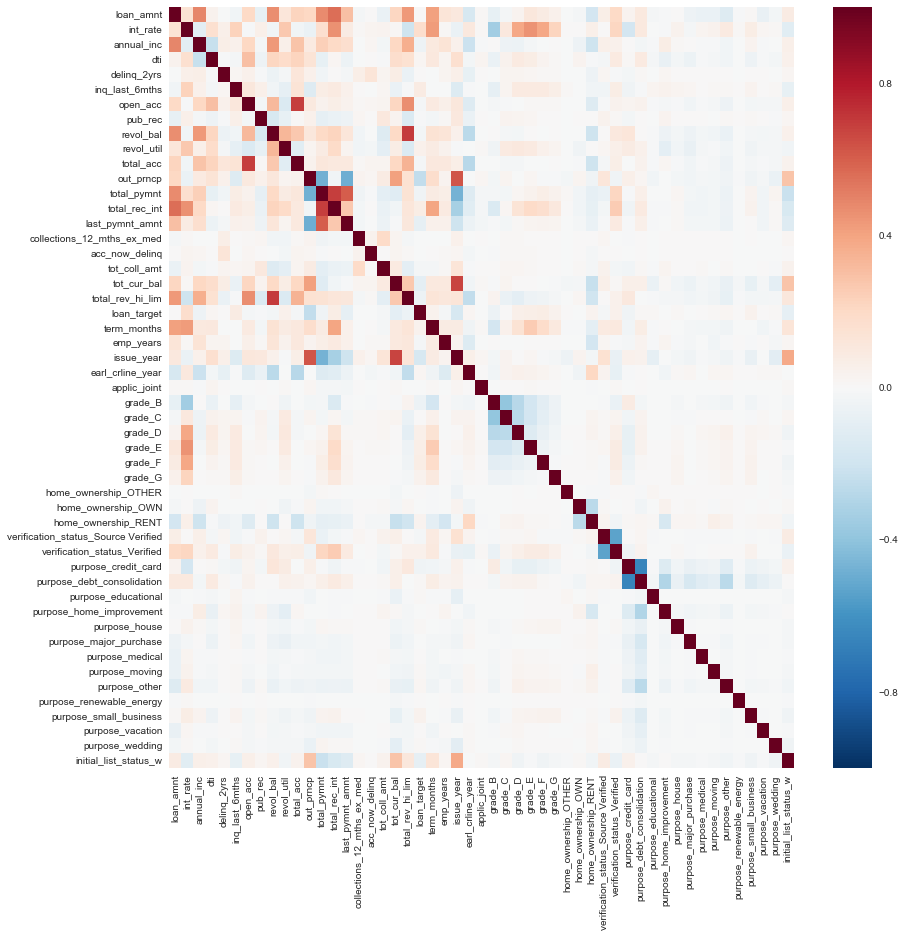

In [419]:
# correlation matrix, heatmap
plt.figure(figsize=(14,14))
sns.heatmap(data_v2.corr())

Checking correlation of all features against the 'loan_target'

In [420]:
corr_with_target = data_v2.corr()

In [421]:
corr_with_target['loan_target'].sort_values(ascending=False)

loan_target                            1.000000
int_rate                               0.175450
inq_last_6mths                         0.080887
total_rec_int                          0.072805
grade_F                                0.070373
grade_E                                0.068668
grade_D                                0.061400
revol_util                             0.050133
verification_status_Verified           0.048729
grade_G                                0.046209
term_months                            0.039590
purpose_small_business                 0.039262
home_ownership_RENT                    0.037575
dti                                    0.021491
earl_crline_year                       0.018249
purpose_other                          0.017926
purpose_debt_consolidation             0.015348
purpose_educational                    0.010883
purpose_moving                         0.010683
purpose_wedding                        0.009163
purpose_house                          0

The features with the highest correlation with target in absolute value are shown in the list below. The highest correlation is seen for 'out_prncp', 'int_rate', 'issue_year'

In [425]:
# the 10 features with higher correlation with target in absolute value
corr_with_target['loan_target'].abs().sort_values(ascending=False).head(15)

loan_target              1.000000
out_prncp                0.246379
int_rate                 0.175450
issue_year               0.165141
tot_cur_bal              0.094708
last_pymnt_amnt          0.092629
initial_list_status_w    0.088259
inq_last_6mths           0.080887
total_rec_int            0.072805
grade_F                  0.070373
grade_E                  0.068668
total_rev_hi_lim         0.061469
grade_D                  0.061400
grade_B                  0.055341
annual_inc               0.051019
Name: loan_target, dtype: float64

### End of pre-processing and data preparation

After all the steps above I save the data with a new final name. 

In [426]:
final_data = data_v2.copy(deep=True)

In [427]:
#checking the number of records and columns:
print ("The total number of records in the final data is: {}".format(final_data.shape[0]))
print ("The total number of columns, comprising target, in the final data is: {}".format(final_data.shape[1]))

The total number of records in the final data is: 887372
The total number of columns, comprising target, in the final data is: 51


In [428]:
#I also export them as csv for restarting project eventually from this stage without need of re-running cells above.

final_data.to_csv("finalloan_data.csv", index=False)

In [2]:
# if re-starting the project at this stage, without running previous cells apart from imports
#final_data = pd.read_csv('finalloan_data.csv', low_memory=False)

In [430]:
# checking read data if re-starting project from here
# pd.pandas.set_option('display.max_columns', None)

# final_data.head(10)

## Separate final data into feature matrix (X) and target (y)

As a reminder about the target: GOOD LOANS have lable 0, BAD LOANS have lable 1.

In [3]:
# Feature matrix
X = final_data.drop('loan_target', axis=1)

In [4]:
# target
y = final_data['loan_target']

## Split data into training and testing datasets

Data are now shuffled and split into training and testing datasets, keeping 20% for testing. I set a random state for results to be reproduced everytime the project is run.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [434]:
# Showing results of the split
print('The number of samples in the training set is: ', X_train.shape[0])
print('The number of samples in the testing set is: ', X_test.shape[0])

The number of samples in the training set is:  709897
The number of samples in the testing set is:  177475


## Feature Scaling (StandarScaler)

Features in the data have very different ranges (for example 'loan_amnt' ranges from 500 to 35000, while 'int_rate' from 5.32 to 28.99). The features with higher numbers will dominate in certain machine learning algorithms based on Euclidean distaces. Moreover sclaling can reduce converging time for the model. Therefore I will scale the features. I will use sklearn StandardScaler.

In [6]:
# create StandardScaler object
# fit and transform on X_train dataset
# only transform the X_test dataset (as object has been fit to test dataset already)
sc_X = StandardScaler()

In [7]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [437]:
# I don't need to scale y, as it is a classification problem.

## Building The Models

For this project I will test and compare the following supervised machine learning models: Gaussian Naive Bayse, Logistic Regression, Random Forest Classifier and AdaBoost (run as an ensemble of Decision Trees).

To evaluate their performance I will look at the classification report, the confusion matrix and the accuracy score (as in many of the kernels seen in kaggle).

As the data are unbalanced, accuracy by itself is not a good metric. We could miss most of the bad loans and still have a high accuracy score. Therefore it will be important to look also at precision and recall.

PRECISION will tell us what proportion of the loans the model classified as bad, actually were bad. It is the ration of true postives (TP, loans classified as bad and actually bad), to all positives (all loans classified as bad, regardless of what they were):

[TruePositives / (TruePostives + FalsePositives)]

RECALL will tell us what proportion of the loans which were actually bad were classified by the model as bad. It is the ration of true postives (TP, loans classified as bad and actually bad), to all actual bad loans:

[TruePostives / (TruePostives + FalseNegatives)]

The investors will probably be more interested in having a model with high recall, to make sure they do not invest on bad loans. At the same time, I think LendingClub will want a good precision to not deny loans to potential good customers.

### Naive prediction

As most of the customers have good loans, in a naive manner (without using any of the feature's information) we could always predict good loans.

In [438]:
# using the final_data for this reference calculation

fin_n_records = final_data.shape[0]
fin_n_good_loans = final_data[final_data['loan_target']==0].count()['loan_target']
fin_n_bad_loans = final_data[final_data['loan_target']==1].count()['loan_target']
fin_perc_good_loans = round((fin_n_good_loans/fin_n_records)*100,3)
fin_perc_bad_loans = round((fin_n_bad_loans/fin_n_records)*100,3)

print('The final number of customers is: ', fin_n_records)
print('The final number of customers with GOOD loans is: ', fin_n_good_loans)
print('The final number of customers with BAD loans is: ', fin_n_bad_loans)
print('The final percentage of customers with GOOD loans is: ', fin_perc_good_loans)
print('The final percentage of customers with BAD loans is: ', fin_perc_bad_loans)

The final number of customers is:  887372
The final number of customers with GOOD loans is:  819943
The final number of customers with BAD loans is:  67429
The final percentage of customers with GOOD loans is:  92.401
The final percentage of customers with BAD loans is:  7.599


In the naive prediction we would be accurate at 92.401%, but we would miss all the customers with bad loans.

### Building Initial Models (imbalanced data and basic hyperparameters) - Models 1

#### Gaussian Naive Bayse

In [458]:
# create a Gaussian Naive Bayse classifier object
# fit it to training data set
clf_gnb1 = GaussianNB()            # no random_state and no other parameters available

start_training = time()

clf_gnb1.fit(X_train, y_train)

end_training = time()

In [442]:
# predicting test results
y_pred = clf_gnb1.predict(X_test)

# for training set just to check overfitting
y_train_pred =clf_gnb1.predict(X_train)

In [443]:
# to create confusion matrix
# TN FP
# FN TP

conf_mat = confusion_matrix(y_test, y_pred)
print('The confustion matrix is: ')
conf_mat

The confustion matrix is: 


array([[149015,  14912],
       [  9442,   4106]], dtype=int64)

The number of prediction errors, FP + FN  appears very is high.

In [444]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.91      0.92    163927
          1       0.22      0.30      0.25     13548

avg / total       0.89      0.86      0.87    177475



In [445]:
print('The accuracy score for train set is: ', accuracy_score(y_train,y_train_pred))
print('The accuracy score for test set is: ', accuracy_score(y_test,y_pred))

The accuracy score for train set is:  0.862022237029
The accuracy score for test set is:  0.862775038738


In [446]:
print('The precision score for test set is: ', precision_score(y_test,y_pred))
print('The recall score for test set is: ', recall_score(y_test,y_pred))

The precision score for test set is:  0.215900725628
The recall score for test set is:  0.303070563921


In [447]:
# k-fold cross validation
# to check accuracy over 10 different test sets created with kfold

accuracies_kf =cross_val_score(estimator = clf_gnb1, X = X_train, y = y_train, cv=10)
print('the mean accuracy over 10 sets using kfold is:', accuracies_kf.mean())
print('the standard deviation of accuracy over 10 sets using kfold is:', accuracies_kf.std())

the mean accuracy over 10 sets using kfold is: 0.861498227706
the standard deviation of accuracy over 10 sets using kfold is: 0.00241185798673


In [459]:
# training time (not kfold)
training_time = end_training - start_training
print('Training time was: ', training_time)

Training time was:  1.6873838901519775


The accuracy score for both training and testing set is approximately 0.86 (worse than naive predictor).

The model preforms very badly also in terms of presion (0.22) and recall (0.30). It is not able to identify customers with BAD loans.

The model was trained very quickly.

#### Logistic Regression 

In [449]:
# create a logistic regression classifier object
# fit it to training data set
clf_log1 = LogisticRegression(random_state=42)

start_training = time()

clf_log1.fit(X_train, y_train)

end_training = time()

In [450]:
# predicting test results
y_pred = clf_log1.predict(X_test)

# for training set just to check overfitting
y_train_pred =clf_log1.predict(X_train)

In [451]:
# to create confusion matrix
# TN FP
# FN TP

conf_mat = confusion_matrix(y_test, y_pred)
print('The confustion matrix is: ')
conf_mat

The confustion matrix is: 


array([[163218,    709],
       [  5991,   7557]], dtype=int64)

In terms of prediction errors, there are 709 false positves and 5991 FN. The number of wrong predictions is still high, but much lower than what seen in the NaiveBayse model.

In [452]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    163927
          1       0.91      0.56      0.69     13548

avg / total       0.96      0.96      0.96    177475



In [453]:
print('The accuracy score for train set is: ', accuracy_score(y_train,y_train_pred))
print('The accuracy score for test set is: ', accuracy_score(y_test,y_pred))

The accuracy score for train set is:  0.962807280493
The accuracy score for test set is:  0.962248203972


In [454]:
print('The precision score for test set is: ', precision_score(y_test,y_pred))
print('The recall score for test set is: ', recall_score(y_test,y_pred))

The precision score for test set is:  0.914226953787
The recall score for test set is:  0.557794508415


In [455]:
# k-fold cross validation
# to check accuracy over 10 different test sets created with kfold

accuracies_kf =cross_val_score(estimator = clf_log1, X = X_train, y = y_train, cv=10)
print('the mean accuracy over 10 sets using kfold is:', accuracies_kf.mean())
print('the standard deviation of accuracy over 10 sets using kfold is:', accuracies_kf.std())

the mean accuracy over 10 sets using kfold is: 0.962767837122
the standard deviation of accuracy over 10 sets using kfold is: 0.000537706932907


In [457]:
# training time (not kfold)
training_time = end_training - start_training
print('Training time was: ', training_time)

Training time was:  19.739022970199585


The accuracy score for both training and testing set is approximately 0.96 (better than for naive predictor and Gaussian Naive Bayse). The model doesn't seem to overfit.

The model seems to perform poorly in recalling customers with bad loans (recall is low, it is approximately 0.56).

#### Random Forect Classification

In [460]:
# create a Random Forest classifier object
# fit it to training data set
# using 10 number estimators as in default paramters, but changing criterion to entropy instead of gini
clf_rf1 = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state=42)

start_training = time()

clf_rf1.fit(X_train, y_train)

end_training = time()

In [461]:
# predicting test results
y_pred = clf_rf1.predict(X_test)

# for training set just to check overfitting
y_train_pred =clf_rf1.predict(X_train)

In [462]:
# to create confusion matrix
# TN FP
# FN TP

conf_mat = confusion_matrix(y_test, y_pred)
print('The confustion matrix is: ')
conf_mat

The confustion matrix is: 


array([[163810,    117],
       [  5181,   8367]], dtype=int64)

In terms of prediction errors, there are 117 false positves and 5181 FN. The number of wrong predictions is lower than for all the models seen above.

In [463]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98    163927
          1       0.99      0.62      0.76     13548

avg / total       0.97      0.97      0.97    177475



In [464]:
print('The accuracy score for train set is: ', accuracy_score(y_train,y_train_pred))
print('The accuracy score for test set is: ', accuracy_score(y_test,y_pred))

The accuracy score for train set is:  0.994118865131
The accuracy score for test set is:  0.970147908156


In [465]:
print('The precision score for test set is: ', precision_score(y_test,y_pred))
print('The recall score for test set is: ', recall_score(y_test,y_pred))

The precision score for test set is:  0.986209335219
The recall score for test set is:  0.617581930912


In [466]:
# k-fold cross validation
# to check accuracy over 10 different test sets created with kfold

accuracies_kf =cross_val_score(estimator = clf_rf1, X = X_train, y = y_train, cv=10)
print('the mean accuracy over 10 sets using kfold is:', accuracies_kf.mean())
print('the standard deviation of accuracy over 10 sets using kfold is:', accuracies_kf.std())

the mean accuracy over 10 sets using kfold is: 0.970302733334
the standard deviation of accuracy over 10 sets using kfold is: 0.000579122367227


In [467]:
# training time (not kfold)
training_time = end_training - start_training
print('Training time was: ', training_time)

Training time was:  58.14105415344238


The accuracy score for the testing set is approximately 0.97 (better than all models above). However, the accuracy for the training set is 0.99. Such a high number suggests overfitting. Some parameter tuning should be able to reduce it.

The model seems to perform still poorly in recalling customers with bad loans (recall is low, it is approximately 0.62).
The recall is however better than what seen in the models above.

#### AdaBoost Classification

In [468]:
# create a AdaBoost classifier object
# fit it to training data set
clf_adb1 = AdaBoostClassifier(random_state=42)

start_training = time()

clf_adb1.fit(X_train, y_train)

end_training = time()

In [469]:
# predicting test results
y_pred = clf_adb1.predict(X_test)

# for training set just to check overfitting
y_train_pred =clf_adb1.predict(X_train)

In [470]:
# to create confusion matrix
# TN FP
# FN TP

conf_mat = confusion_matrix(y_test, y_pred)
print('The confustion matrix is: ')
conf_mat

The confustion matrix is: 


array([[163231,    696],
       [  6460,   7088]], dtype=int64)

In terms of prediction errors, there are 696 false positves and 6460 FN. The total number of errors is higher than what seen in logistic regression and random forest (although the last one was probably overfitting).

In [471]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    163927
          1       0.91      0.52      0.66     13548

avg / total       0.96      0.96      0.95    177475



In [472]:
print('The accuracy score for train set is: ', accuracy_score(y_train,y_train_pred))
print('The accuracy score for test set is: ', accuracy_score(y_test,y_pred))

The accuracy score for train set is:  0.96031677835
The accuracy score for test set is:  0.959678828004


In [473]:
print('The precision score for test set is: ', precision_score(y_test,y_pred))
print('The recall score for test set is: ', recall_score(y_test,y_pred))

The precision score for test set is:  0.910585817061
The recall score for test set is:  0.523176852672


In [475]:
# k-fold cross validation
# to check accuracy over 10 different test sets created with kfold

accuracies_kf =cross_val_score(estimator = clf_adb1, X = X_train, y = y_train, cv=10)
print('the mean accuracy over 10 sets using kfold is:', accuracies_kf.mean())
print('the standard deviation of accuracy over 10 sets using kfold is:', accuracies_kf.std())

the mean accuracy over 10 sets using kfold is: 0.960368898151
the standard deviation of accuracy over 10 sets using kfold is: 0.00102507425168


In [474]:
# training time (not kfold)
training_time = end_training - start_training
print('Training time was: ', training_time)

Training time was:  170.0310423374176


The accuracy score for both training and testing set is approximately 0.96 as for Logistic Regression.

The model seems to perform poorly in recalling customers with bad loans (recall is low, it is approximately 0.52). For Logistic Regression was a bit higher (0.56) and for RandomForest was 0.62 but that model is probably overfitting.

#### Summary of first models (Models 1)

Among the models above Gaussian Naive Bayse has the worse performance in terms of all accuracy, precision and recall.

Logistic Regression and AdaBoost provide very similar results. They both have accuracy of 0.96 for both training and testing datasets. Precision is 0.91. Recall is slightly higher for Logistic Regression (0.56 vs 0.52). However, AdaBoost performance could improve after hyperparameter tuning.

Random Forest provides the best precision and recall values (0.98 and 0.62 respectively). Accuracy for test data is also high (0.97), but it could be overfitting as the accuracy on training data is 0.99.

The models need to be improved to try to increse mainly recall as we want to capture all the customers with bad loans.

In terms of running time, Gaussian Naive Bayse was very fast. For the others, time increased in the order LogisticRegression, RandomForest and AdaBoost. The times printing are without kfold. If considering kfold they were much higher, mostly for AdaBoost.

### Models dealing with imbalanced data, using class_weight=balanced - Models 2 

### (LogisticRegression and RandomForest only)

In both LogisticRegression and RandomForestClassifier there is an option 'class weight=balanced'. The weights are adjusted according to the class frequencies (more weight given to less frequent class). I want to test if using this hyperparameter value improves the results seen in the section above. 

#### Logistic Regression with class_weight = balanced

In [480]:
# create a logistic regression classifier object
# fit it to training data set
clf_log2 = LogisticRegression(class_weight = 'balanced',random_state=42)

start_training = time()

clf_log2.fit(X_train, y_train)

end_training = time()

In [481]:
# predicting test results
y_pred = clf_log2.predict(X_test)

# for training set just to check overfitting
y_train_pred =clf_log2.predict(X_train)

In [482]:
# to create confusion matrix
# TN FP
# FN TP

conf_mat = confusion_matrix(y_test, y_pred)
print('The confustion matrix is: ')
conf_mat

The confustion matrix is: 


array([[140351,  23576],
       [  3470,  10078]], dtype=int64)

In terms of prediction errors, there are 23576 false positves and 3470 FN. The number of FN has decreased using the mode 'balanced' (was 5991 before). However, the number of FP has increased significantly (from 709 to 23576).

In [483]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.86      0.91    163927
          1       0.30      0.74      0.43     13548

avg / total       0.92      0.85      0.88    177475



In [484]:
print('The accuracy score for train set is: ', accuracy_score(y_train,y_train_pred))
print('The accuracy score for test set is: ', accuracy_score(y_test,y_pred))

The accuracy score for train set is:  0.846479137114
The accuracy score for test set is:  0.84760670517


In [485]:
print('The precision score for test set is: ', precision_score(y_test,y_pred))
print('The recall score for test set is: ', recall_score(y_test,y_pred))

The precision score for test set is:  0.299459202472
The recall score for test set is:  0.743873634485


In [486]:
# training time (not kfold)
training_time = end_training - start_training
print('Training time was: ', training_time)

Training time was:  17.387309074401855


The accuracy score for both training and testing set is approximately 0.84, significantly less than the original logistic regression (which had 0.96 for both).
The 'balanced' mode has improved recall, from 0.56 to 0.74. However, precision has fallen to 0.30.
This model would be better at recalling customers with bad loans, but will be bad in predicting customers having bad loans when in reality they would be good (high FP). 

#### Random Forest Classification with class_weight = balanced

In [487]:
# create a Random Forest classifier object
# fit it to training data set

# using 10 number estimators as in default paramters, but changing criterion to entropy instead of gini
clf_rf2 = RandomForestClassifier(n_estimators = 10, criterion='entropy', class_weight = 'balanced',random_state=42)

start_training = time()

clf_rf2.fit(X_train, y_train)

end_training = time()

In [488]:
# predicting test results
y_pred = clf_rf2.predict(X_test)

# for training set just to check overfitting
y_train_pred =clf_rf2.predict(X_train)

In [489]:
# to create confusion matrix
# TN FP
# FN TP

conf_mat = confusion_matrix(y_test, y_pred)
print('The confustion matrix is: ')
conf_mat

The confustion matrix is: 


array([[163848,     79],
       [  5233,   8315]], dtype=int64)

In terms of prediction errors, there are 79 false positives and 5233 false negatives (without 'balanced' option we had 117 false positves and 5181 FN). The number of FP has decreased while the number of FN is very similar.

In [490]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98    163927
          1       0.99      0.61      0.76     13548

avg / total       0.97      0.97      0.97    177475



In [491]:
print('The accuracy score for train set is: ', accuracy_score(y_train,y_train_pred))
print('The accuracy score for test set is: ', accuracy_score(y_test,y_pred))

The accuracy score for train set is:  0.994114639166
The accuracy score for test set is:  0.970069023806


In [492]:
print('The precision score for test set is: ', precision_score(y_test,y_pred))
print('The recall score for test set is: ', recall_score(y_test,y_pred))

The precision score for test set is:  0.990588515606
The recall score for test set is:  0.613743726011


In [493]:
# training time (not kfold)
training_time = end_training - start_training
print('Training time was: ', training_time)

Training time was:  56.92788004875183


As for the results without 'balanced' option, the random forest accuracy score for the testing set is approximately 0.97 . However, the accuracy for the training set is 0.99 (high number suggesting overfitting). 

The recall is again almost the same (0.61 instead of 0.62).

##### Summary of Models 2

Using the 'class_weight=balanced' option for LogisticRegression improved results in terms of recall. Recall increased from 0.56 to 0.74, however precision became very low (0.30, from previous 0.91). Loans will not be provided to many customers who in reality would re-pay back (FP).
For RandomForest results stayed basically the same.

Another approach for imbalanced data need to be tested to see if results can be improved.

### Models dealing with imbalanced data, over sampling using SMOTE - Models 3

A way of dealing with imbalanced data is to create synthetic samples for the less represented class, bad loans. This can be implemented using SMOTE algorithm (Synthetic Minority Oversampling Technique).

https://github.com/scikit-learn-contrib/imbalanced-learn

https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

This technique has been used or mentioned in several kaggle kernels (for example
https://www.kaggle.com/aamirsiddiqui/lending-club-loan-machine-learning

https://www.kaggle.com/pragyanbo/a-hitchhiker-s-guide-to-lending-club-loan-data

https://www.kaggle.com/gargmanish/how-to-handle-imbalance-data-study-in-detail)

Another example for LogisticRegression can be found here:
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

##### new over-sampled training data using SMOTE

In [494]:
smo_os = SMOTE(random_state = 42)

In [495]:
# over-sampling only training data
# information present in the test data is not used to create synthethics to not influence model prediction results
X_train_os, y_train_os = smo_os.fit_sample(X_train, y_train)

In [496]:
print('The original number of samples in the training dataset was: ', len(X_train))
print('The number of samples in the training dataset after SMOTE is: ', len(X_train_os))

The original number of samples in the training dataset was:  709897
The number of samples in the training dataset after SMOTE is:  1312032


In [497]:
print('The number of samples with bad loans (label 1) in the training dataset was: ', y_train.sum())
print('The number of samples with bad loans (label 1) in the training dataset after SMOTE is: ', y_train_os.sum())

The number of samples with bad loans (label 1) in the training dataset was:  53881
The number of samples with bad loans (label 1) in the training dataset after SMOTE is:  656016


In [498]:
print('The percentage of samples with bad loans (label 1) in the training dataset was: ',
      round((y_train.sum()/len(y_train))*100, 2))
print('The percentage of samples with bad loans (label 1) in the training dataset after SMOTE is: ', 
      round((y_train_os.sum()/len(y_train_os))*100, 2))

The percentage of samples with bad loans (label 1) in the training dataset was:  7.59
The percentage of samples with bad loans (label 1) in the training dataset after SMOTE is:  50.0


After over sampling with SMOTE, the number of samples in the training set has increased from 709897 to 131203. The percentage of bad loans in the training dataset increased from 7.59 to 50%.

Now our training data are balanced.
So I'll test the same models1 with the balanced training data.

#### Gaussian Naive Bayse after SMOTE

In [499]:
# create a Gaussian Naive Bayse classifier object
# fit it to training data set
clf_gnb3 = GaussianNB()            # no random_state and no other parameters available

start_training = time()

clf_gnb3.fit(X_train_os, y_train_os)

end_training = time()

In [500]:
# predicting test results
y_pred = clf_gnb3.predict(X_test)

# for training set just to check overfitting
y_train_pred =clf_gnb3.predict(X_train_os)

In [501]:
# to create confusion matrix
# TN FP
# FN TP

conf_mat = confusion_matrix(y_test, y_pred)
print('The confustion matrix is: ')
conf_mat

The confustion matrix is: 


array([[138006,  25921],
       [  6476,   7072]], dtype=int64)

The Gaussian Naive Bayse model seems still to perform poorly, with significant numer of FP and FN.

In [502]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.84      0.89    163927
          1       0.21      0.52      0.30     13548

avg / total       0.90      0.82      0.85    177475



In [503]:
print('The accuracy score for train set is: ', accuracy_score(y_train_os,y_train_pred))
print('The accuracy score for test set is: ', accuracy_score(y_test,y_pred))

The accuracy score for train set is:  0.698780212678
The accuracy score for test set is:  0.817455979715


In [504]:
print('The precision score for test set is: ', precision_score(y_test,y_pred))
print('The recall score for test set is: ', recall_score(y_test,y_pred))

The precision score for test set is:  0.214348498166
The recall score for test set is:  0.521995866549


In [505]:
# k-fold cross validation
# to check accuracy over 10 different test sets created with kfold

accuracies_kf =cross_val_score(estimator = clf_gnb3, X = X_train_os, y = y_train_os, cv=10)
print('the mean accuracy over 10 sets using kfold is:', accuracies_kf.mean())
print('the standard deviation of accuracy over 10 sets using kfold is:', accuracies_kf.std())

the mean accuracy over 10 sets using kfold is: 0.698713153467
the standard deviation of accuracy over 10 sets using kfold is: 0.00476899533027


In [506]:
# training time (not kfold)
training_time = end_training - start_training
print('Training time was: ', training_time)

Training time was:  3.015399217605591


The accuracy score of the Gaussian Naive Bayse model for the testing set is approximately 0.81 (was 0.86 before SMOTE). So it has decreased. For the training set has largely descresed to approx 0.70 and is less than for the test data.

Recall has improved after SMOTE (increased from 0.30 to 0.52).

The Gaussian Naive Bayse seems to perform poorly, maybe because in the EDA section some features were clearly not Gaussian.

In terms of training time, it is still very fast also after the number of samples has increased.

#### Logistic Regression after SMOTE

In [507]:
# create a logistic regression classifier object
# fit it to training data set
clf_log3 = LogisticRegression(random_state=42)

start_training = time()

clf_log3.fit(X_train_os, y_train_os)

end_training = time()

In [508]:
# predicting test results
y_pred = clf_log3.predict(X_test)

# for training set just to check overfitting
y_train_pred =clf_log3.predict(X_train_os)

In [509]:
# to create confusion matrix
# TN FP
# FN TP

conf_mat = confusion_matrix(y_test, y_pred)
print('The confustion matrix is: ')
conf_mat

The confustion matrix is: 


array([[141405,  22522],
       [  3544,  10004]], dtype=int64)

The number of FP seems very high (poor precision).

In [510]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.86      0.92    163927
          1       0.31      0.74      0.43     13548

avg / total       0.92      0.85      0.88    177475



In [511]:
print('The accuracy score for train set is: ', accuracy_score(y_train_os,y_train_pred))
print('The accuracy score for test set is: ', accuracy_score(y_test,y_pred))

The accuracy score for train set is:  0.809032858955
The accuracy score for test set is:  0.853128609663


In [512]:
print('The precision score for test set is: ', precision_score(y_test,y_pred))
print('The recall score for test set is: ', recall_score(y_test,y_pred))

The precision score for test set is:  0.307569329152
The recall score for test set is:  0.738411573664


In [513]:
# k-fold cross validation
# to check accuracy over 10 different test sets created with kfold

accuracies_kf =cross_val_score(estimator = clf_log3, X = X_train_os, y = y_train_os, cv=10)
print('the mean accuracy over 10 sets using kfold is:', accuracies_kf.mean())
print('the standard deviation of accuracy over 10 sets using kfold is:', accuracies_kf.std())

the mean accuracy over 10 sets using kfold is: 0.809016857273
the standard deviation of accuracy over 10 sets using kfold is: 0.00274563418609


In [514]:
# training time (not kfold)
training_time = end_training - start_training
print('Training time was: ', training_time)

Training time was:  33.89127707481384


Before over-sampling (model clf_log1) the accuracy score for both training and testing set was approximately 0.96. The accuracy has decreased to 0.81 for training data and 0.85 testing data.

While precision has decreased and is low (0.30) after resampling, the recall has improved from 0.56 to 0.74.
So this model would be better in recalling the customers with bad loans. However, it will miss-cassify many customers which would have good loans as bad loans (many FP).

Results are very similar to the ones obtained using class_weight=balanced option. The values are the same for precision and recall. Testing set accuracy has improved from 0.84 to 0.85, while training set accuracy has decreased from 0.84 to 0.81.

#### Random Forest Classification after SMOTE

In [515]:
# create a Random Forest classifier object
# fit it to training data set

# using 10 number estimators as in default paramters, but changing criterion to entropy instead of gini
clf_rf3 = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state=42)

start_training = time()

clf_rf3.fit(X_train_os, y_train_os)

end_training = time()

In [516]:
# predicting test results
y_pred = clf_rf3.predict(X_test)

# for training set just to check overfitting
y_train_pred =clf_rf3.predict(X_train_os)

In [517]:
# to create confusion matrix
# TN FP
# FN TP

conf_mat = confusion_matrix(y_test, y_pred)
print('The confustion matrix is: ')
conf_mat

The confustion matrix is: 


array([[163371,    556],
       [  4845,   8703]], dtype=int64)

The number of FP and FN has significantly decreased compared to NaiveBayse and Logistic Regression.

In [518]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98    163927
          1       0.94      0.64      0.76     13548

avg / total       0.97      0.97      0.97    177475



In [519]:
print('The accuracy score for train set is: ', accuracy_score(y_train_os,y_train_pred))
print('The accuracy score for test set is: ', accuracy_score(y_test,y_pred))

The accuracy score for train set is:  0.998673050657
The accuracy score for test set is:  0.969567544725


In [520]:
print('The precision score for test set is: ', precision_score(y_test,y_pred))
print('The recall score for test set is: ', recall_score(y_test,y_pred))

The precision score for test set is:  0.939950318609
The recall score for test set is:  0.642382639504


In [521]:
# k-fold cross validation
# to check accuracy over 10 different test sets created with kfold

accuracies_kf =cross_val_score(estimator = clf_rf3, X = X_train_os, y = y_train_os, cv=10)
print('the mean accuracy over 10 sets using kfold is:', accuracies_kf.mean())
print('the standard deviation of accuracy over 10 sets using kfold is:', accuracies_kf.std())

the mean accuracy over 10 sets using kfold is: 0.977903810087
the standard deviation of accuracy over 10 sets using kfold is: 0.0338760689435


In [522]:
# training time (not kfold)
training_time = end_training - start_training
print('Training time was: ', training_time)

Training time was:  141.4914755821228


As seen for Random Forest model before over-sampling, the accuracy score for the testing set is approximately 0.97 (better than all models above). However, the accuracy for the training set is 0.99. Such high number suggests overfitting. Some parameter tuning should be able tested.

After over-sampling the recall has slightly improved from 0.62 to 0.64. Precision is high, being 0.94.

#### AdaBoost after SMOTE

In [523]:
# create a AdaBoost classifier object
# fit it to training data set
clf_adb3 = AdaBoostClassifier(random_state=42)

start_training = time()

clf_adb3.fit(X_train_os, y_train_os)

end_training = time()

In [524]:
# predicting test results
y_pred = clf_adb3.predict(X_test)

# for training set just to check overfitting
y_train_pred =clf_adb3.predict(X_train_os)

In [525]:
# to create confusion matrix
# TN FP
# FN TP

conf_mat = confusion_matrix(y_test, y_pred)
print('The confustion matrix is: ')
conf_mat

The confustion matrix is: 


array([[152022,  11905],
       [  4226,   9322]], dtype=int64)

The number of FP seems high and therefore the model will have low precision.

In [526]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.93      0.95    163927
          1       0.44      0.69      0.54     13548

avg / total       0.93      0.91      0.92    177475



In [527]:
print('The accuracy score for train set is: ', accuracy_score(y_train_os,y_train_pred))
print('The accuracy score for test set is: ', accuracy_score(y_test,y_pred))

The accuracy score for train set is:  0.905235543036
The accuracy score for test set is:  0.909108325116


In [528]:
print('The precision score for test set is: ', precision_score(y_test,y_pred))
print('The recall score for test set is: ', recall_score(y_test,y_pred))

The precision score for test set is:  0.439157676544
The recall score for test set is:  0.688072040154


In [529]:
# training time (not kfold)
training_time = end_training - start_training
print('Training time was: ', training_time)

Training time was:  452.9786503314972


After over-sampling, for AdaBoost the accuracy score has decresed for both training and testing sets, from 0.96 to 0.90.

Recall has however increased from 0.52 to 0.69. SO our model has improved in the ability of recalling customers with bad loans. Precision however is low (0.44), so some customers who would repay their loan will be predicted as instead defaulting. 

##### Summary of Models 3 (after SMOTE)

After over-sampling with SMOTE to reduce imbalance in classes, recall has increased for all the four models, but precision has reduced.

The Gaussian Naive Bayse model still performs poorly and worse than the others.
The results of Logistic Regression and Random forest in terms of accuracy, precision and recall are very similar to the ones obtained using the class_weight=balanced hyperparameter. 

Logistic Regression has the highest recall (0.74 vs 0.64 of RandomForest and 0.69 of AdaBoost). However has a very low precision value, 0.30.

For Random Forest (recall of 0.64) testing accuracy is the highest (0.97) as well as precision (0.64). However, the high accuracy on the training data set (0.99) seems to suggest over fitting. Random Forest gives almost the same results in all the three tests run: starting model, with balanced mode, with over-sampling.

AdaBoost seems to have a good accuracy (higher than for Logistic Regression), which is the same for both testing and training sets (0.90). Recall is 0.69 and precision is 0.44.

In terms of running time, while Gaussian Naive Bayse runs still very fast,as expected, the running time for all the other models has increased after over-sampling. 

### Parameter tuning using RandomizedSearchCV - Models 4
### Tested for RandomForest and AdaBoost

RandomForest results in the three tests above (basic, changing weight to balanced, after over-sampling) were very similar. Values of accuracy, precision and recall were the highest among the Models1, but a training test accuracy of 0.999 suggested overfitting (recall at approx 0.62). Before over-sampling, AdaBoost Model1 had precision of approximately 0.91 (much better than after oversampling), but low recall of approx 0.52, which I would like to increase.

In this section I want to run a test to see if I can find better hyperpameters for RandomForest and AdaBoost Models 1. As suggested by Udacity reviewers in past projects, I will use RandomizedSearchCV instead of GridSearchCV.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

Due to the minimal difference so far observed for Random Forest, I will use data NO oversampled (Model1).

Due to the very low precision and longer running time of AdaBoost after oversampling, I will use data NO oversampled to see if I can increase recall of Model1 to have good performane for both precision and recall.

As a test that can be improved in future delevelopments of this project, I will reduce the training data to 50000 samples to improve running times for RandomizedSearch. However, I will after apply the best parameters on model run on entire dataset (not oversampled).

##### Parameter tuning for RandomForest (no oversampling)

In [8]:
X_train_small = X_train[:50000]

In [9]:
y_train_small = y_train[:50000]

In [10]:
# create a Random Forest classifier object
# fit it to training data set -- smaller sizes
# using default parameters
clf_rf_bsm = RandomForestClassifier(random_state=42)

start_training = time()

clf_rf_bsm.fit(X_train_small, y_train_small)

end_training = time()

In [11]:
# dictionary with parameters to tune
my_grid = {'n_estimators':[10, 30, 50, 100], 'max_depth':[3, 5, 15, 25],'min_samples_split':[2,5,10],
           'criterion':['gini','entropy']}

In [12]:
# test 5 fold crossvalidation, searching across 10 different combinations for the classifier trained on 50000 samples
rf_randms = RandomizedSearchCV(estimator = clf_rf_bsm, param_distributions = my_grid, n_iter=10, cv=5,
                              random_state=42)

In [13]:
# fitting randomizedsearch object -- still on the 50000 dataset
rf_randms.fit(X_train_small, y_train_small)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [10, 30, 50, 100], 'max_depth': [3, 5, 15, 25], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [14]:
# get the best estimator
rf_randms.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'min_samples_split': 10,
 'n_estimators': 50}

This was just a test run on 50000 training samples to speed up the process. In future developments of this project I could run RandomizedSearch using all training data and also increasing n_iter.

I will run now a RandomForest model using the best parameters above on  all training data (before oversampling, as used in model1) and check if it performs better than model1.

In [15]:
# create a Random Forest classifier object --- with the best parameters identified above
# fit it to training data set

clf_rf4 = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=25, min_samples_split=10, random_state=42)

start_training = time()

clf_rf4.fit(X_train, y_train)

end_training = time()

In [16]:
# predicting test results
y_pred = clf_rf4.predict(X_test)

# for training set just to check overfitting
y_train_pred =clf_rf4.predict(X_train)

In [17]:
# to create confusion matrix
# TN FP
# FN TP

conf_mat = confusion_matrix(y_test, y_pred)
print('The confustion matrix is: ')
conf_mat

The confustion matrix is: 


array([[163873,     54],
       [  5072,   8476]], dtype=int64)

In [18]:
print('The accuracy score for train set is: ', accuracy_score(y_train,y_train_pred))
print('The accuracy score for test set is: ', accuracy_score(y_test,y_pred))

The accuracy score for train set is:  0.976244441095
The accuracy score for test set is:  0.971117058741


In [19]:
print('The precision score for test set is: ', precision_score(y_test,y_pred))
print('The recall score for test set is: ', recall_score(y_test,y_pred))

The precision score for test set is:  0.99366940211
The recall score for test set is:  0.625627398878


In [21]:
# k-fold cross validation
# to check accuracy over 10 different test sets created with kfold

accuracies_kf =cross_val_score(estimator = clf_rf4, X = X_train, y = y_train, cv=10)
print('the mean accuracy over 10 sets using kfold is:', accuracies_kf.mean())
print('the standard deviation of accuracy over 10 sets using kfold is:', accuracies_kf.std())

the mean accuracy over 10 sets using kfold is: 0.971462057421
the standard deviation of accuracy over 10 sets using kfold is: 0.000632455828619


In [22]:
accuracies_kf

array([ 0.97163021,  0.97239048,  0.97210875,  0.97060149,  0.97098183,
        0.97071419,  0.97186888,  0.97075603,  0.9721647 ,  0.97140402])

In [23]:
# training time (no k-fold)
training_time = end_training - start_training
print('Training time was: ', training_time)

Training time was:  263.8982388973236


As mentioned above, this test on Model4 can be improved running RandomisezSearchCV on more data and trying also more iterations and higher cv. Moreover GridSearchCV could also be tested.

Training set accuracy has reduced from 0.999 to 0.976 to be more simililar to testing set accuracy. The model has imporved in term of less danger of overfitting.

Precision is high (0.99). The number of FP, customers able to re-pay but instead predicted as not able, is low.
The model has only sligthly improved in terms of recall (now 0.6256, but was 0.6176 in model1).
As expected, training time has increased compared to model1 due to higher number of estimators for example.

A test should be run giving more importance to recall in GridSearch.

##### Parameter tuning for AdaBoost (no oversampling)

In [55]:
# create a AdaBoost classifier object --basic
# fit it to training data set --- reduced to 50000 samples

clf_adb_bsm = AdaBoostClassifier(random_state=42)

clf_adb_bsm.fit(X_train_small, y_train_small)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)

In [56]:
# dictionary with parameters to tune
my_grid_adb = {'n_estimators':[30, 50, 80, 100], 'learning_rate':[0.01, 0.1, 1]}

In [57]:
# test 5 fold crossvalidation, searching across 5 different combinations for the classifier trained on 1000 samples
rf_randms_adb = RandomizedSearchCV(estimator = clf_adb_bsm, param_distributions = my_grid_adb, n_iter=5, cv=5,
                              random_state=42)

In [58]:
# fitting randomizedsearch object -- still on the 50000 dataset
rf_randms_adb.fit(X_train_small, y_train_small)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'n_estimators': [30, 50, 80, 100], 'learning_rate': [0.01, 0.1, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [59]:
# get the best estimator
rf_randms_adb.best_params_

{'learning_rate': 1, 'n_estimators': 80}

From this provisional test for AdaBoost, done still on reduced 50000 training set and here using 5 iterations, the number of estimators should be increased from the default number of 50 to 80.

Therefore below I will run a Model4 for AdaBoost on all original training data (before SMOTE)to see if results improve compared to AdaBoost Model1.

In [61]:
# create a AdaBoost classifier object
# fit it to training data set
clf_adb4 = AdaBoostClassifier(n_estimators = 80, random_state=42)

start_training = time()

clf_adb4.fit(X_train, y_train)

end_training = time()

In [62]:
# predicting test results
y_pred = clf_adb4.predict(X_test)

# for training set just to check overfitting
y_train_pred =clf_adb4.predict(X_train)

In [63]:
# to create confusion matrix
# TN FP
# FN TP

conf_mat = confusion_matrix(y_test, y_pred)
print('The confustion matrix is: ')
conf_mat

The confustion matrix is: 


array([[163457,    470],
       [  6049,   7499]], dtype=int64)

In [64]:
print('The accuracy score for train set is: ', accuracy_score(y_train,y_train_pred))
print('The accuracy score for test set is: ', accuracy_score(y_test,y_pred))

The accuracy score for train set is:  0.964104651802
The accuracy score for test set is:  0.963268065925


In [65]:
print('The precision score for test set is: ', precision_score(y_test,y_pred))
print('The recall score for test set is: ', recall_score(y_test,y_pred))

The precision score for test set is:  0.94102145815
The recall score for test set is:  0.553513433717


In [66]:
# training time (no k-fold)
training_time = end_training - start_training
print('Training time was: ', training_time)

Training time was:  261.40854716300964


The accuracy of AdaBoost model with 80 estimators (model4) instead of 50 (model1) has slightly improved accuracy of both training and testing datasets (for training datasets for example from 0.95968 to 0.96327). Both precision and recall score have also improved (precision was 0.910586 and now is 0.941102; recall was 0.523177 adn now is 0.553513).

The AdaBoost model after over-sampling (Model4) has still a better recall (0.688972), but took longer to train and had a lower accuracy and much lower precision (approx 0.90 and 0.44) respectively. Therefore it would be better in recalling customers with bad loans and prevent investors to loose money. However it will perform quite badly on FN numbers, predicting that many good customer will pay not back, wrongly (loss of good customers).

## Feature Importance

In this section I want to investigate which features are more important for predicting bad loans. This can be a very valuable information to simplify understanding of the problem.

In [67]:
list_features = [f for f in X.columns]

##### For Logistic Regression Model 1 (lowere recall, but better in accuracy and precision compared to Model3)

In [71]:
my_log1_features = pd.Series(np.abs(clf_log1.coef_.ravel()))

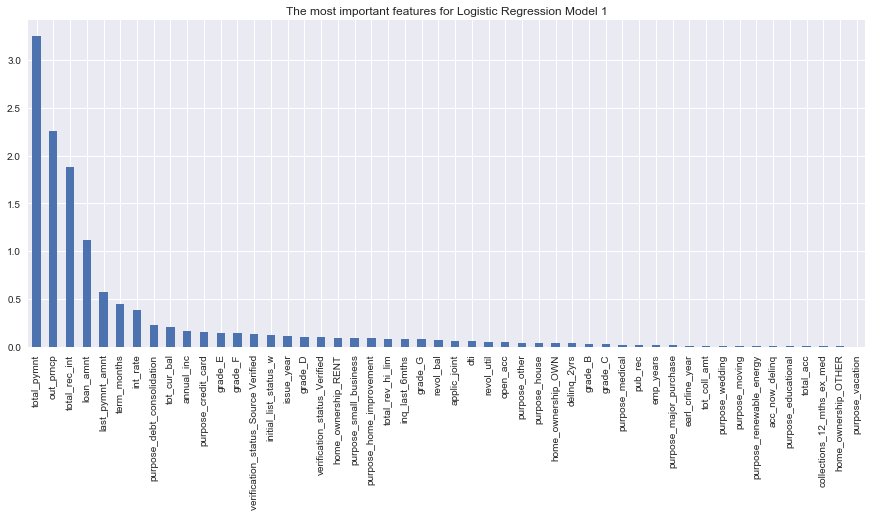

In [72]:
my_log1_features.index = list_features
my_log1_features.sort_values(inplace=True, ascending=False)
my_log1_features.plot.bar(figsize=(15,6))
plt.title('The most important features for Logistic Regression Model 1')

As seen above, the 7 most important features are: total_pymnt, out_prncp, total_rec_int, loan_amnt, last_pymnt_amnt, term_months, int_rate

##### For Logistic Regression after SMOTE (with high recall but low precision)

In [577]:
my_log3_features = pd.Series(np.abs(clf_log3.coef_.ravel()))

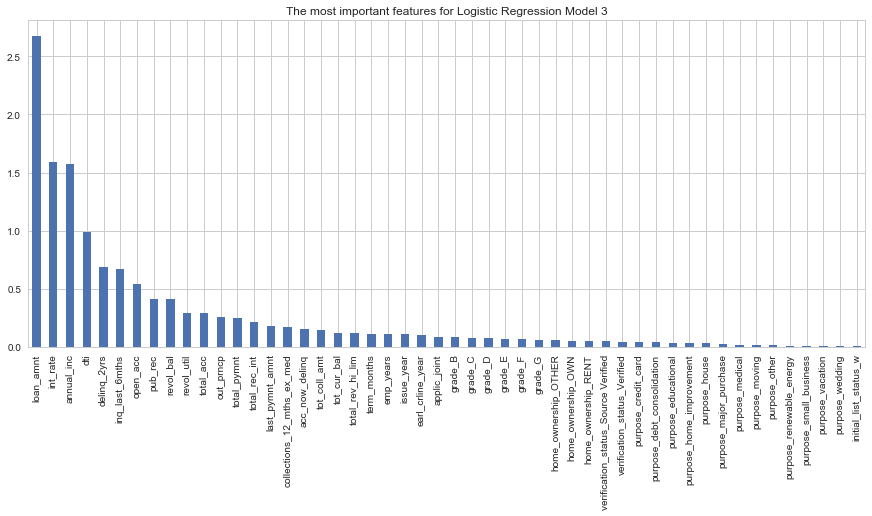

In [590]:
my_log3_features.index = list_features
my_log3_features.sort_values(inplace=True, ascending=False)
my_log3_features.plot.bar(figsize=(15,6))
plt.title('The most important features for Logistic Regression Model 3')

As seen above, the 7 most important features are: loan_amnt, int_rate, annual_inc, dti, delinq_2yr, inq_last_6mnths, open_acc.

##### For Random Forest Model 4 after hyperparameter tuning

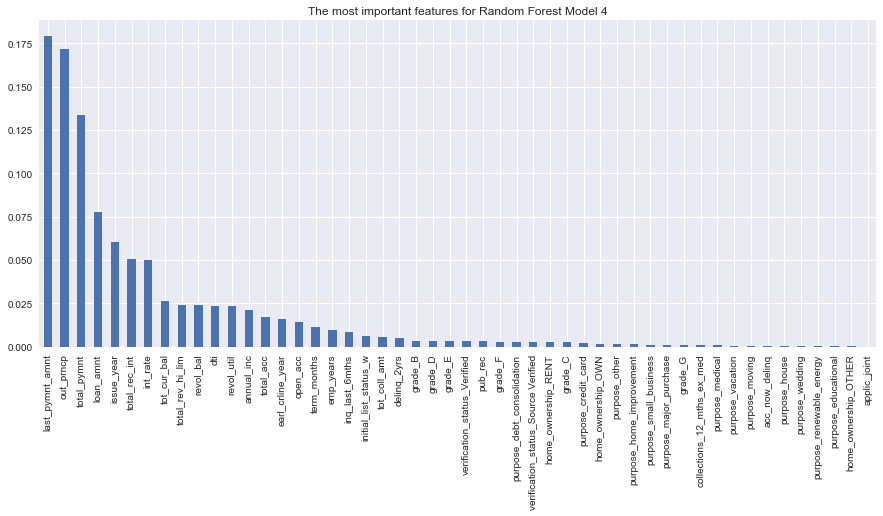

In [26]:
my_rf4_features = pd.Series(clf_rf4.feature_importances_)
my_rf4_features.index = list_features
my_rf4_features.sort_values(inplace=True, ascending=False)
my_rf4_features.plot.bar(figsize=(15,6))
plt.title('The most important features for Random Forest Model 4')

As seen above, the 7 most important features are: last_pymnt_amnt, out_prncp, total_pymnt, loan_amnt, issue_year, total_rec_int, int_rate. 

##### For Adaboost Model 3 after SMOTE (higher recall then in Model1, although lower precision)

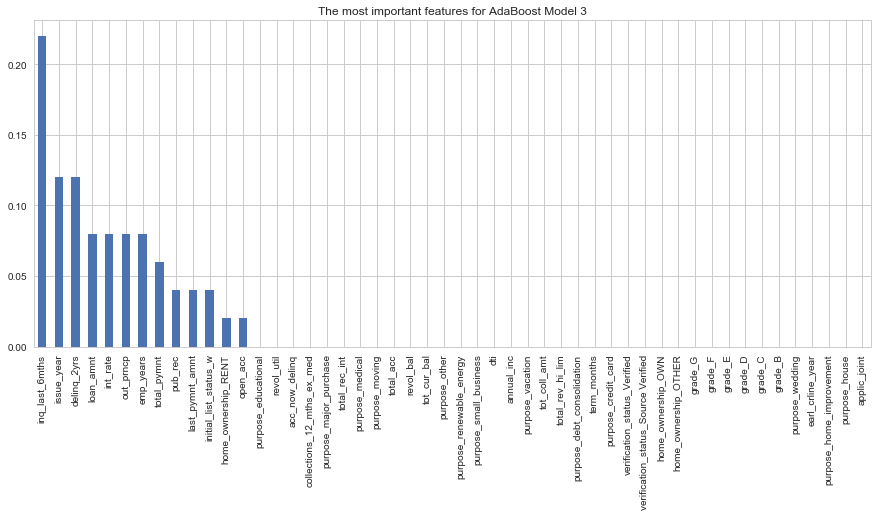

In [593]:
my_adb3_features = pd.Series(clf_adb3.feature_importances_)
my_adb3_features.index = list_features
my_adb3_features.sort_values(inplace=True, ascending=False)
my_adb3_features.plot.bar(figsize=(15,6))
plt.title('The most important features for AdaBoost Model 3')

As seen above, the 7 most important features are: inq_last_6months, issue_year, delinq_2yrs, loan_amnt, int_rate, out_orncp, emp_years. Only the first 13 features in the plot above seem to be important.

##### For Adaboost Model 4 , with 80 estimators (lower recall then in Model3, but higher accuracy and precision)

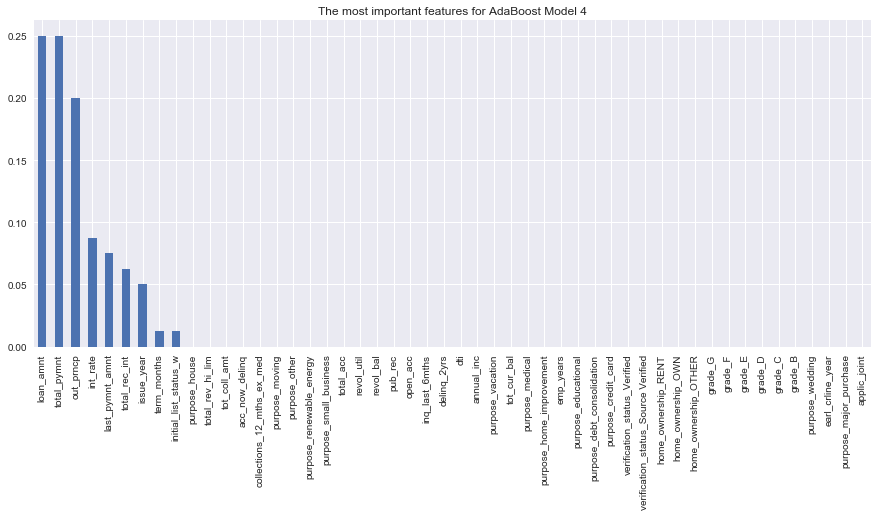

In [74]:
my_adb4_features = pd.Series(clf_adb4.feature_importances_)
my_adb4_features.index = list_features
my_adb4_features.sort_values(inplace=True, ascending=False)
my_adb4_features.plot.bar(figsize=(15,6))
plt.title('The most important features for AdaBoost Model 4')

As seen above, the 7 most important features are: loan_amnt, total_pymnt, out_prncp, int_rate, last_pymnt_amnt, total_rec_int, issue_year. Only the first 9 features in the plot above seem to be important.

For future developments of the projects I could try to build the models using only the most important features and see if/how much the model performance improves.